MLO 1 - Distinguish between the different types of machine learning and the underlying
                concepts that enforce their limitations.
                

MLO 2 - Understand how to use analytics for AI with the inclusion of labelled and
               unlabelled data.
               

MLO 5 - Develop a machine learning strategy for a given domain, communicate this
               strategy effectively to peers and project stakeholders
                




#Assessment Task
Students are advised to review and adhere to the submission requirements documented after the assessment task. 

##Scenario:

Data Dictionary of Data Set column description:
1. Id number: 1 to 214
   2. RI: refractive index
   3. Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
   4. Mg: Magnesium
   5. Al: Aluminium
   6. Si: Silicon
   7. K: Potassium
   8. Ca: Calcium
   9. Ba: Barium
  10. Fe: Iron
  11. Type of glass: (class attribute)
      -- 1 building_windows_float_processed
      -- 2 building_windows_non_float_processed
      -- 3 vehicle_windows_float_processed
      -- 4 vehicle_windows_non_float_processed (none in this database)
      -- 5 containers
      -- 6 tableware
      -- 7 headlamps




##Requirements

You are required to use the dataset contained within the file “glass_data.csv” and then perform the following analysisby testing at least 2classification algorithms:

•	Perform an initial analysis of the data (EDA) using python in your Jupyter notebook. Discuss your findings and what relevance they might have on your planned classification algorithms.[0-20]
•	Perform anypreparation of the data, that you feel is necessary, using python in your Jupyter notebook. Explain your rationale behind your data preparation and how it will assist you.[0-30]
•	Create and implement at least 2 classification algorithmsthat will output a classification based on the Type of glass: (class attribute) feature. Test these models and try to improve it as you see fit.Discuss your findings and final rational for choosing a particular classification algorithm.[0-40]
•	Make a classification using your test data, using your final classification algorithmand comment on the accuracy differential between the training and testing set.[0-10]


##Note
•	All written work MUST be completed in Jupyter Notebook Markdown (please review “Jupyter Notebook Tutorial” Notes in Moodle if you are unsure of this).
•	All data wrangling, analysis, and visualizations must be generated using python.
•	All Code must be included in code blocks (As normal). No other upload will be accepted.
•	All written work MUST be detailed in your Jupyter Markdown (NOT in code comments).
•	Use Harvard Referencing when citing third party 




# Installation of Dependiences

In [2]:
!pip install pandas numpy matplotlib seaborn --quiet

In [3]:
!pip install opendatasets scikit-learn --quiet --upgrade


In [4]:
!pip install sweetviz --quiet

     |████████████████████████████████| 15.1 MB 24.0 MB/s 


In [5]:
!pip install pip install scikit-plot

# Mounting Drive

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import Liberaries and dependencies

In [7]:
import opendatasets as od
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import os
import joblib
import scikitplot as skplt
import pickle
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import r2_score, roc_auc_score, roc_curve
from scipy import stats  # For in-built method to get PCC
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
#visualize data 
from scipy.stats import norm
from scipy import stats
# Import missingno as msno
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'


In [8]:
import sweetviz as sv

# Requirement 1 :
Perform an initial analysis of the data (EDA) using python in your Jupyter notebook. Discuss your findings and what relevance they might have on your planned classification algorithms.[0-20]

#Data Acquistion

In [9]:
#Downloading the dataset
#od.download('https://www.kaggle.com/oracledevrel/formulaaihackathon2022')

In [10]:
import os
os.listdir('/content/drive/MyDrive/glassdata')

['glass_data.csv', 'models', '.ipynb_checkpoints']

In [11]:
glass_df = pd.read_csv('/content/drive/MyDrive/glassdata/glass_data.csv')
glass_df.columns=['Id number','RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','Type of glass']
glass_df=glass_df

In [12]:
columnnames=list(glass_df.columns)
print(columnnames)


['Id number', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type of glass']


In [13]:
glass_df.dtypes

Id number          int64
RI               float64
Na               float64
Mg               float64
Al               float64
Si               float64
K                float64
Ca               float64
Ba               float64
Fe               float64
Type of glass      int64
dtype: object

In [14]:
glass_df

Id number       RI     Na    Mg    Al     Si     K    Ca    Ba    Fe  \
0            2  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.00   
1            3  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.00   
2            4  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.00   
3            5  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.00   
4            6  1.51596  12.79  3.61  1.62  72.97  0.64  8.07  0.00  0.26   
..         ...      ...    ...   ...   ...    ...   ...   ...   ...   ...   
208        210  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.00   
209        211  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.00   
210        212  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.00   
211        213  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.00   
212        214  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.00   

     Type of glass  
0                1  
1                1  
2                1  
3                1  
4                1  
..             ...  
208              7  
209              7  
210              7  
211              7  
212              7  

[213 rows x 11 columns]

#Exploratory data analysis Analysis (EDA)

## Statistical data analysis

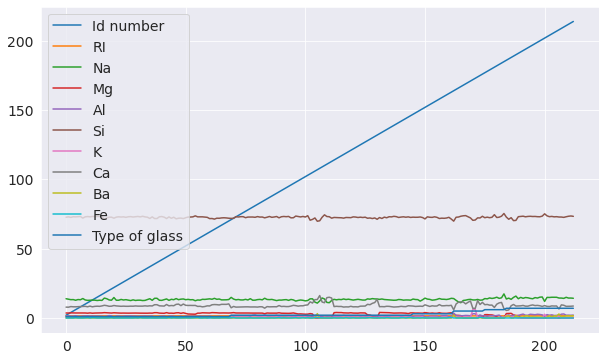

In [15]:
glass_df.plot()
plt.show()

In [16]:
feature_config = sv.FeatureConfig(force_num=['Id number','RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','Type of glass'])

In [17]:
report = sv.analyze(glass_df, target_feat='Type of glass', feat_cfg=feature_config)


                                             |          | [  0%]   00:00 -> (? left)


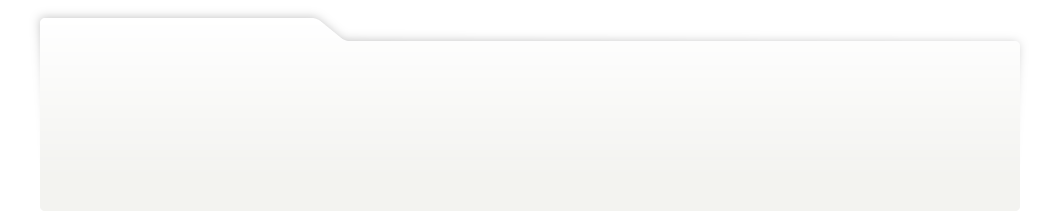
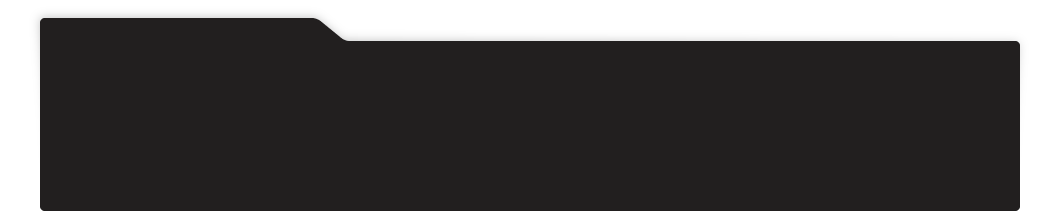
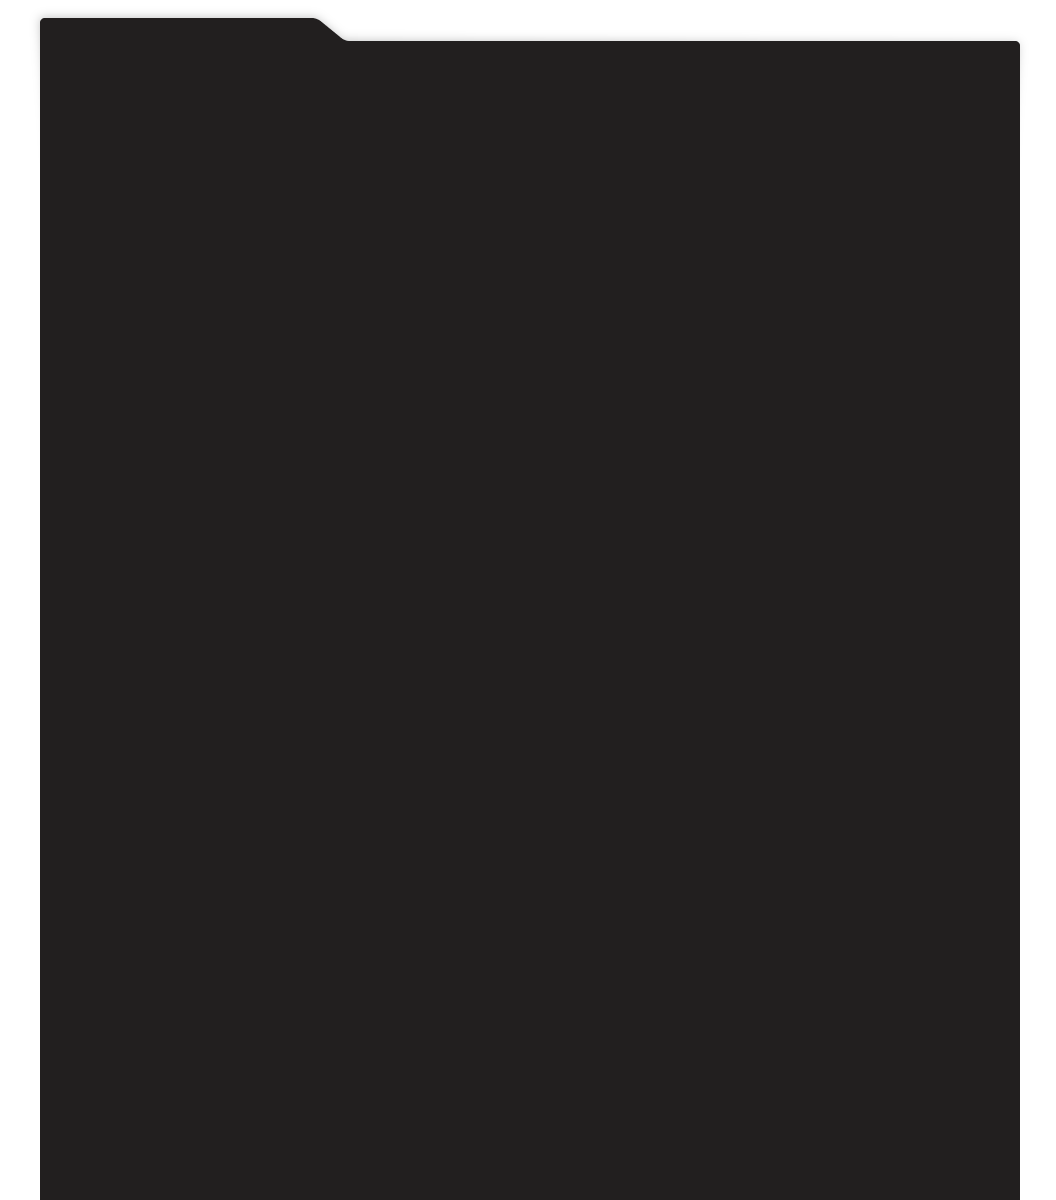
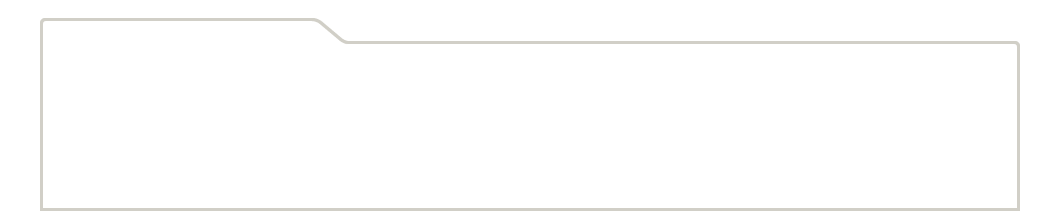
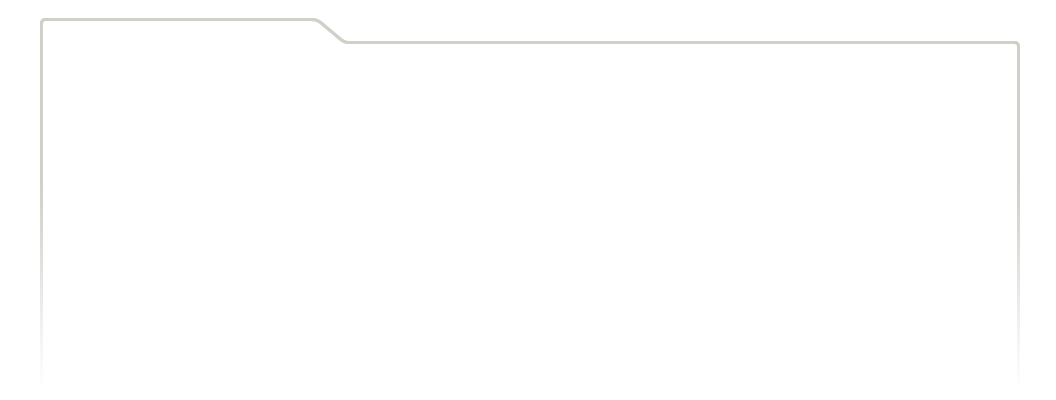
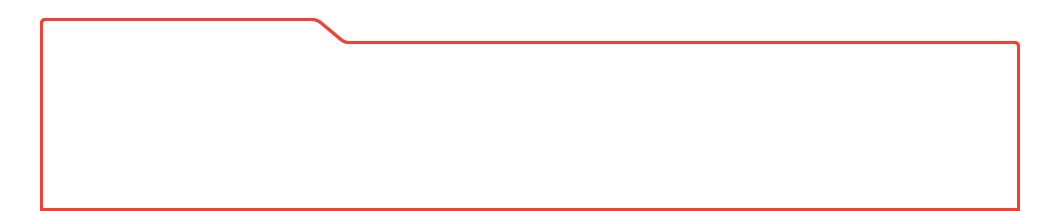
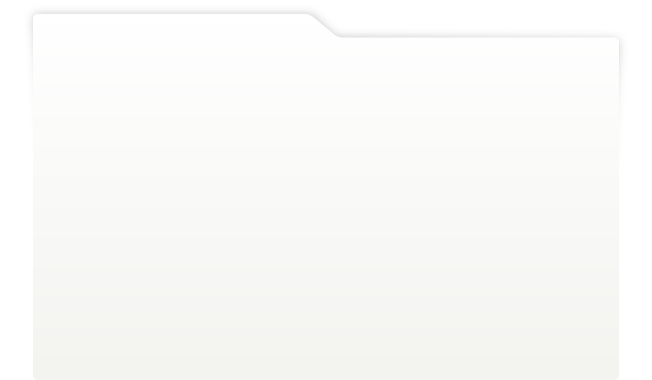
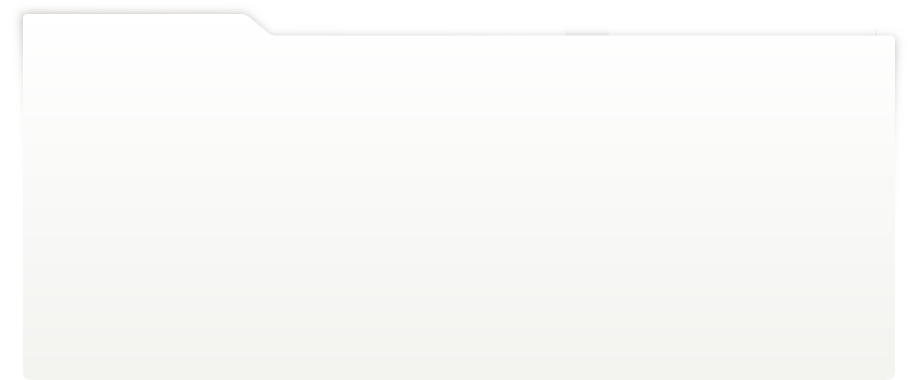
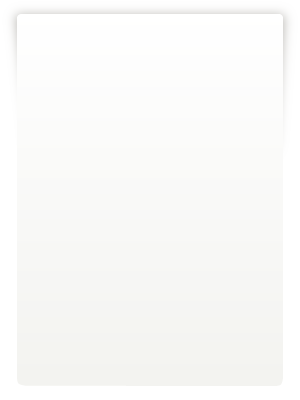
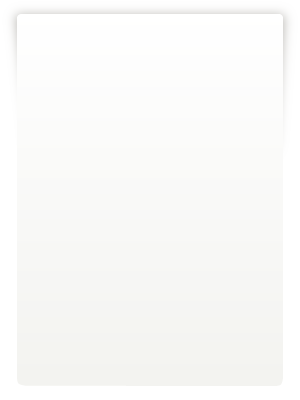
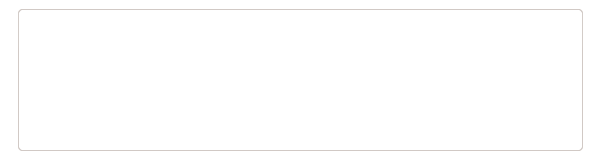
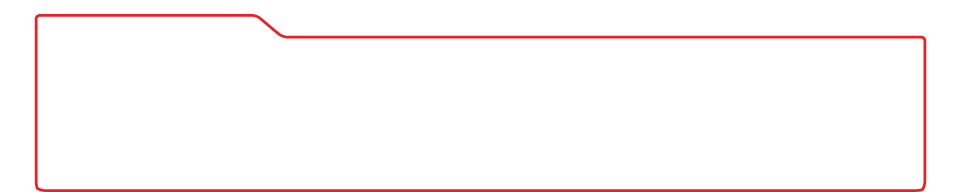
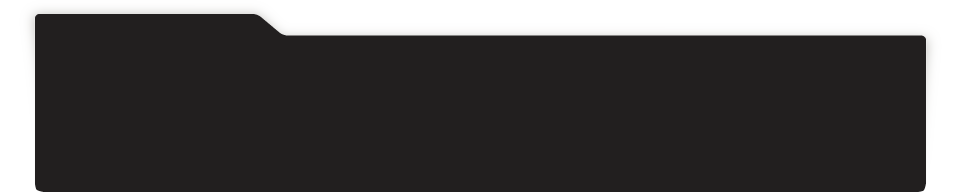
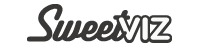
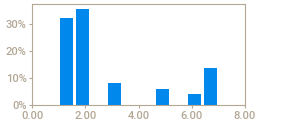
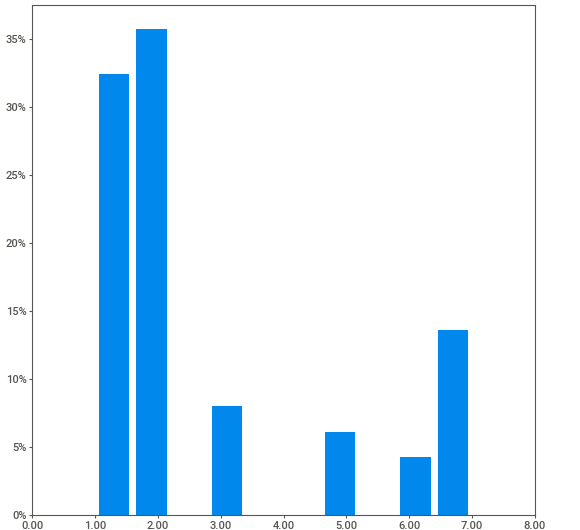
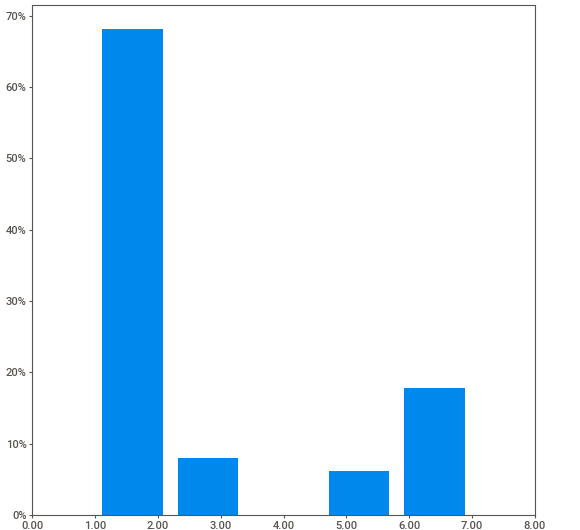
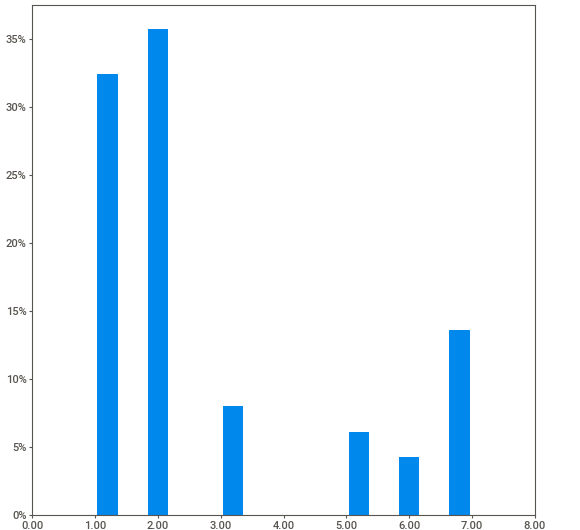
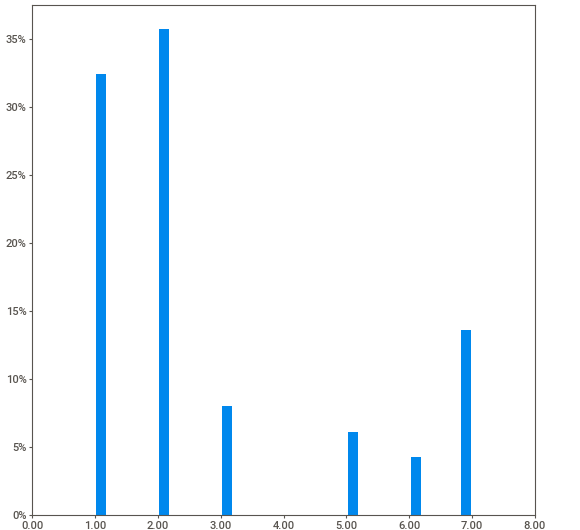
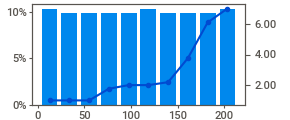
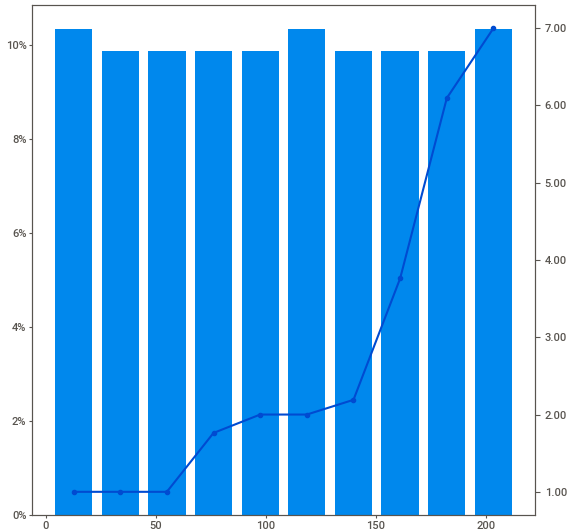
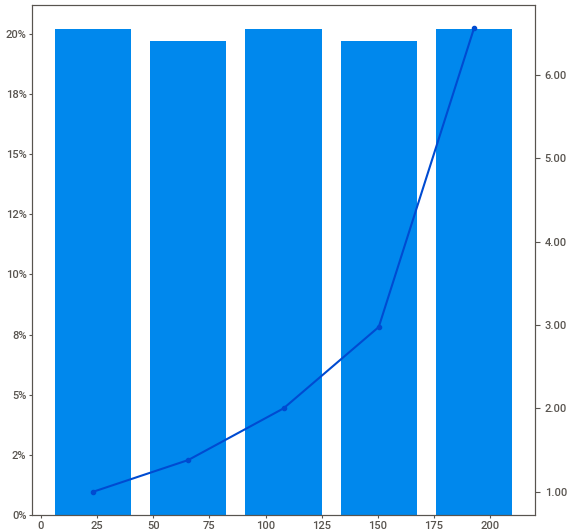
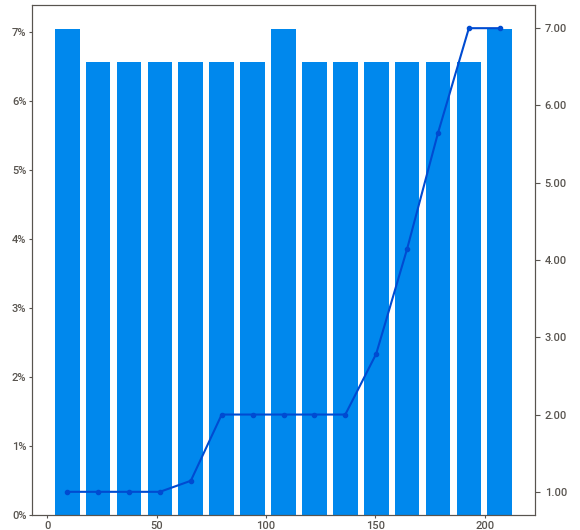
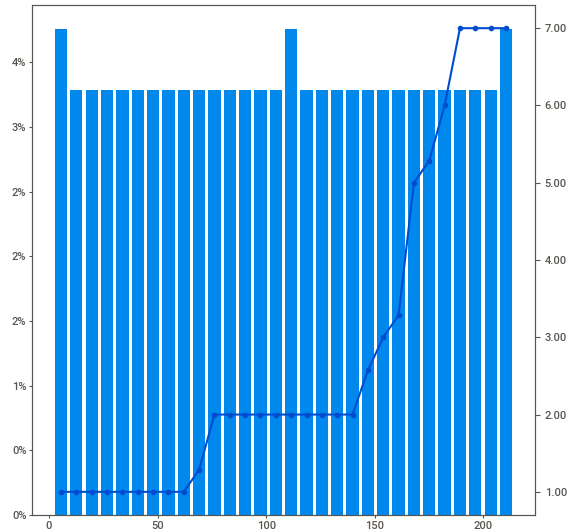
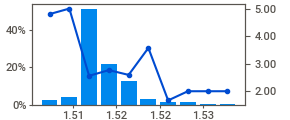
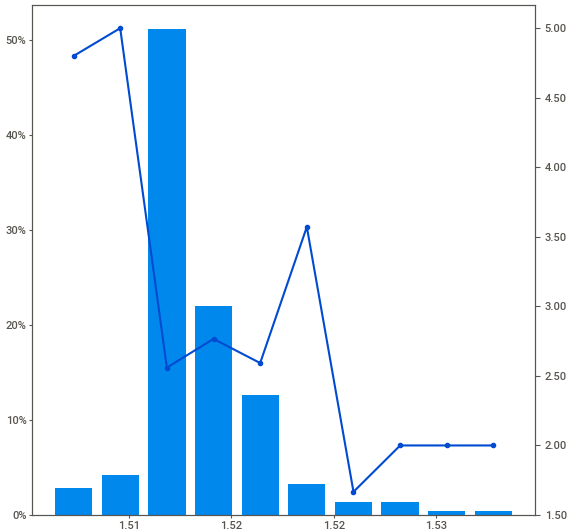
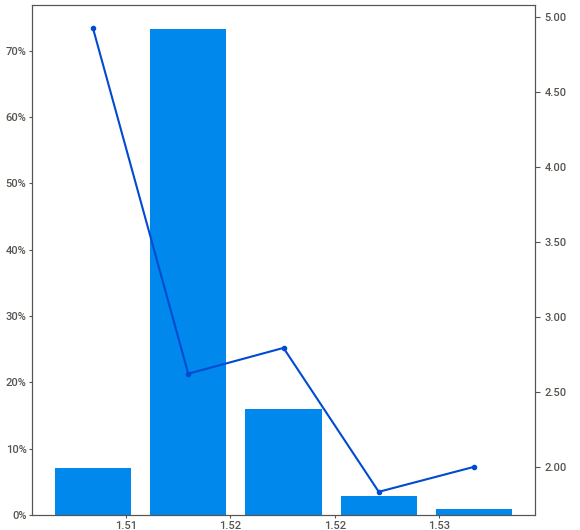
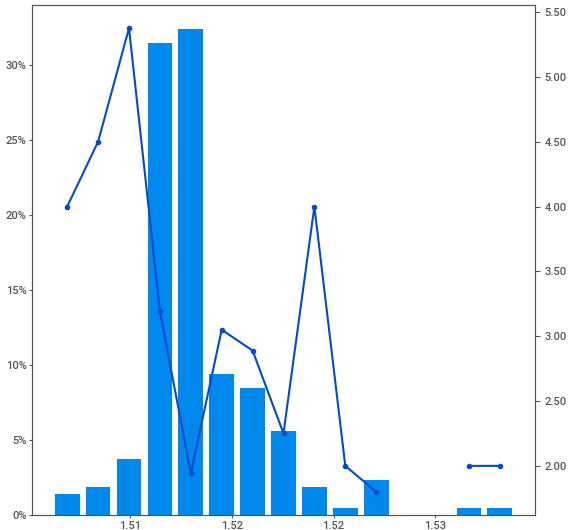
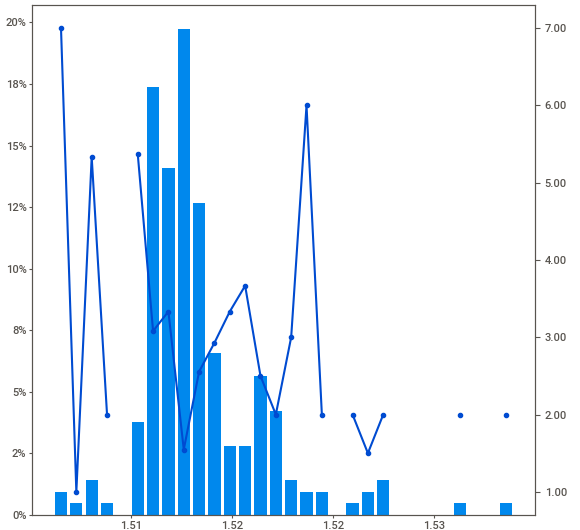
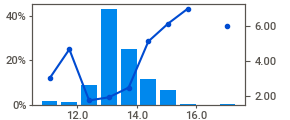
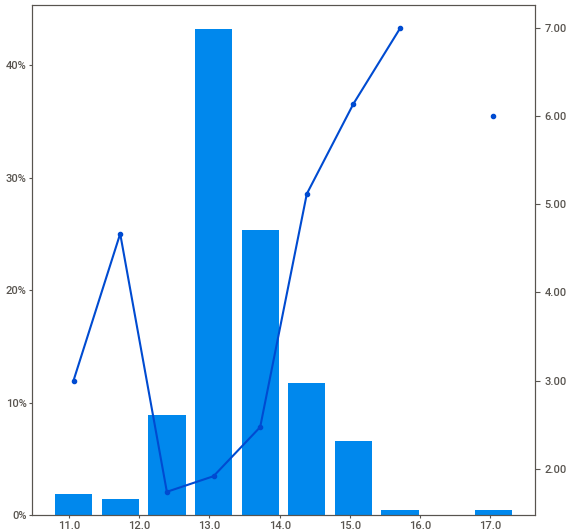
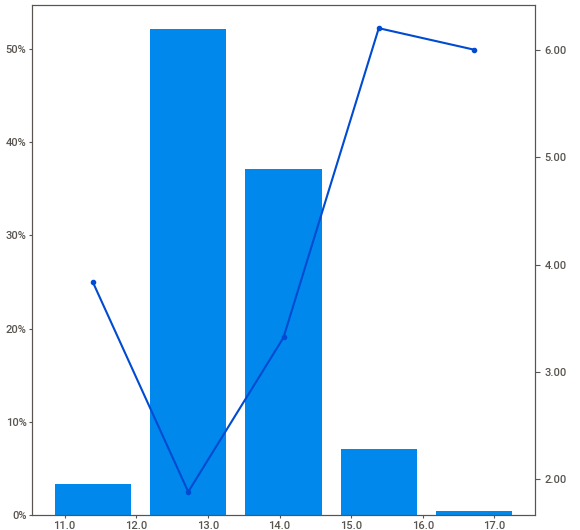
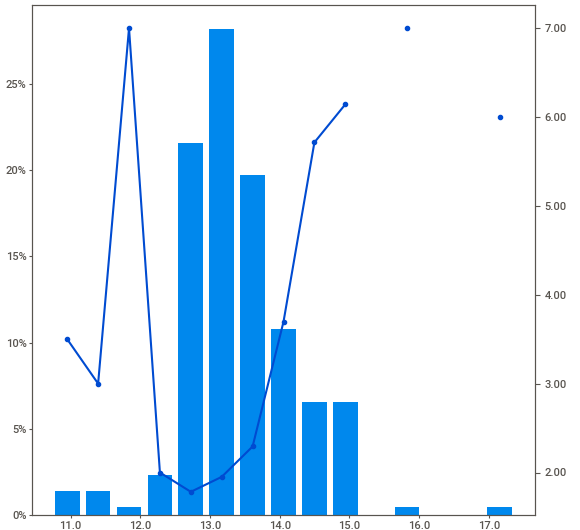
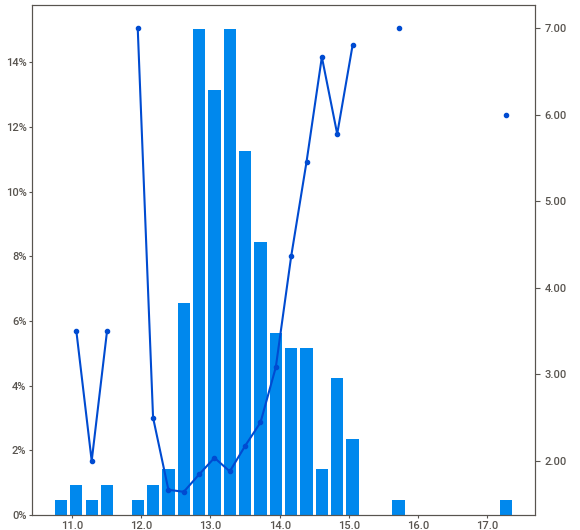
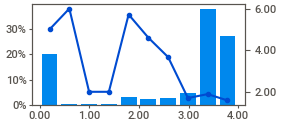
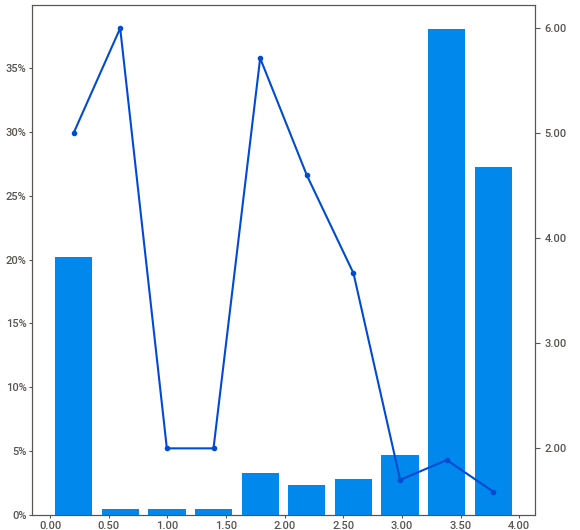
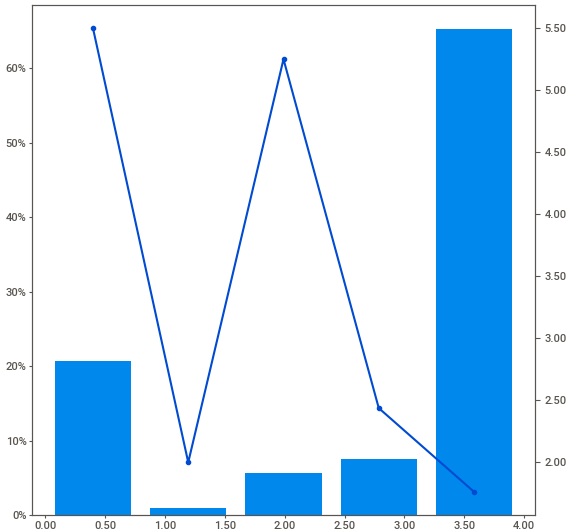
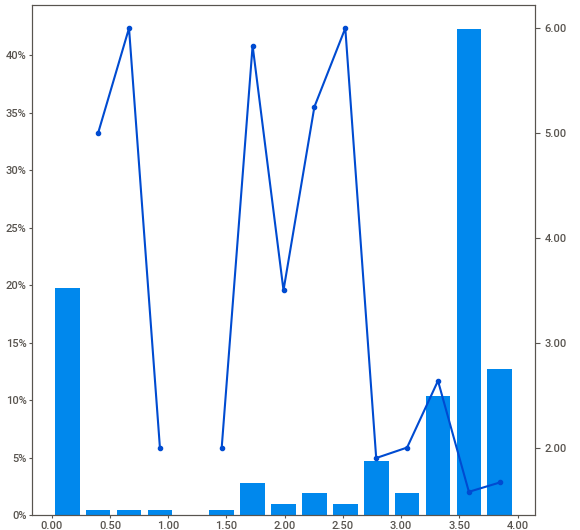
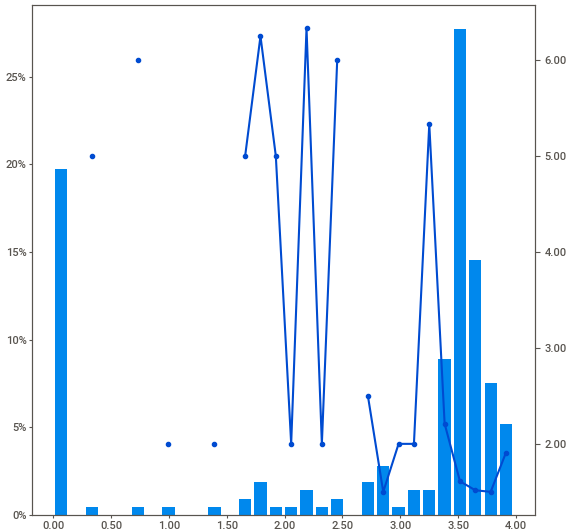
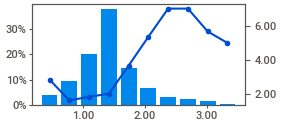
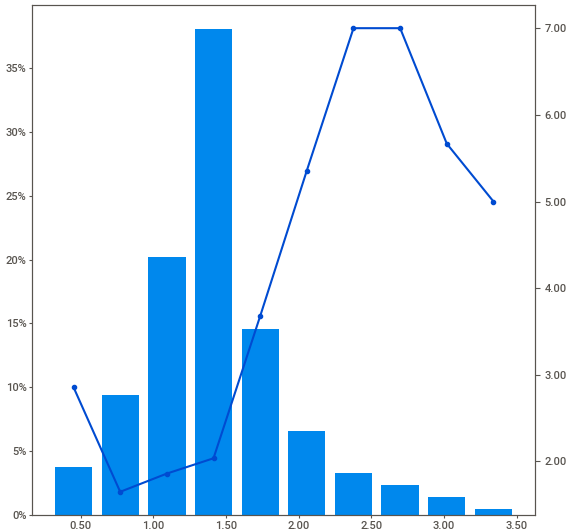
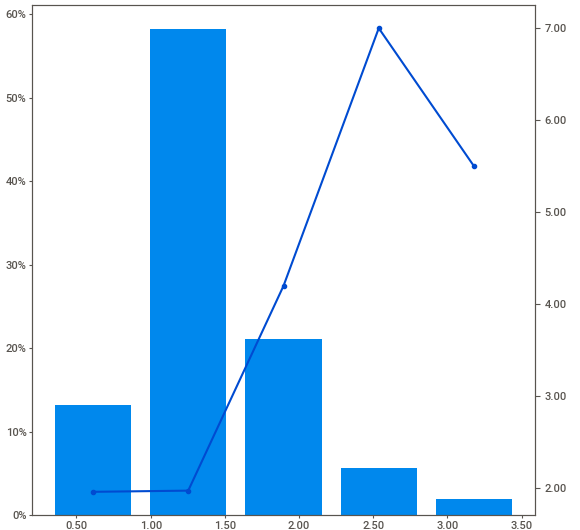
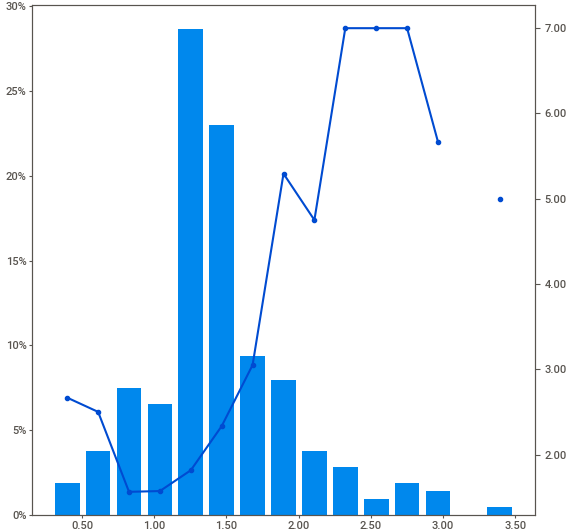
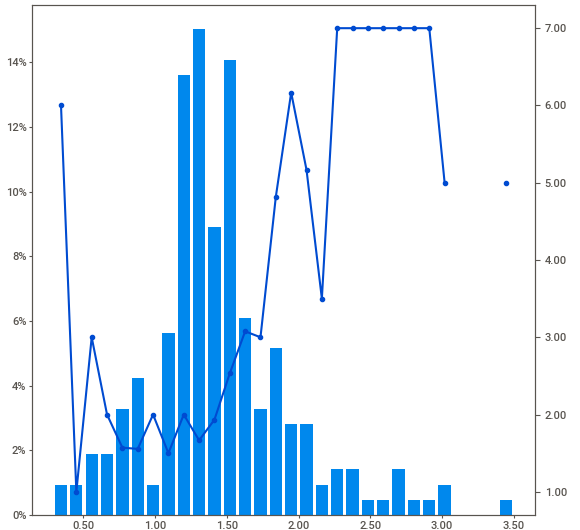
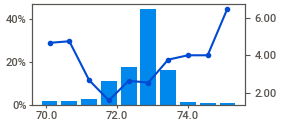
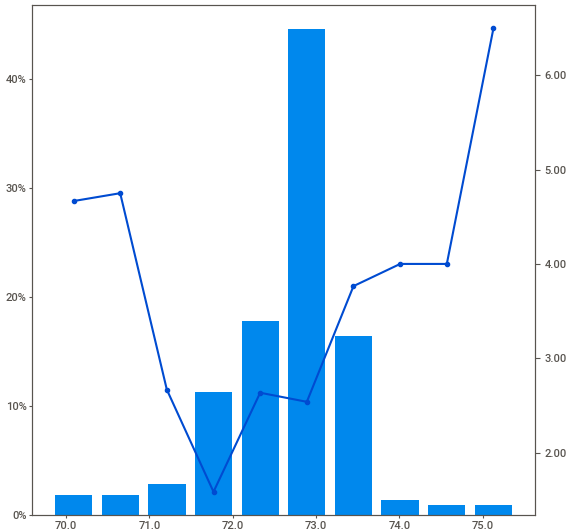
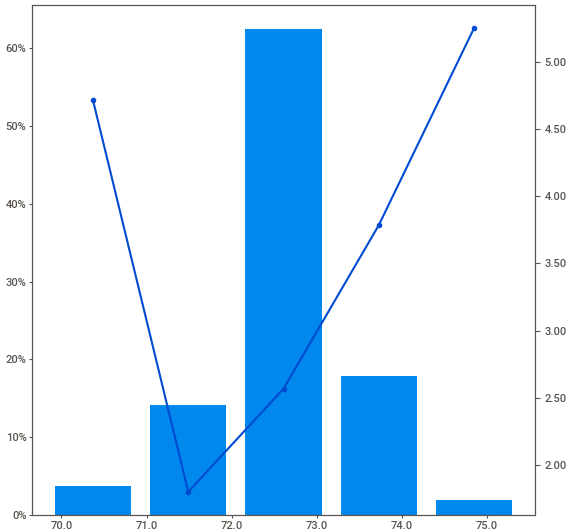
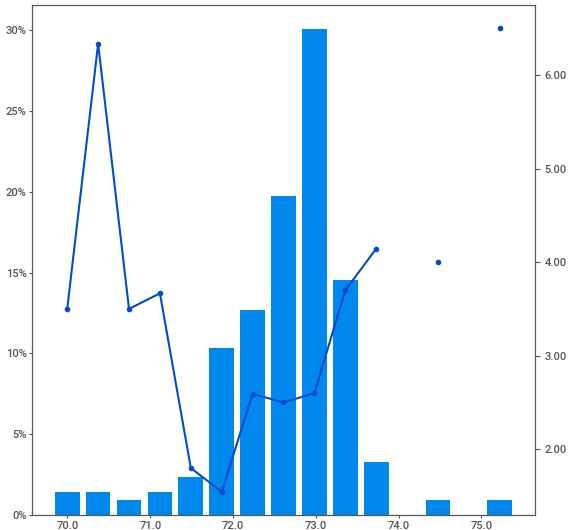
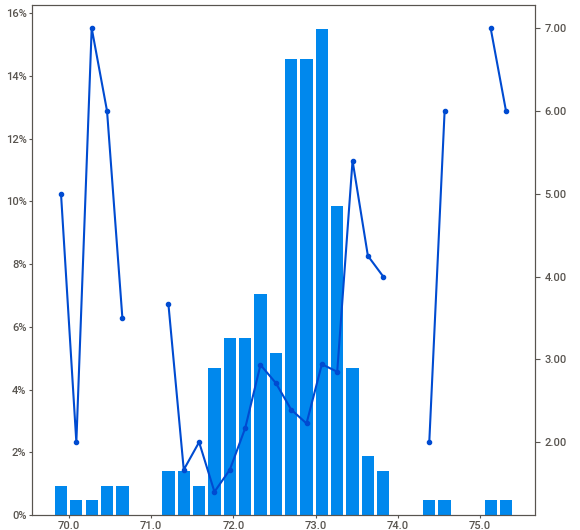
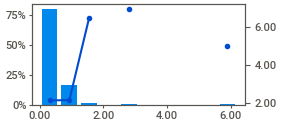
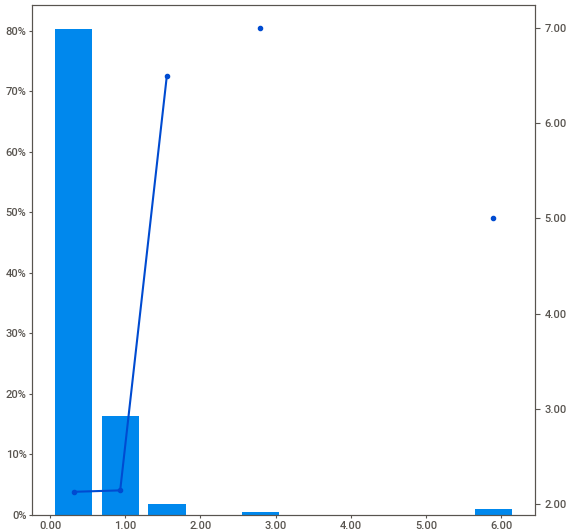
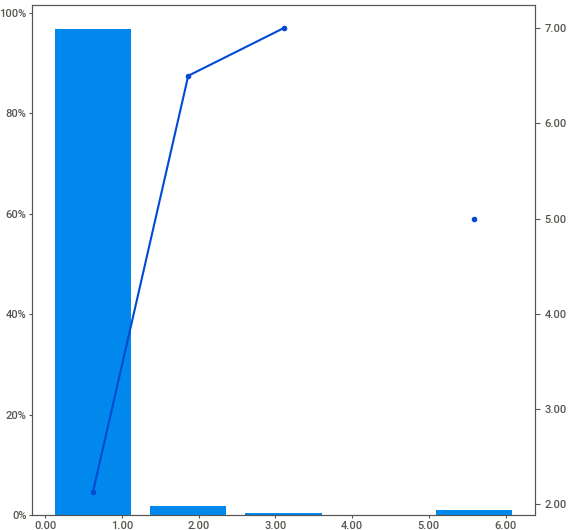
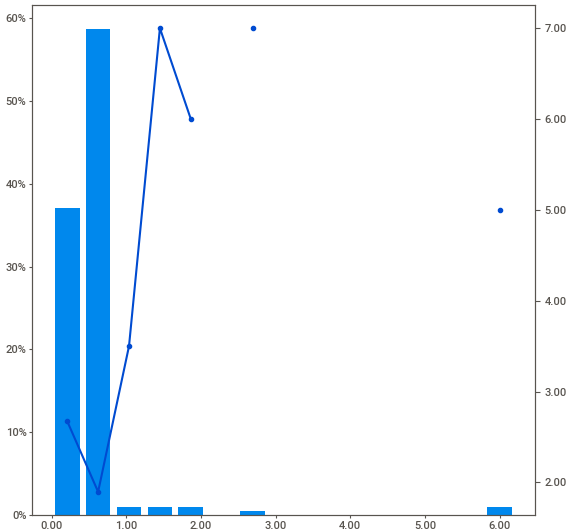
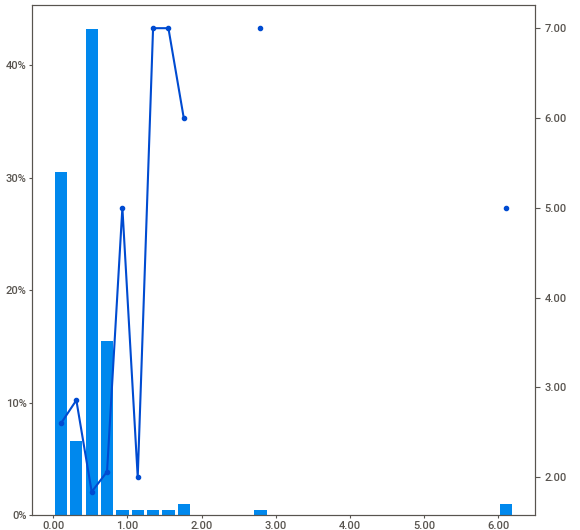
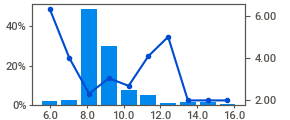
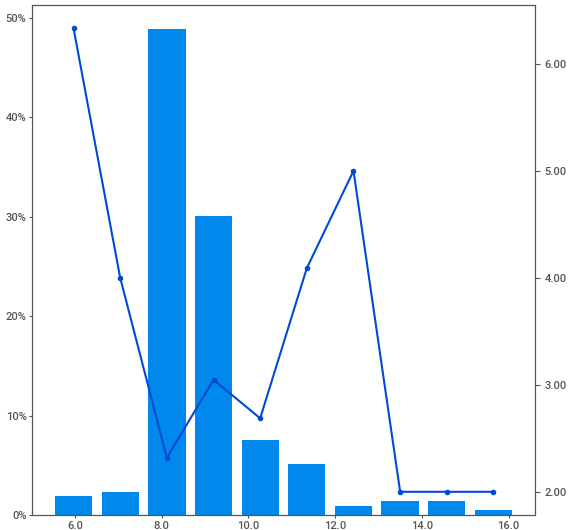
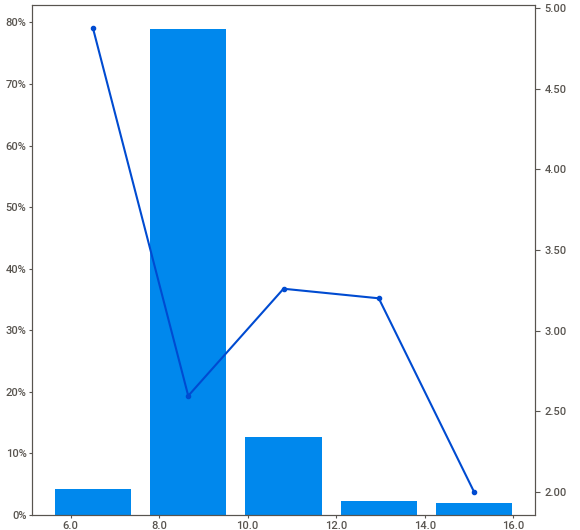
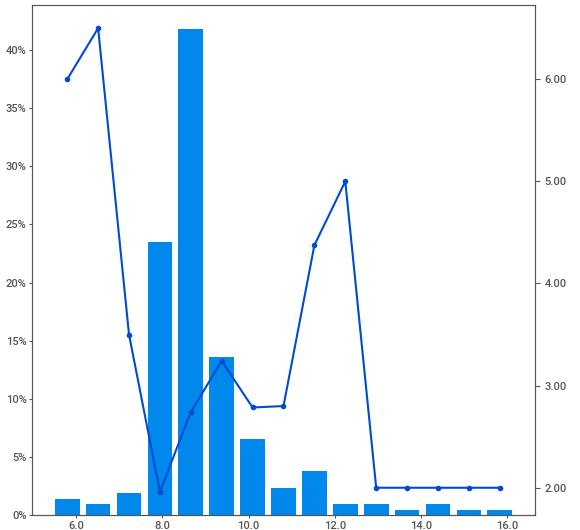
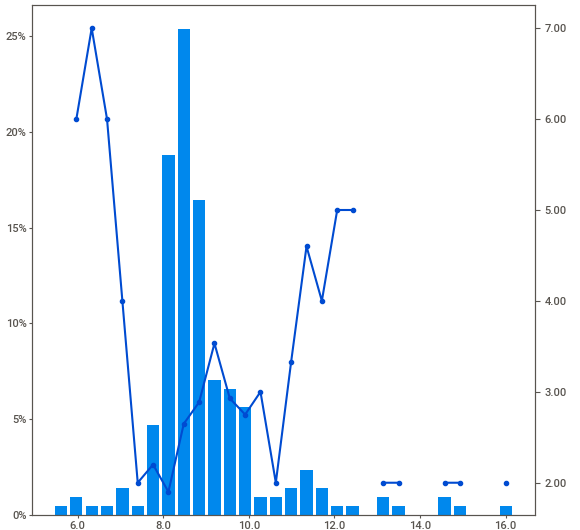
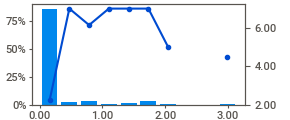
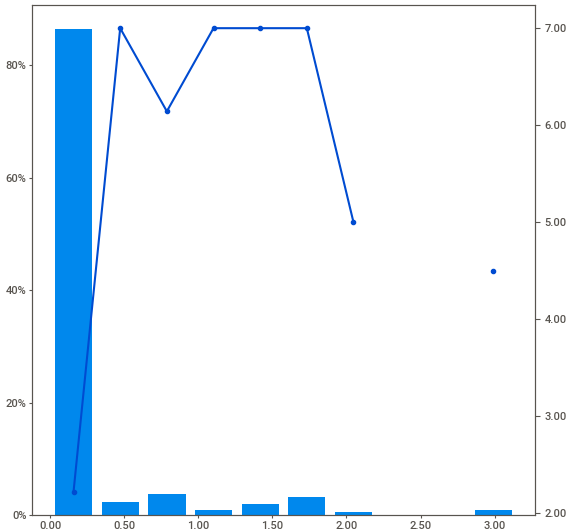
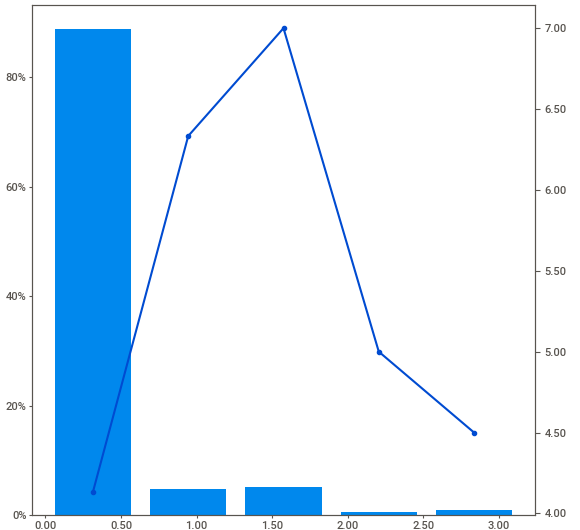
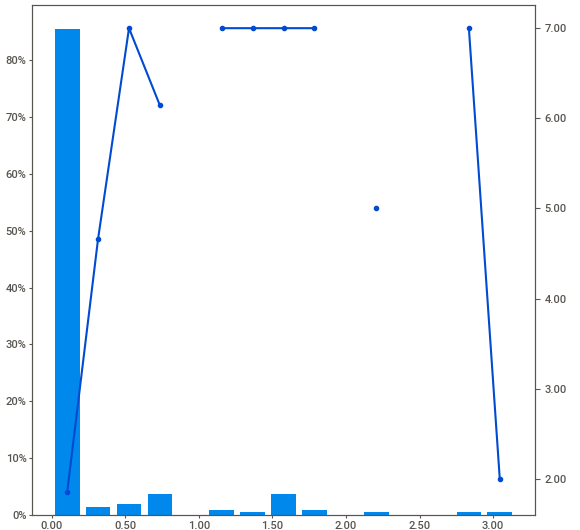
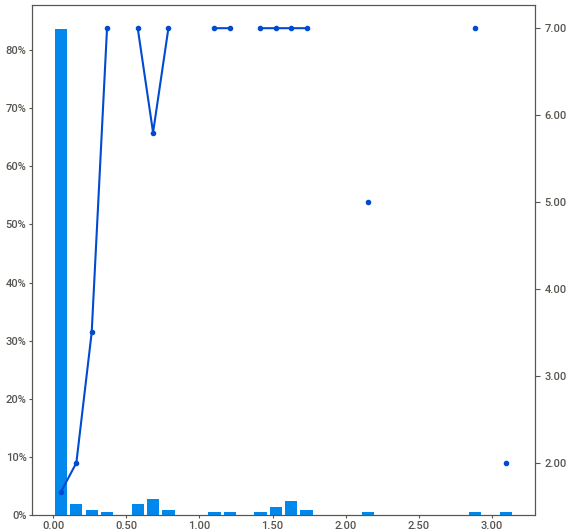
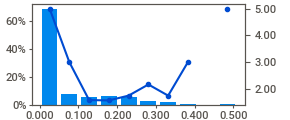
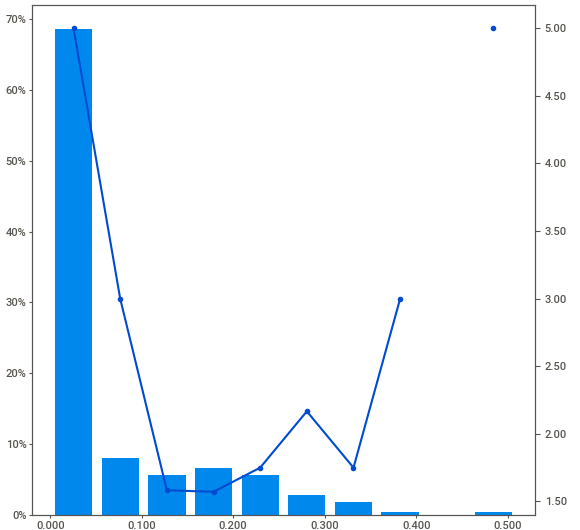
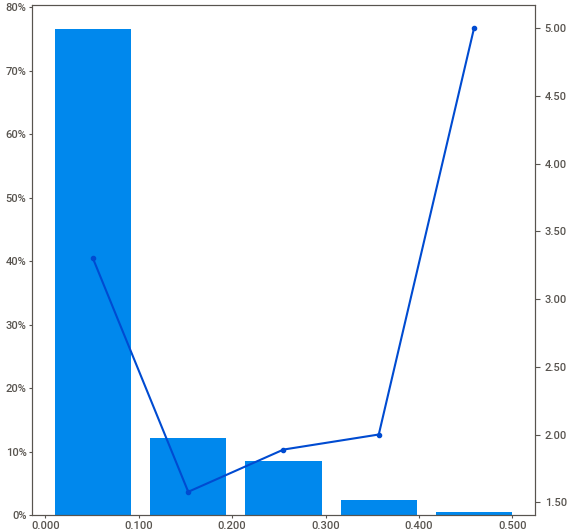
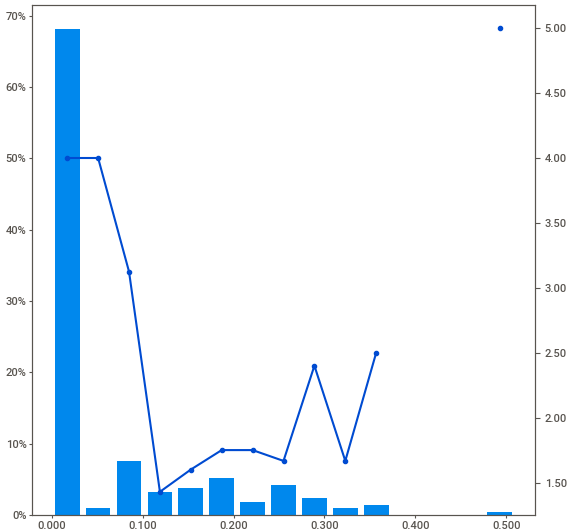
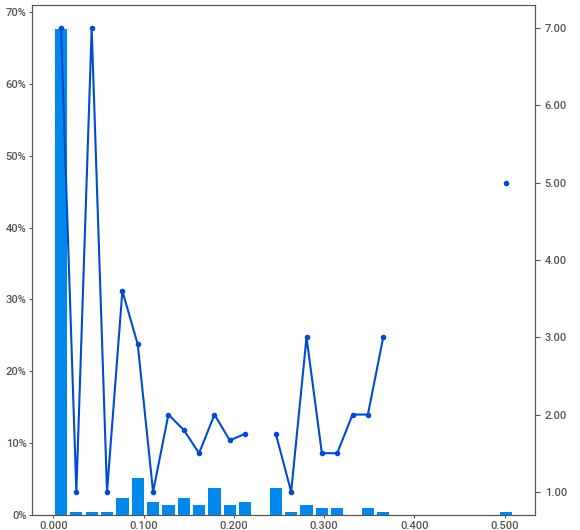
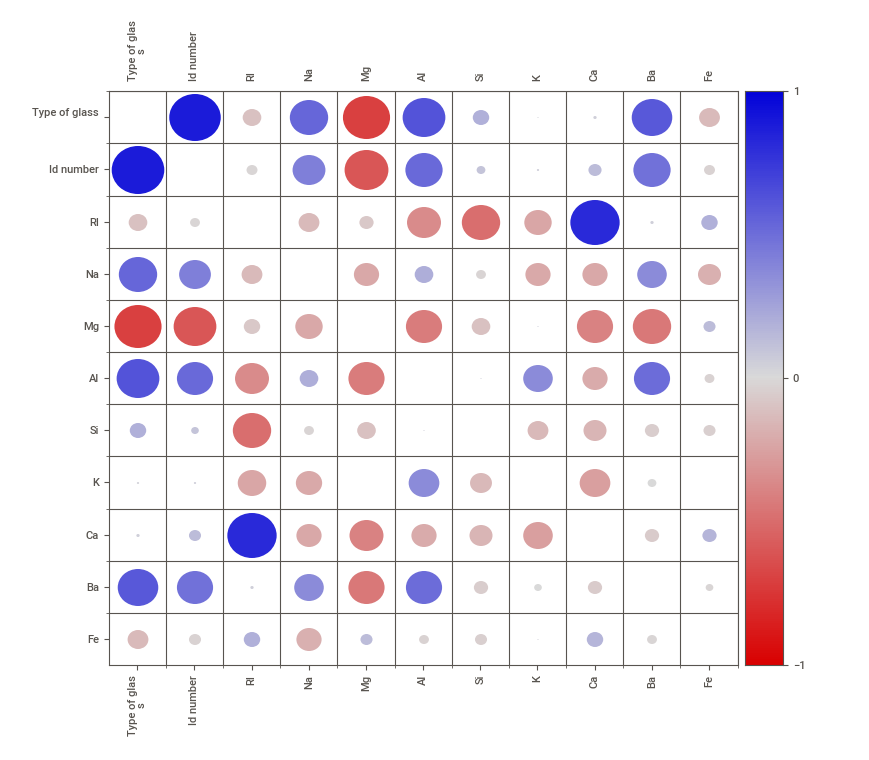
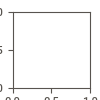

In [18]:
report.show_notebook()

In [19]:
print(glass_df.shape)

(213, 11)


In [20]:
glass_df.describe()

Id number          RI          Na          Mg          Al          Si  \
count  213.000000  213.000000  213.000000  213.000000  213.000000  213.000000   
mean   108.000000    1.518353   13.406761    2.676056    1.446526   72.655023   
std     61.631972    0.003039    0.818371    1.440453    0.499882    0.774052   
min      2.000000    1.511150   10.730000    0.000000    0.290000   69.810000   
25%     55.000000    1.516520   12.900000    2.090000    1.190000   72.280000   
50%    108.000000    1.517680   13.300000    3.480000    1.360000   72.790000   
75%    161.000000    1.519150   13.830000    3.600000    1.630000   73.090000   
max    214.000000    1.533930   17.380000    3.980000    3.500000   75.410000   

                K          Ca          Ba          Fe  Type of glass  
count  213.000000  213.000000  213.000000  213.000000     213.000000  
mean     0.499108    8.957934    0.175869    0.057277       2.788732  
std      0.653035    1.426435    0.498245    0.097589       2.105130  
min      0.000000    5.430000    0.000000    0.000000       1.000000  
25%      0.130000    8.240000    0.000000    0.000000       1.000000  
50%      0.560000    8.600000    0.000000    0.000000       2.000000  
75%      0.610000    9.180000    0.000000    0.100000       3.000000  
max      6.210000   16.190000    3.150000    0.510000       7.000000

In [21]:
glass_df.dtypes

Id number          int64
RI               float64
Na               float64
Mg               float64
Al               float64
Si               float64
K                float64
Ca               float64
Ba               float64
Fe               float64
Type of glass      int64
dtype: object

## Investigating Outliers

Type of glass


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


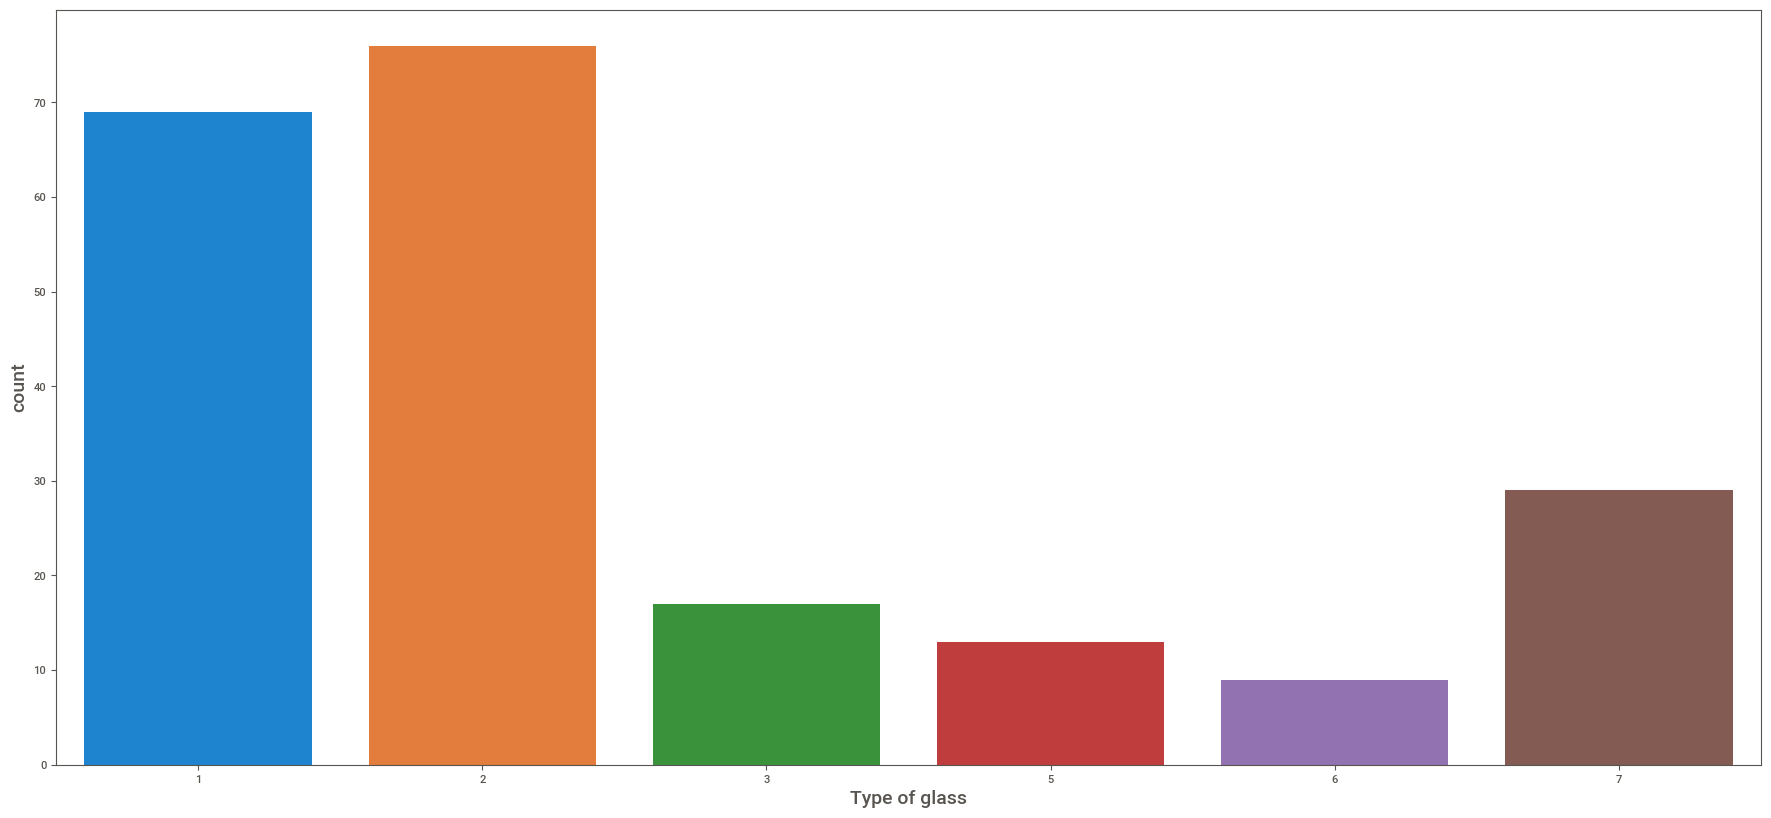

In [23]:
columnname="Type of glass"
print(columnname)
plt.figure(figsize=(22,10))
sns.countplot(glass_df[columnname])
plt.show()

2      1
136    1
138    1
139    1
140    1
      ..
76     1
77     1
78     1
79     1
214    1
Name: Id number, Length: 213, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


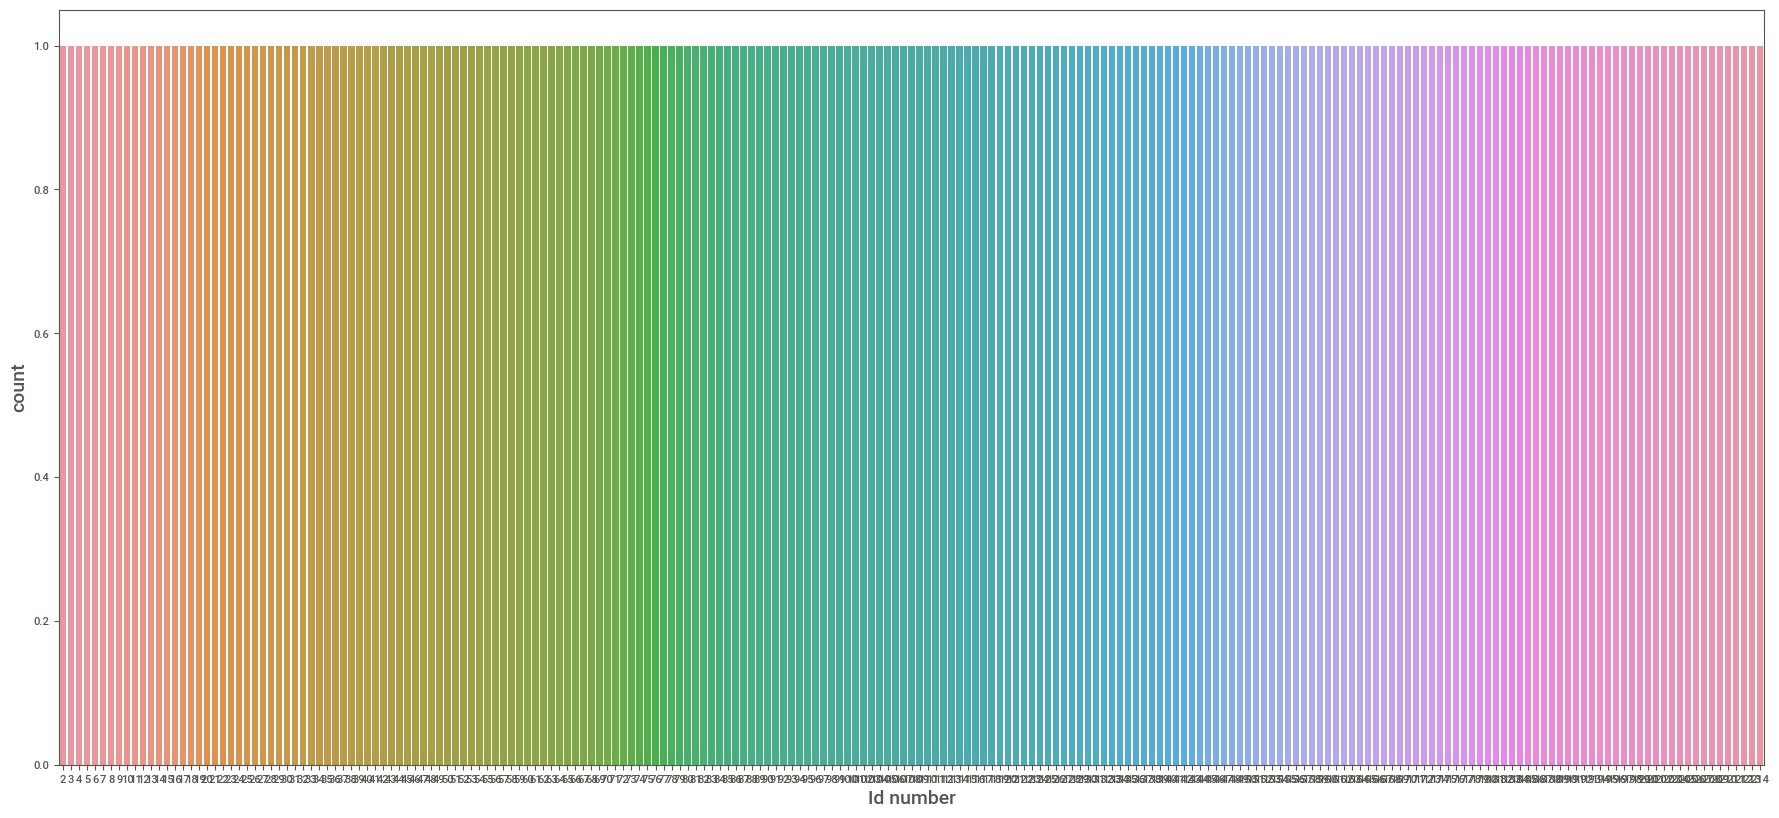

1.52152    3
1.51590    3
1.51645    3
1.51761    2
1.51613    2
          ..
1.51625    1
1.51569    1
1.51605    1
1.51588    1
1.51651    1
Name: RI, Length: 177, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


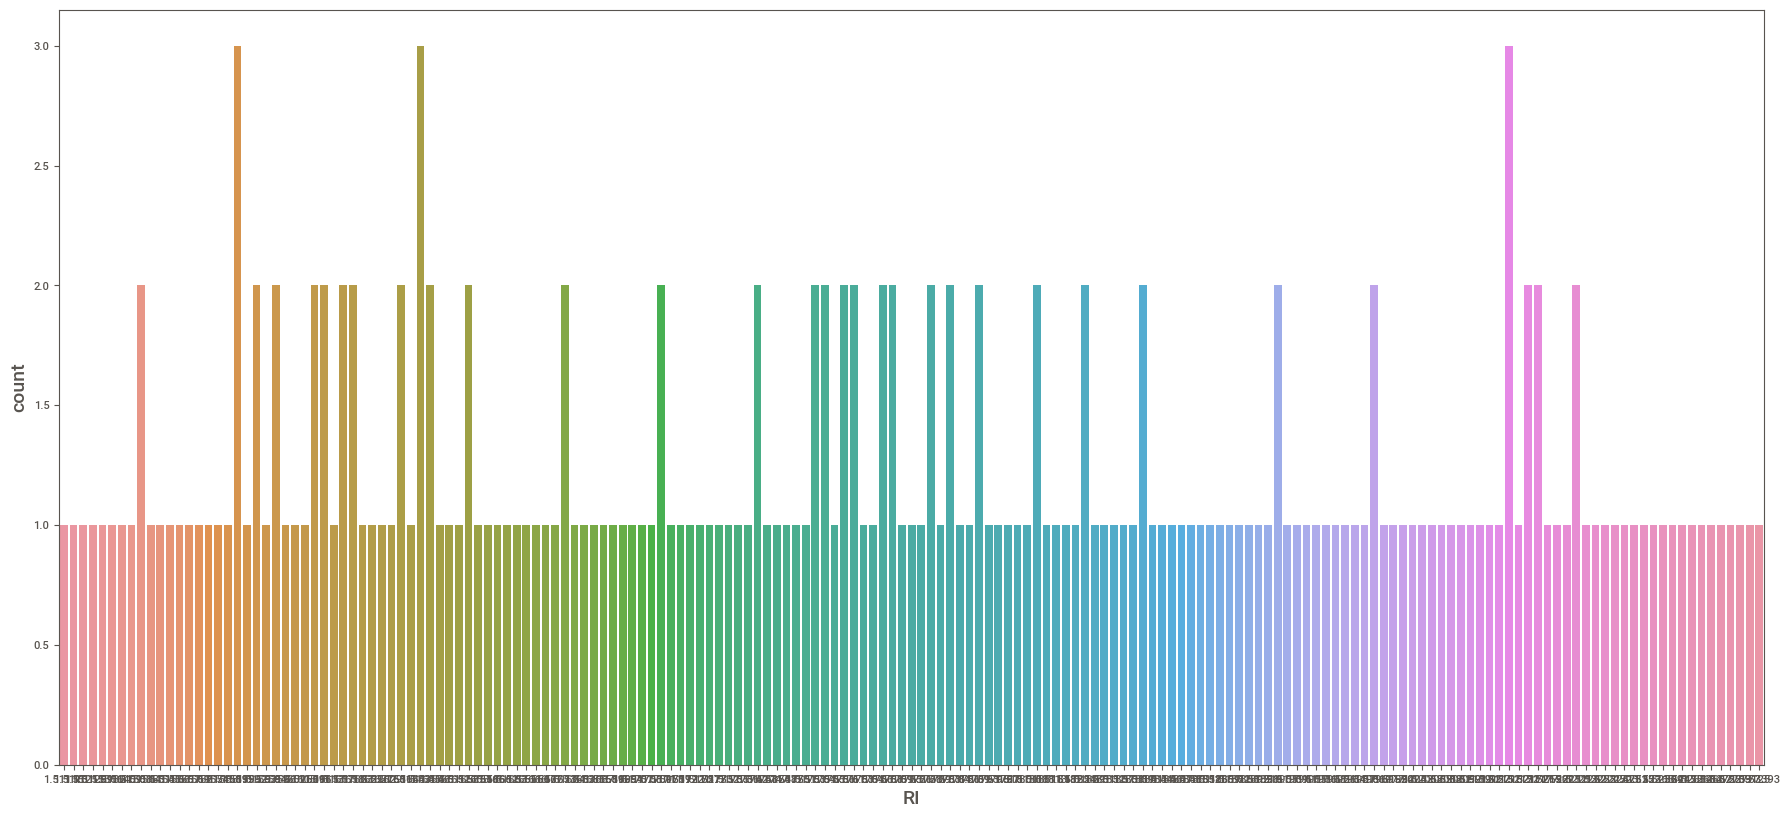

13.21    5
13.02    5
13.00    5
12.85    4
12.86    4
13.33    4
13.24    4
12.87    3
13.20    3
13.72    3
13.44    3
13.64    3
13.41    3
13.48    3
12.93    3
12.79    3
13.19    2
12.73    2
13.14    2
14.56    2
12.99    2
13.89    2
13.69    2
13.05    2
13.12    2
14.86    2
14.21    2
13.09    2
13.25    2
13.36    2
13.53    2
14.32    2
12.71    2
13.43    2
12.64    2
13.30    2
14.38    2
14.95    2
13.38    2
13.27    2
12.82    2
14.14    2
14.36    2
12.81    2
14.85    2
13.04    1
14.37    1
14.03    1
14.92    1
14.39    1
14.94    1
13.42    1
12.89    1
12.16    1
13.65    1
13.71    1
13.70    1
13.75    1
13.98    1
13.55    1
13.78    1
12.94    1
13.23    1
13.56    1
13.50    1
17.38    1
14.80    1
14.70    1
13.88    1
14.15    1
14.20    1
14.99    1
14.40    1
14.75    1
13.10    1
13.87    1
14.09    1
14.46    1
14.19    1
13.79    1
14.00    1
12.97    1
11.03    1
15.01    1
11.56    1
15.15    1
11.95    1
15.79    1
14.01    1
12.55    1
13.46    1

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


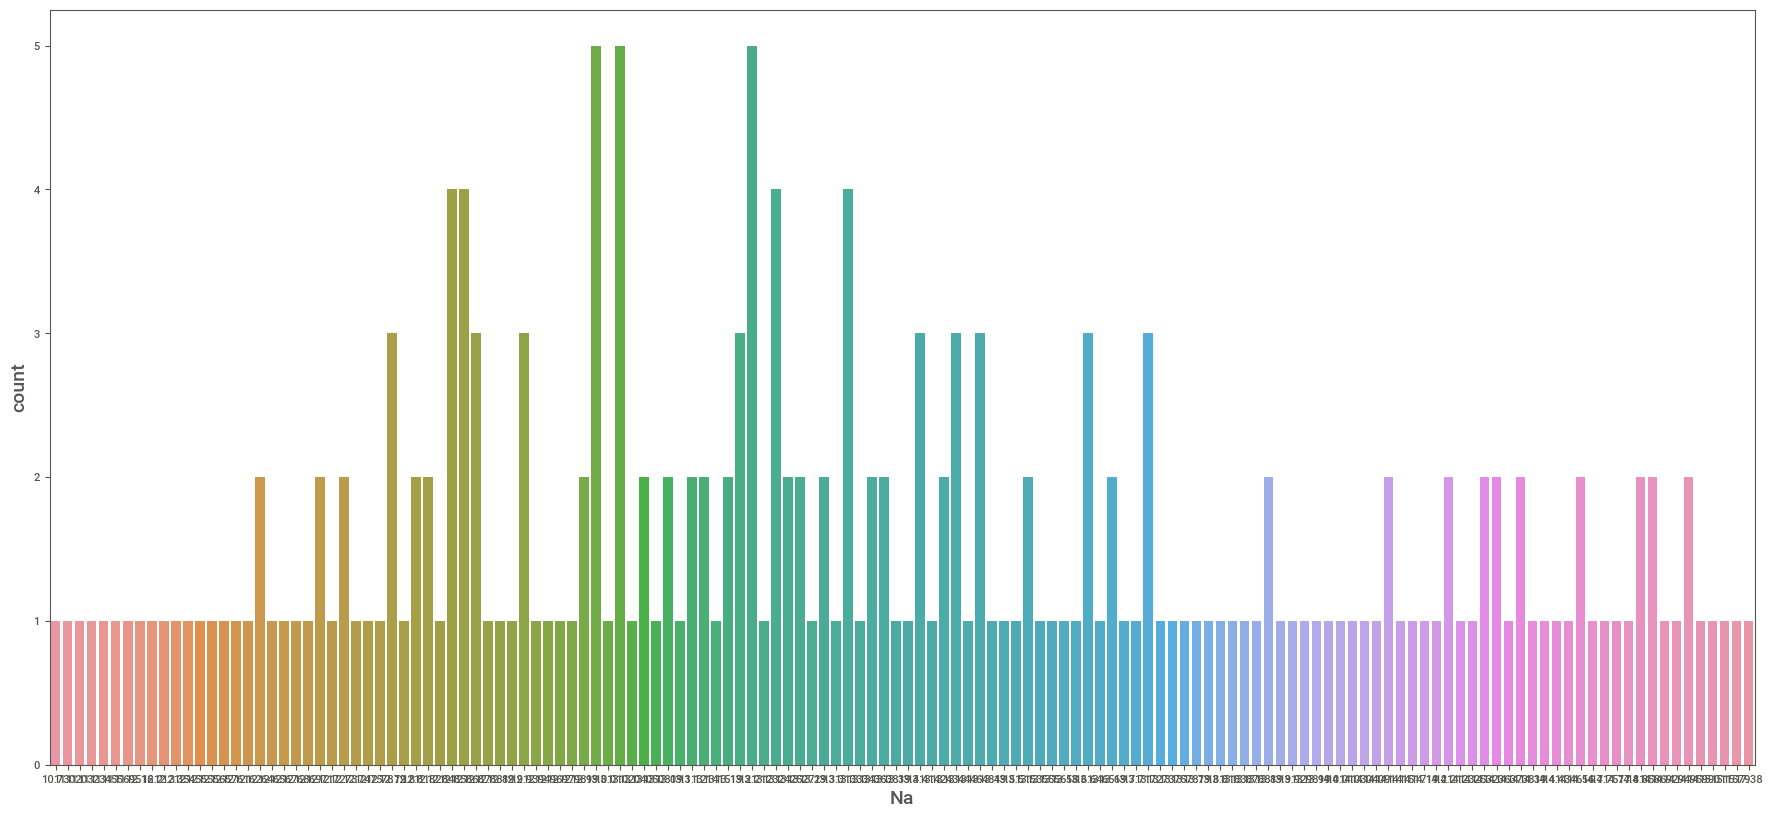

0.00    42
3.48     8
3.58     8
3.54     8
3.52     7
3.62     5
3.50     4
3.57     4
3.56     4
3.66     4
3.61     4
3.55     3
3.65     3
3.74     3
3.45     3
3.47     3
3.49     3
3.90     3
3.60     3
3.34     3
3.43     3
3.59     3
3.67     3
3.41     2
3.76     2
3.40     2
3.33     2
3.68     2
3.39     2
3.82     2
3.53     2
3.85     2
1.35     1
1.01     1
3.98     1
3.93     1
2.09     1
3.63     1
3.51     1
3.18     1
2.28     1
3.36     1
3.78     1
3.80     1
3.75     1
2.68     1
1.85     1
1.88     1
1.61     1
0.33     1
2.39     1
2.41     1
2.24     1
2.19     1
1.74     1
0.78     1
3.20     1
3.26     1
2.20     1
1.83     1
1.71     1
3.83     1
3.64     1
3.87     1
3.42     1
3.84     1
3.37     1
3.70     1
3.77     1
3.35     1
3.72     1
2.87     1
2.84     1
2.81     1
2.71     1
3.86     1
3.81     1
3.09     1
3.69     1
3.44     1
3.25     1
2.88     1
2.96     1
2.85     1
2.72     1
2.76     1
3.15     1
2.90     1
3.46     1
3.73     1
3.97     1

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


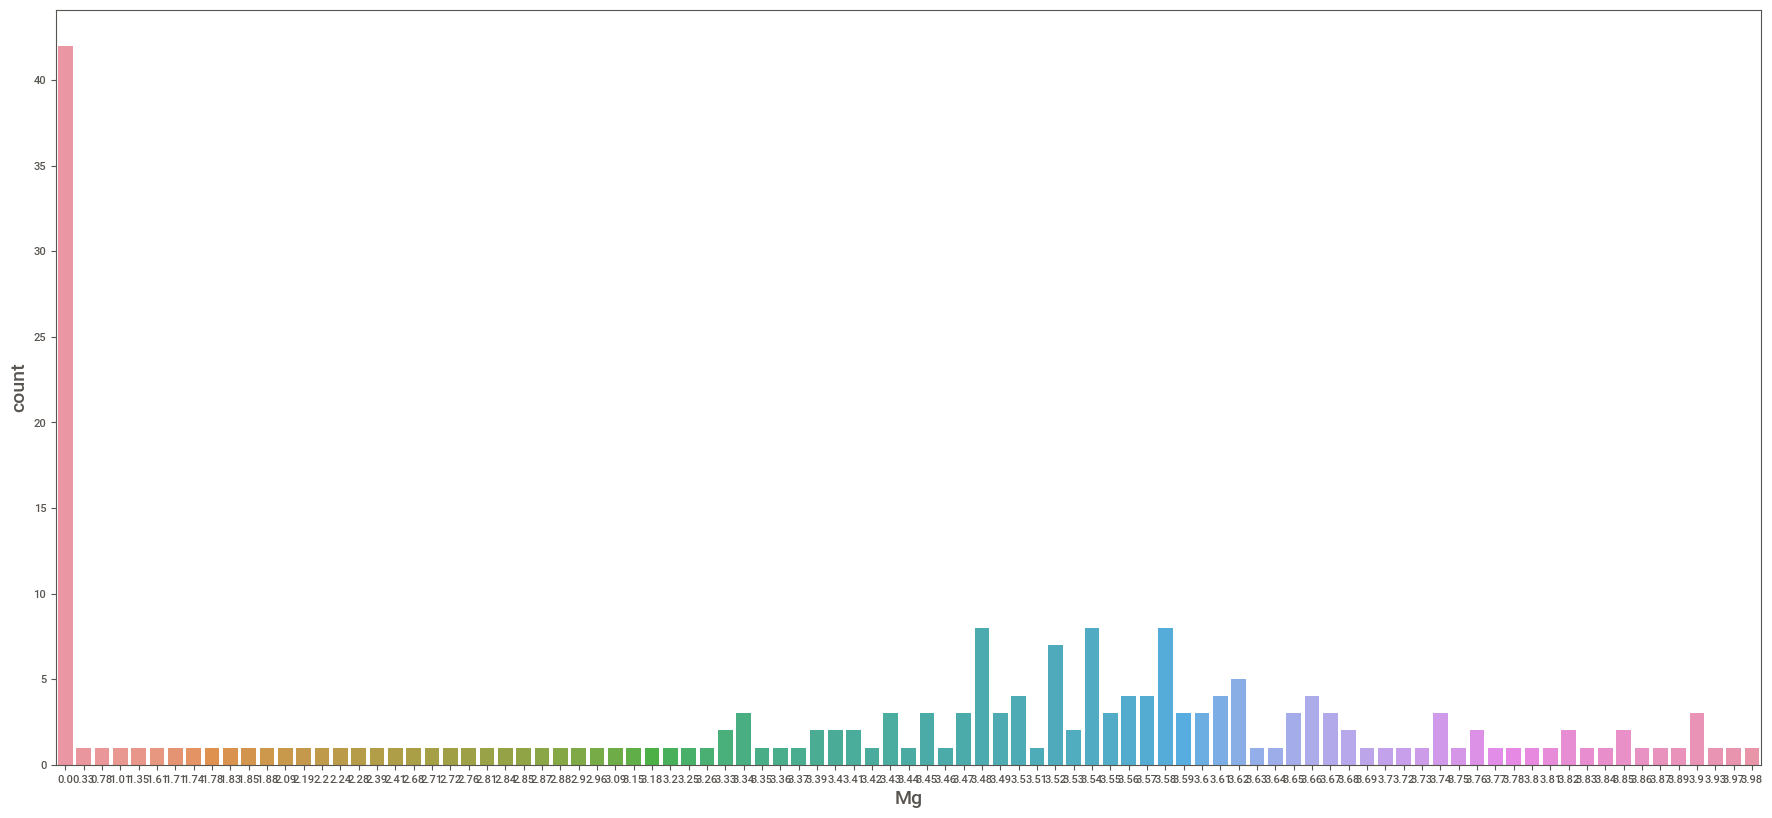

1.54    8
1.19    6
1.56    5
1.29    5
1.43    5
1.23    5
1.28    4
1.36    4
1.35    4
1.49    3
1.47    3
1.32    3
1.12    3
1.25    3
1.52    3
1.11    3
1.33    3
1.63    3
1.26    3
1.62    3
1.18    3
1.31    3
1.27    3
1.81    2
1.99    2
1.74    2
1.57    2
1.51    2
1.76    2
1.79    2
2.08    2
0.83    2
1.00    2
1.48    2
1.87    2
0.75    2
0.56    2
1.71    2
1.44    2
0.90    2
0.87    2
1.58    2
1.34    2
1.30    2
1.16    2
1.17    2
1.14    2
1.40    2
1.15    2
1.24    2
1.21    2
1.41    2
0.47    2
1.38    2
2.06    1
2.22    1
0.34    1
0.78    1
2.09    1
2.79    1
1.66    1
2.17    1
3.02    1
3.04    1
1.83    1
1.65    1
1.86    1
2.38    1
2.34    1
2.00    1
1.98    1
2.68    1
2.54    1
0.91    1
2.66    1
2.51    1
2.25    1
2.42    1
2.27    1
1.80    1
1.82    1
2.74    1
2.88    1
2.02    1
3.50    1
1.07    1
0.58    1
1.88    1
0.82    1
0.51    1
0.79    1
0.71    1
0.72    1
1.90    1
2.12    1
1.55    1
1.20    1
1.45    1
1.06    1
0.29    1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


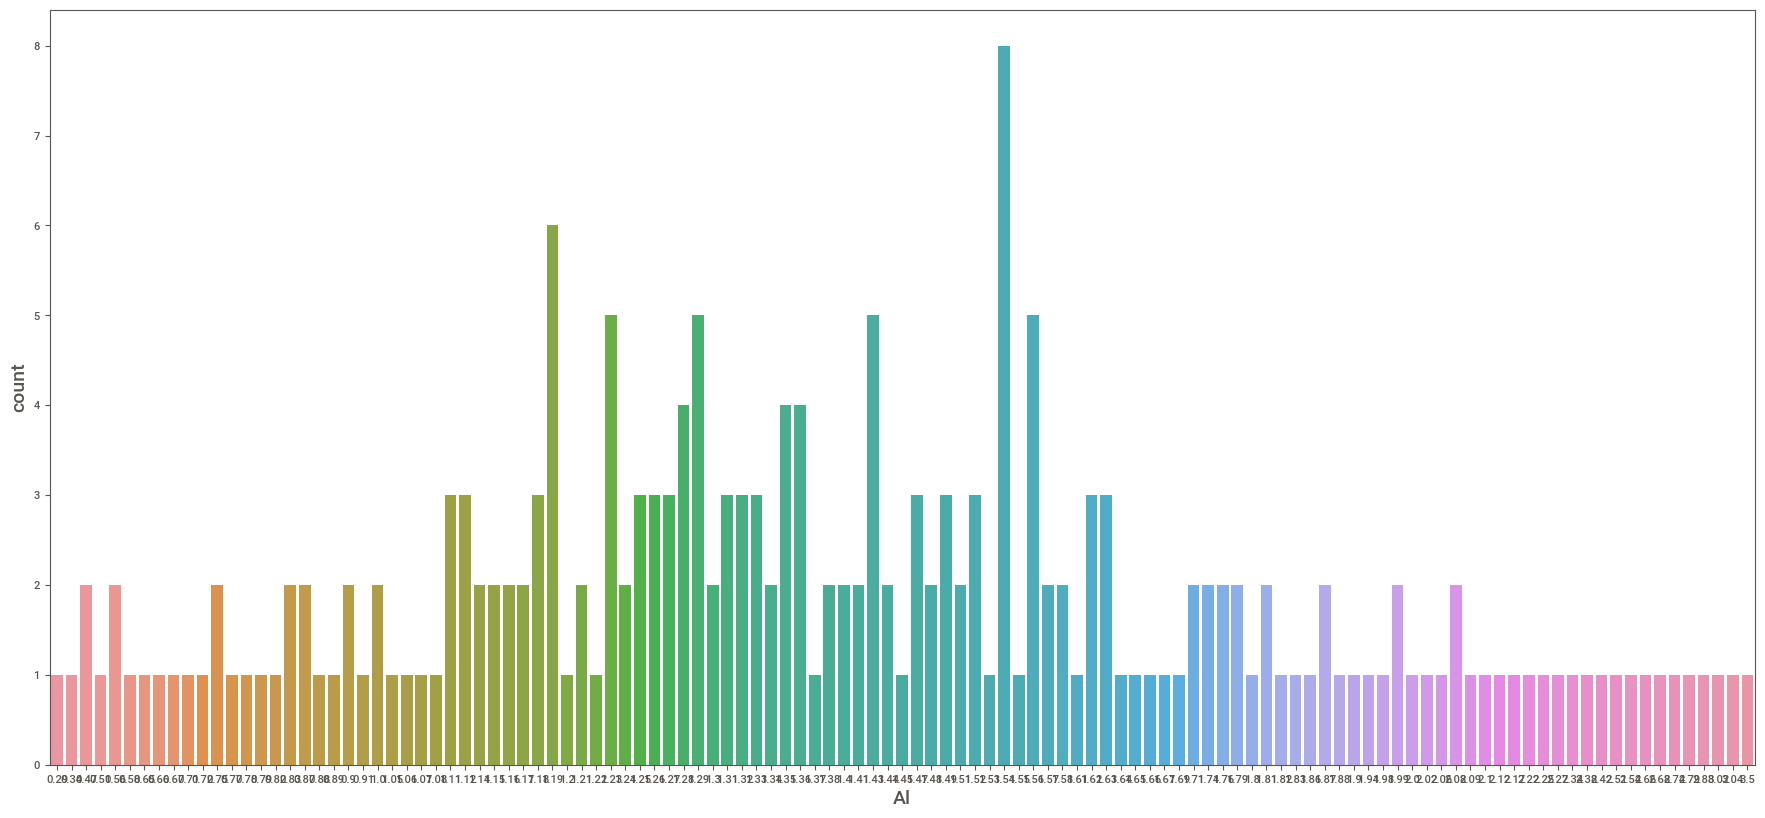

72.99    4
73.10    4
72.86    4
73.28    4
73.11    4
72.67    3
72.96    3
72.87    3
72.95    3
73.39    3
72.64    3
72.85    3
71.99    3
72.75    3
72.72    3
73.21    3
73.01    3
72.61    3
73.08    3
72.38    3
72.97    3
72.19    2
72.69    2
72.84    2
72.98    2
71.79    2
71.96    2
72.22    2
72.83    2
73.36    2
72.18    2
72.81    2
72.28    2
72.33    2
72.65    2
73.23    2
73.06    2
72.73    2
72.89    2
73.20    2
71.81    2
73.24    2
73.29    2
71.36    2
72.02    2
72.79    2
73.02    2
72.08    2
73.27    2
72.74    2
73.00    2
71.77    2
73.03    2
72.76    2
71.76    2
73.46    1
72.77    1
71.94    1
72.04    1
73.09    1
71.50    1
72.48    1
72.70    1
72.57    1
69.89    1
73.30    1
72.54    1
73.14    1
73.42    1
73.07    1
72.78    1
72.49    1
72.14    1
73.75    1
73.44    1
70.43    1
70.26    1
71.25    1
75.41    1
73.05    1
73.48    1
72.50    1
74.55    1
72.37    1
72.25    1
70.70    1
73.50    1
75.18    1
73.72    1
70.48    1
73.88    1

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


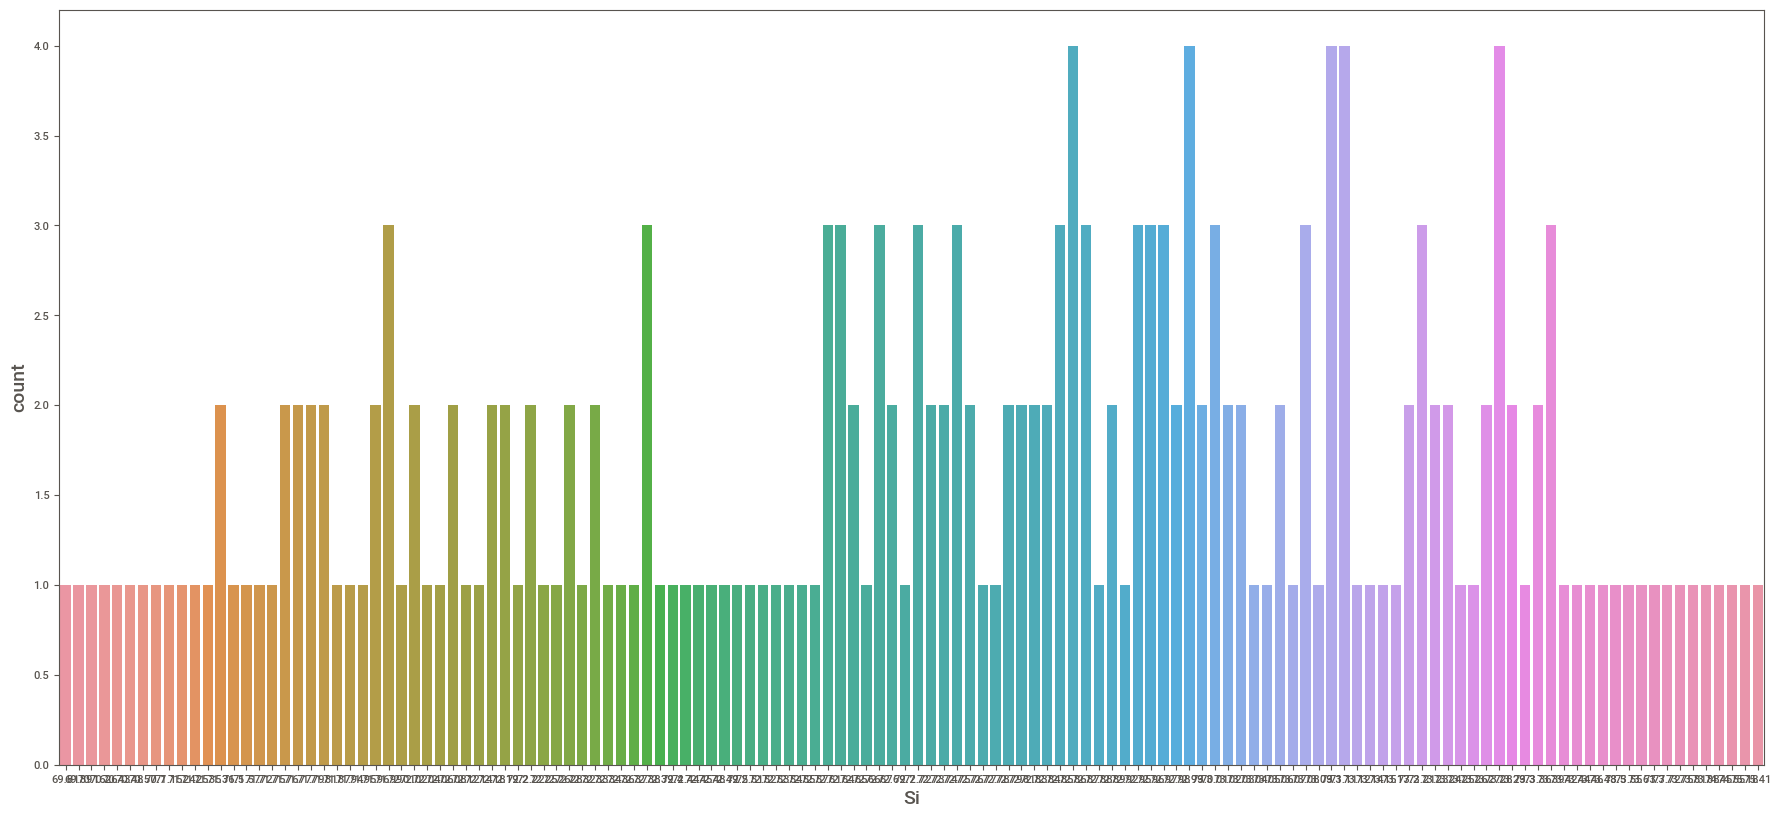

0.00    30
0.57    12
0.56    11
0.60    11
0.58    10
0.64     8
0.61     8
0.59     7
0.55     6
0.54     6
0.62     6
0.11     4
0.68     4
0.51     4
0.08     4
0.69     4
0.67     4
0.06     3
0.65     3
0.66     3
0.52     3
0.39     3
0.19     3
0.12     3
0.23     3
0.47     2
0.76     2
0.16     2
6.21     2
0.13     2
0.14     2
0.09     2
0.33     2
0.38     2
0.04     2
1.68     1
0.53     1
0.97     1
0.48     1
0.32     1
1.76     1
0.10     1
1.46     1
0.31     1
0.05     1
2.70     1
0.49     1
0.72     1
0.81     1
0.37     1
0.15     1
0.03     1
0.50     1
0.17     1
0.02     1
0.18     1
1.10     1
0.35     1
0.45     1
0.63     1
0.44     1
0.07     1
0.73     1
0.70     1
1.41     1
Name: K, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


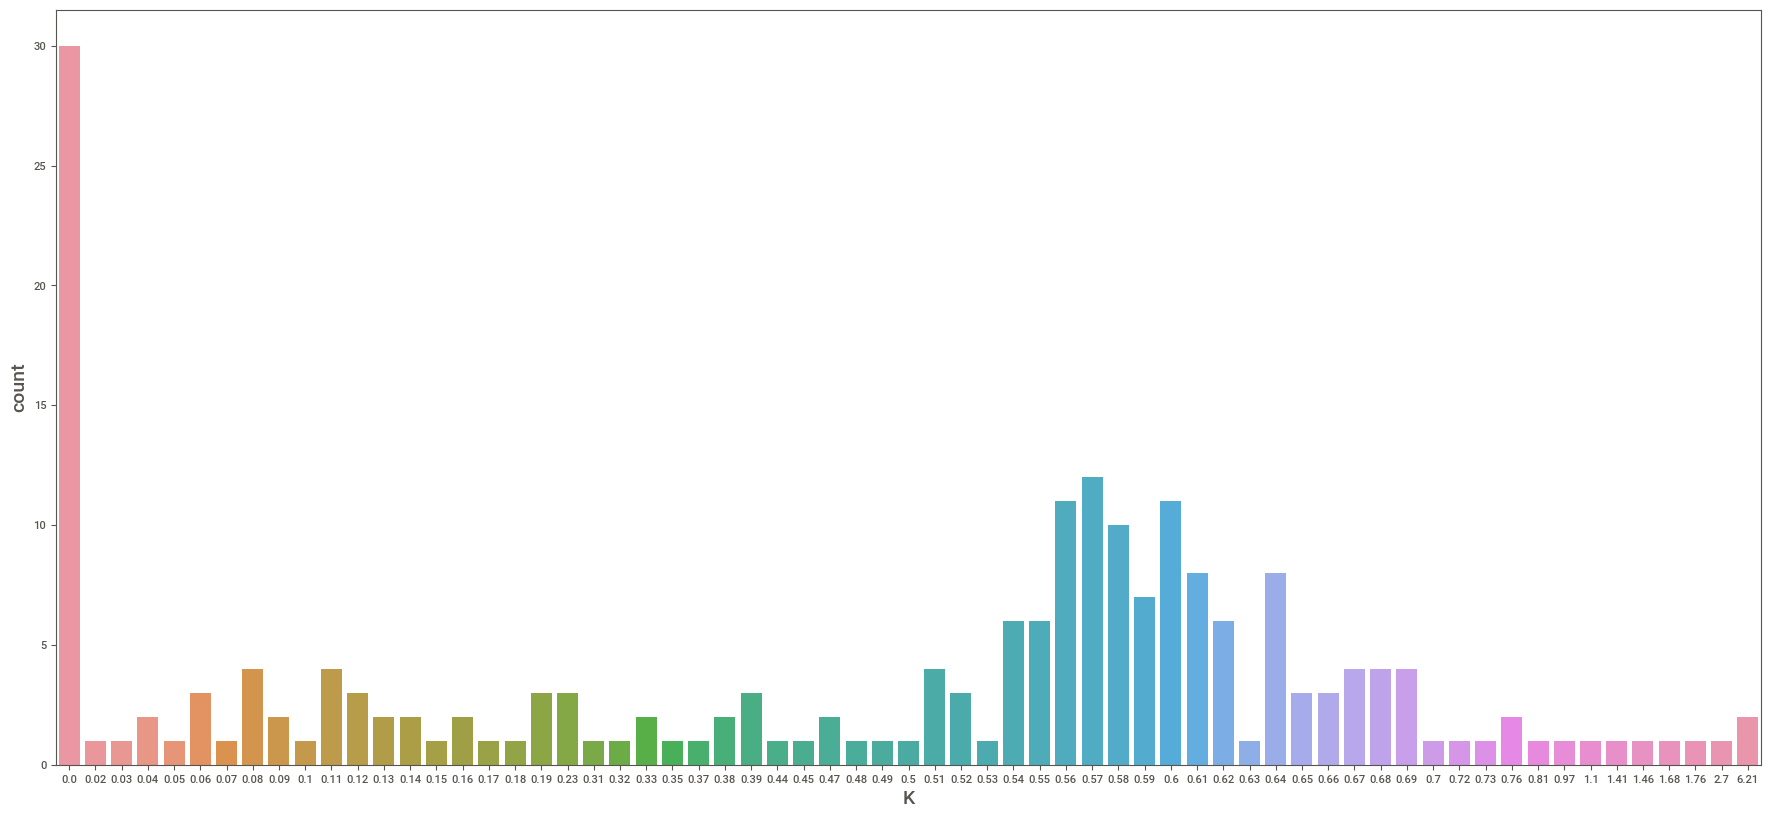

8.03     5
8.43     5
8.44     4
9.57     4
8.79     4
8.39     3
8.55     3
8.67     3
9.85     3
8.53     3
8.52     3
8.76     3
8.60     3
8.21     3
8.38     3
8.83     3
7.96     2
7.97     2
9.82     2
8.61     2
9.14     2
9.07     2
8.93     2
8.27     2
8.81     2
8.11     2
7.99     2
8.10     2
8.28     2
8.12     2
8.32     2
7.90     2
8.08     2
10.17    2
7.83     2
8.56     2
8.89     2
8.05     2
8.59     2
8.22     2
9.00     2
8.07     2
8.54     2
8.40     2
8.68     2
8.70     2
8.24     2
12.24    1
11.41    1
6.96     1
6.93     1
11.53    1
11.62    1
11.32    1
9.74     1
10.09    1
5.87     1
9.65     1
8.65     1
8.58     1
9.49     1
8.33     1
8.17     1
8.18     1
8.23     1
8.41     1
8.99     1
11.27    1
12.50    1
9.76     1
8.48     1
9.18     1
9.45     1
6.47     1
8.71     1
8.34     1
9.08     1
8.95     1
9.41     1
9.04     1
5.79     1
9.70     1
5.43     1
6.65     1
11.22    1
10.88    1
9.95     1
7.59     1
9.32     1
9.26     1
9.77     1

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


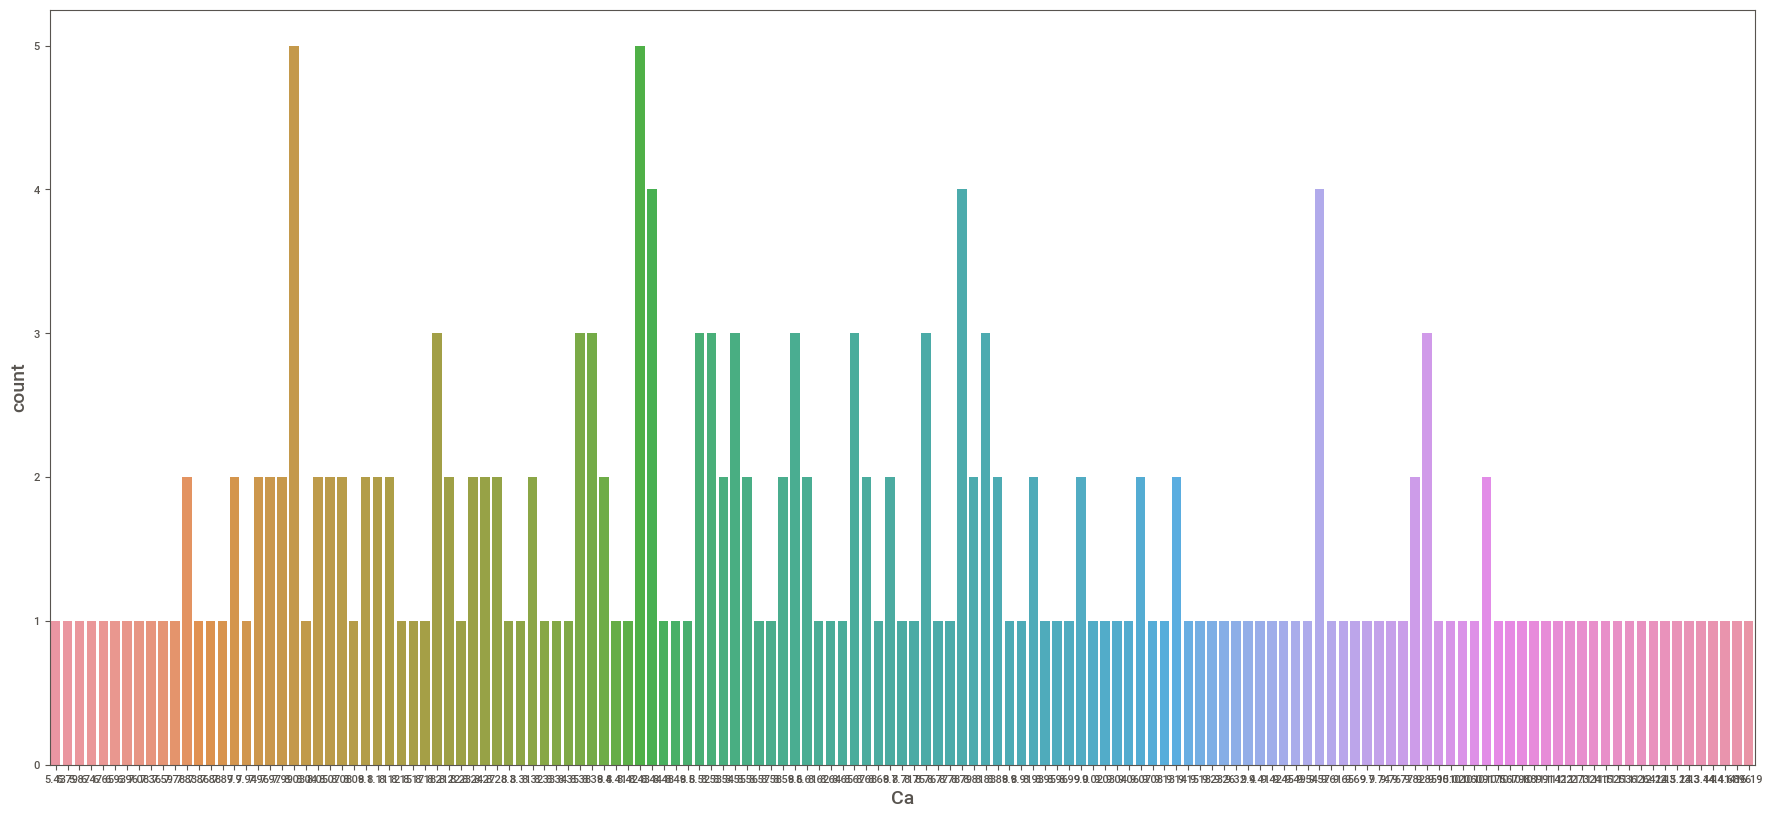

0.00    175
0.64      2
1.57      2
0.09      2
1.59      2
0.11      2
3.15      1
0.81      1
1.64      1
1.06      1
0.54      1
2.88      1
1.38      1
1.55      1
0.67      1
1.71      1
0.56      1
0.63      1
0.53      1
0.66      1
0.61      1
0.27      1
0.69      1
0.40      1
0.14      1
0.76      1
1.68      1
1.63      1
1.19      1
0.24      1
2.20      1
0.15      1
0.06      1
1.67      1
Name: Ba, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


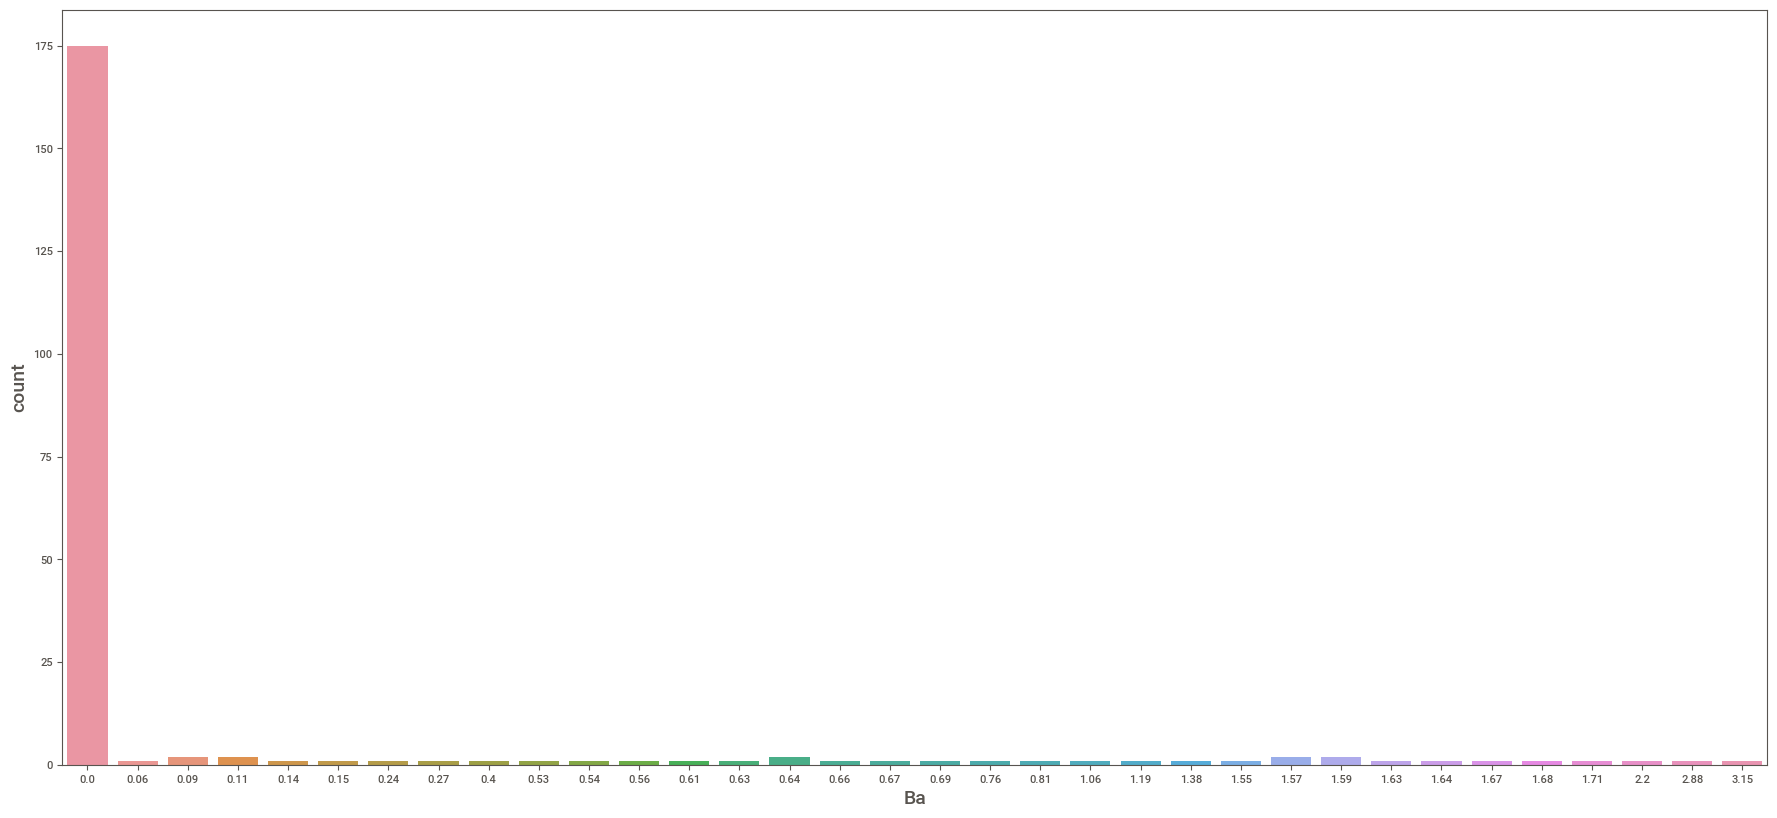

0.00    143
0.24      7
0.17      7
0.09      6
0.10      5
0.11      4
0.16      3
0.28      3
0.12      3
0.22      3
0.14      3
0.07      3
0.19      2
0.15      2
0.08      2
0.06      1
0.21      1
0.05      1
0.51      1
0.37      1
0.35      1
0.25      1
0.18      1
0.34      1
0.29      1
0.30      1
0.20      1
0.32      1
0.26      1
0.03      1
0.31      1
0.01      1
Name: Fe, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


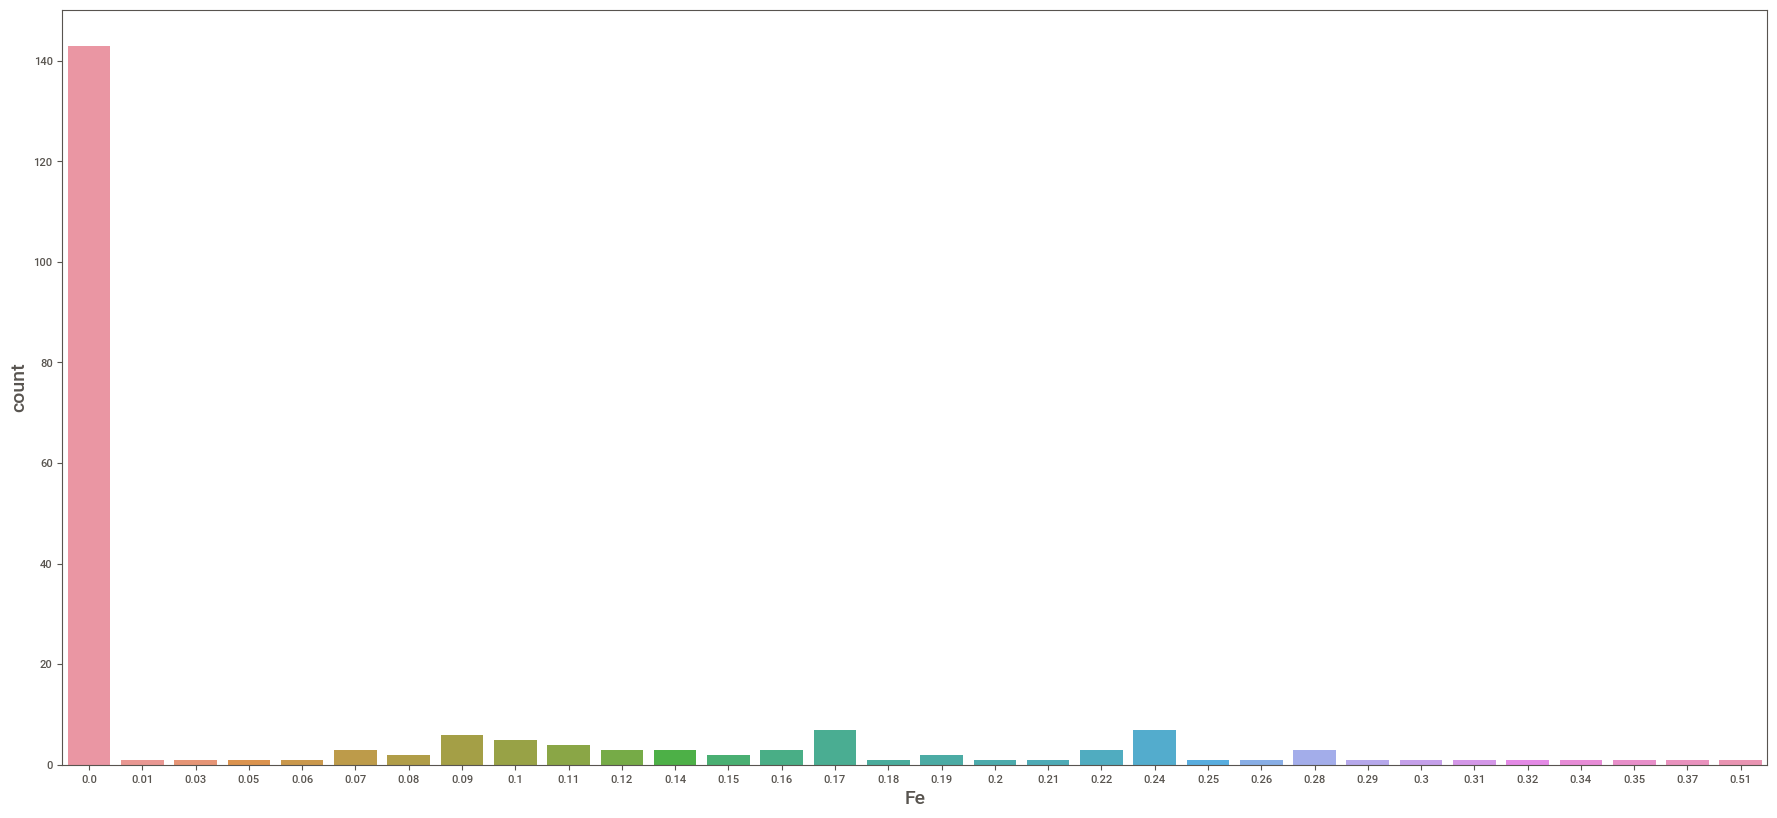

2    76
1    69
7    29
3    17
5    13
6     9
Name: Type of glass, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


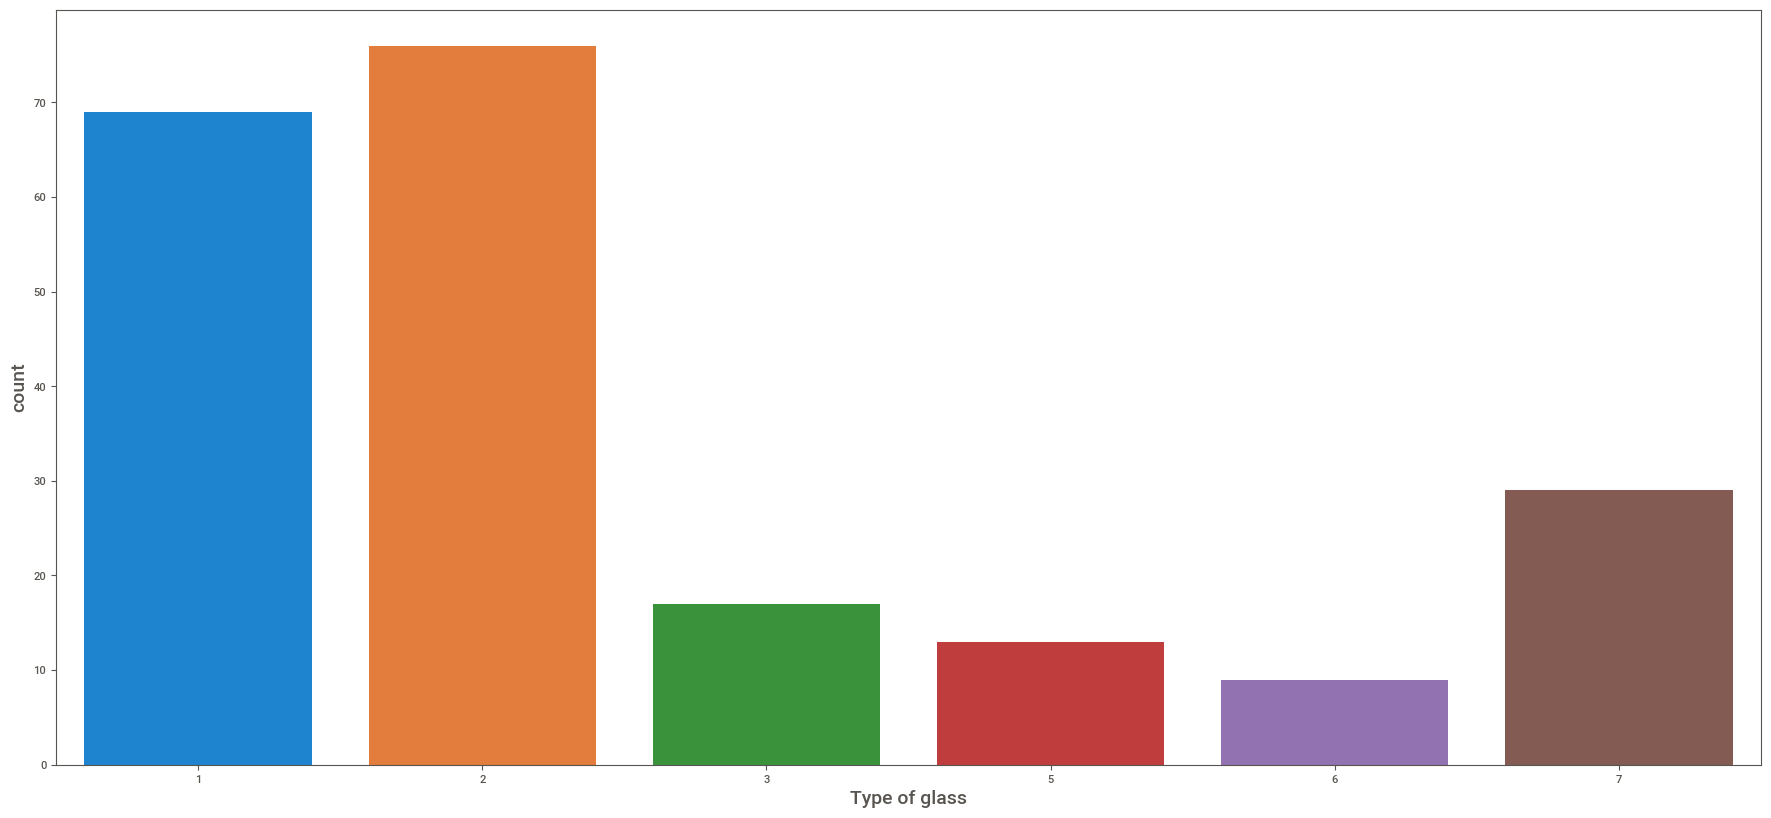

In [25]:
for columnname in columnnames:
  print(glass_df[columnname].value_counts())
  plt.figure(figsize=(22,10))
  sns.countplot(glass_df[columnname])
  plt.show()

In [26]:
glass_df12= glass_df.copy(deep=True)
glass_df12.head(12)

Id number       RI     Na    Mg    Al     Si     K    Ca   Ba    Fe  \
0           2  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.00   
1           3  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.00   
2           4  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.00   
3           5  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.00   
4           6  1.51596  12.79  3.61  1.62  72.97  0.64  8.07  0.0  0.26   
5           7  1.51743  13.30  3.60  1.14  73.09  0.58  8.17  0.0  0.00   
6           8  1.51756  13.15  3.61  1.05  73.24  0.57  8.24  0.0  0.00   
7           9  1.51918  14.04  3.58  1.37  72.08  0.56  8.30  0.0  0.00   
8          10  1.51755  13.00  3.60  1.36  72.99  0.57  8.40  0.0  0.11   
9          11  1.51571  12.72  3.46  1.56  73.20  0.67  8.09  0.0  0.24   
10         12  1.51763  12.80  3.66  1.27  73.01  0.60  8.56  0.0  0.00   
11         13  1.51589  12.88  3.43  1.40  73.28  0.69  8.05  0.0  0.24   

    Type of glass  
0               1  
1               1  
2               1  
3               1  
4               1  
5               1  
6               1  
7               1  
8               1  
9               1  
10              1  
11              1

In [27]:
columnnames =list(glass_df12.columns)

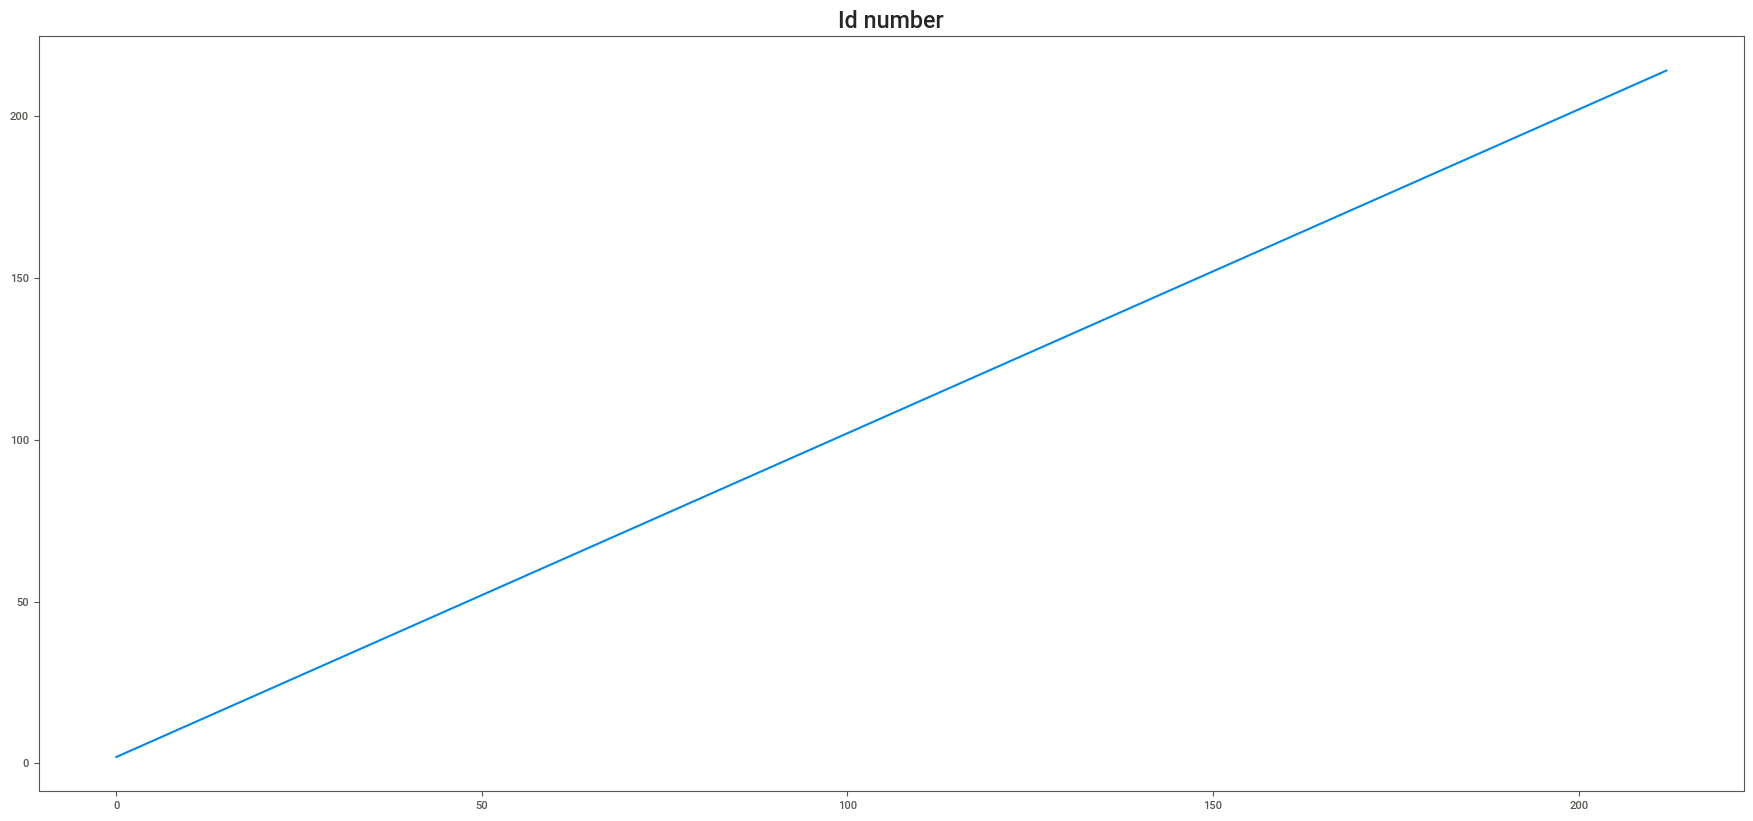

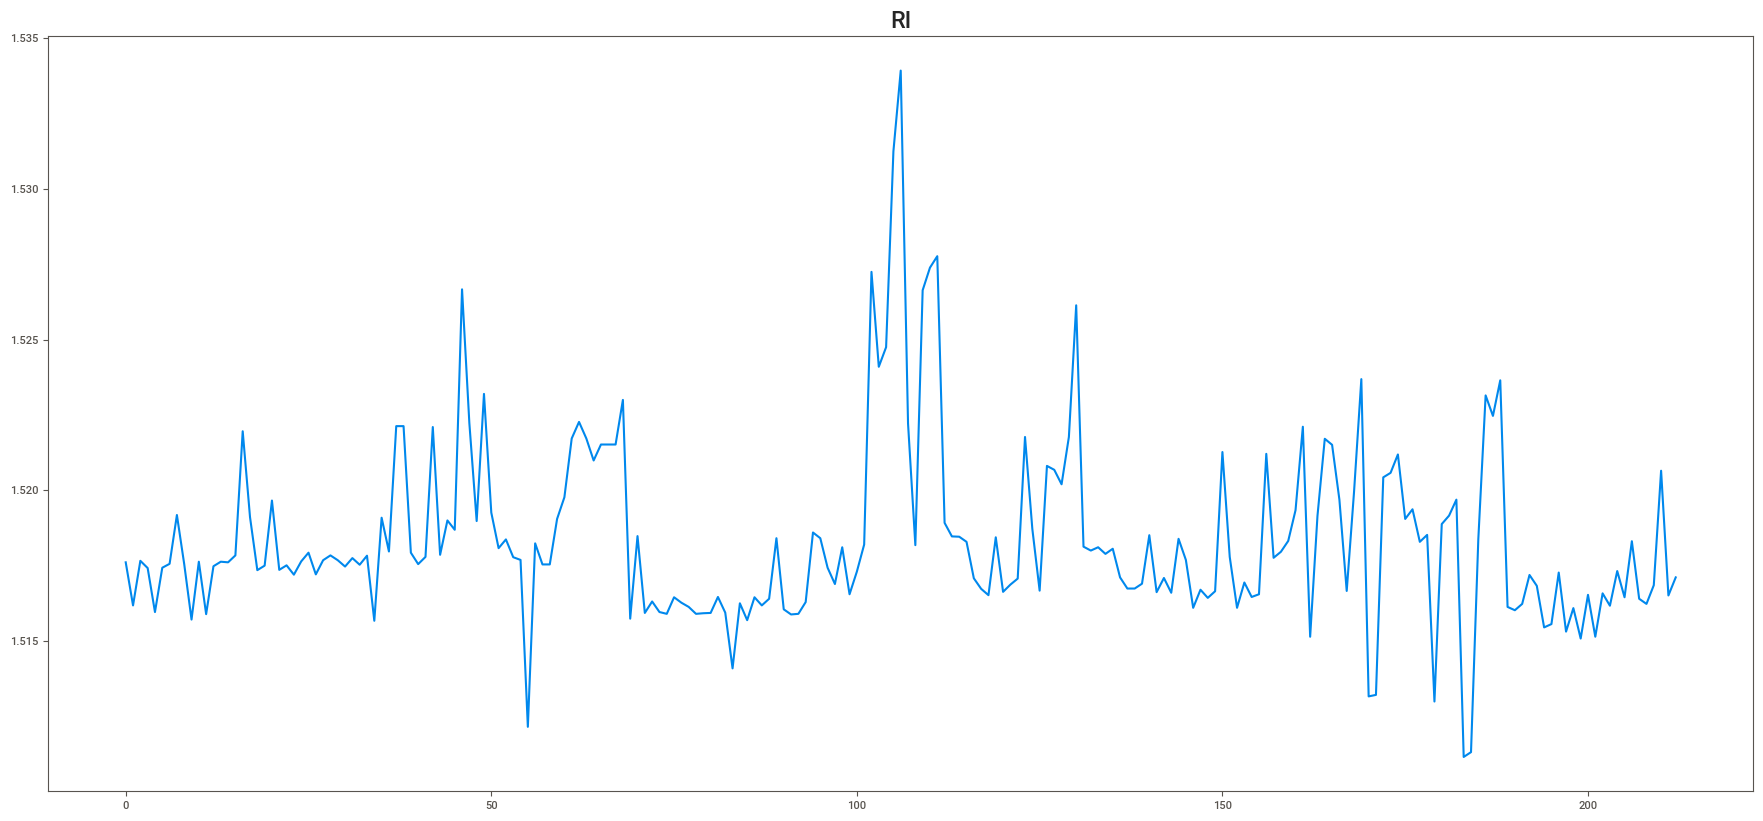

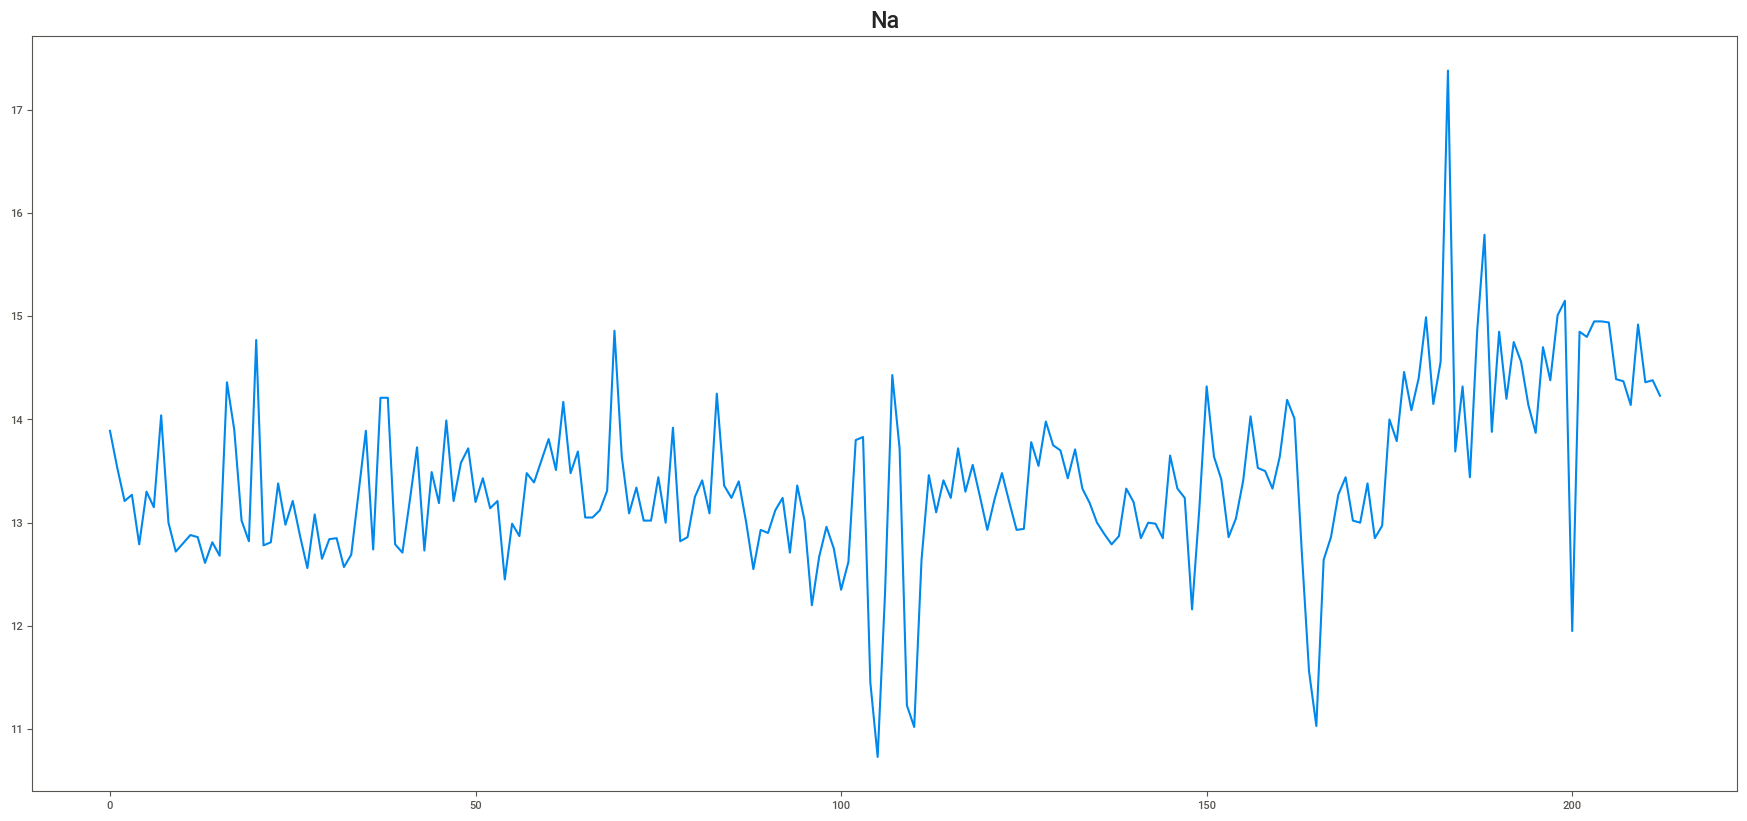

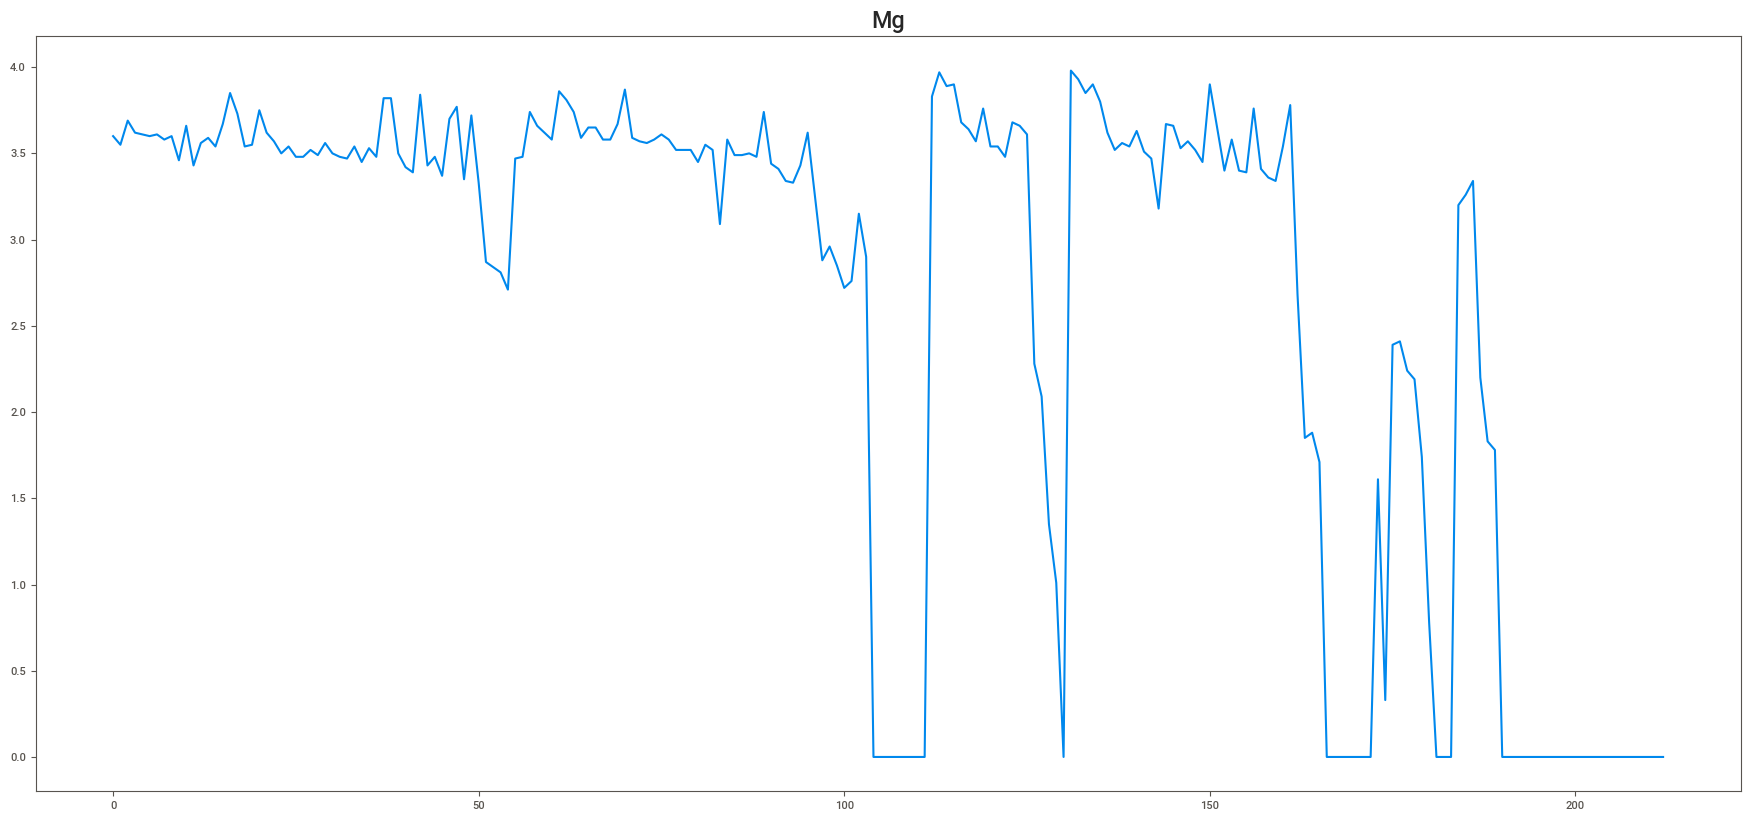

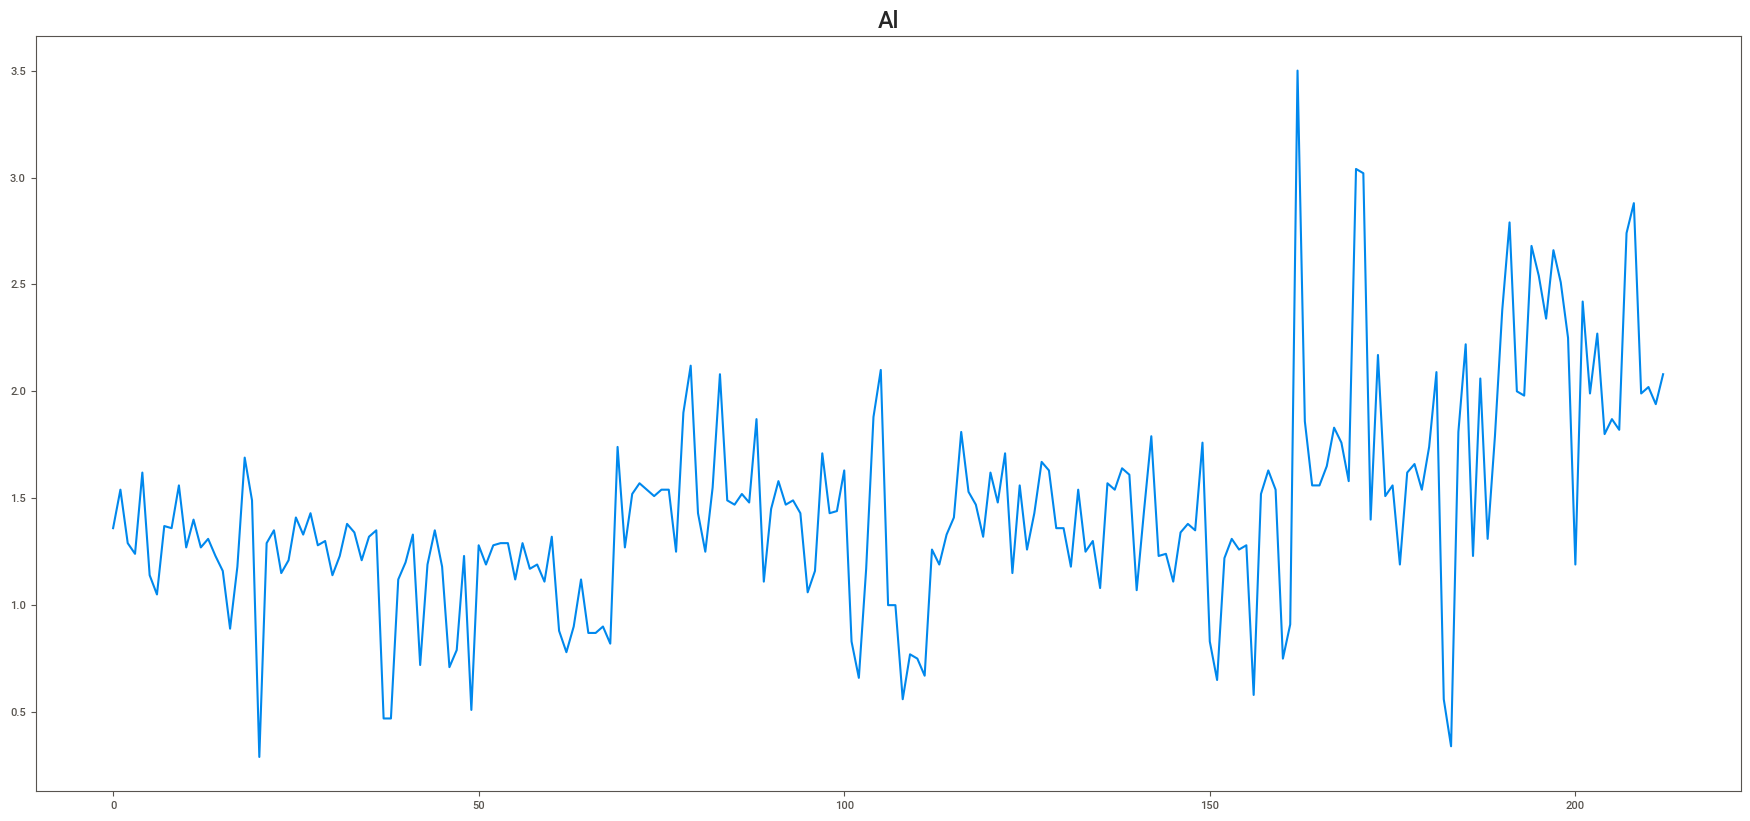

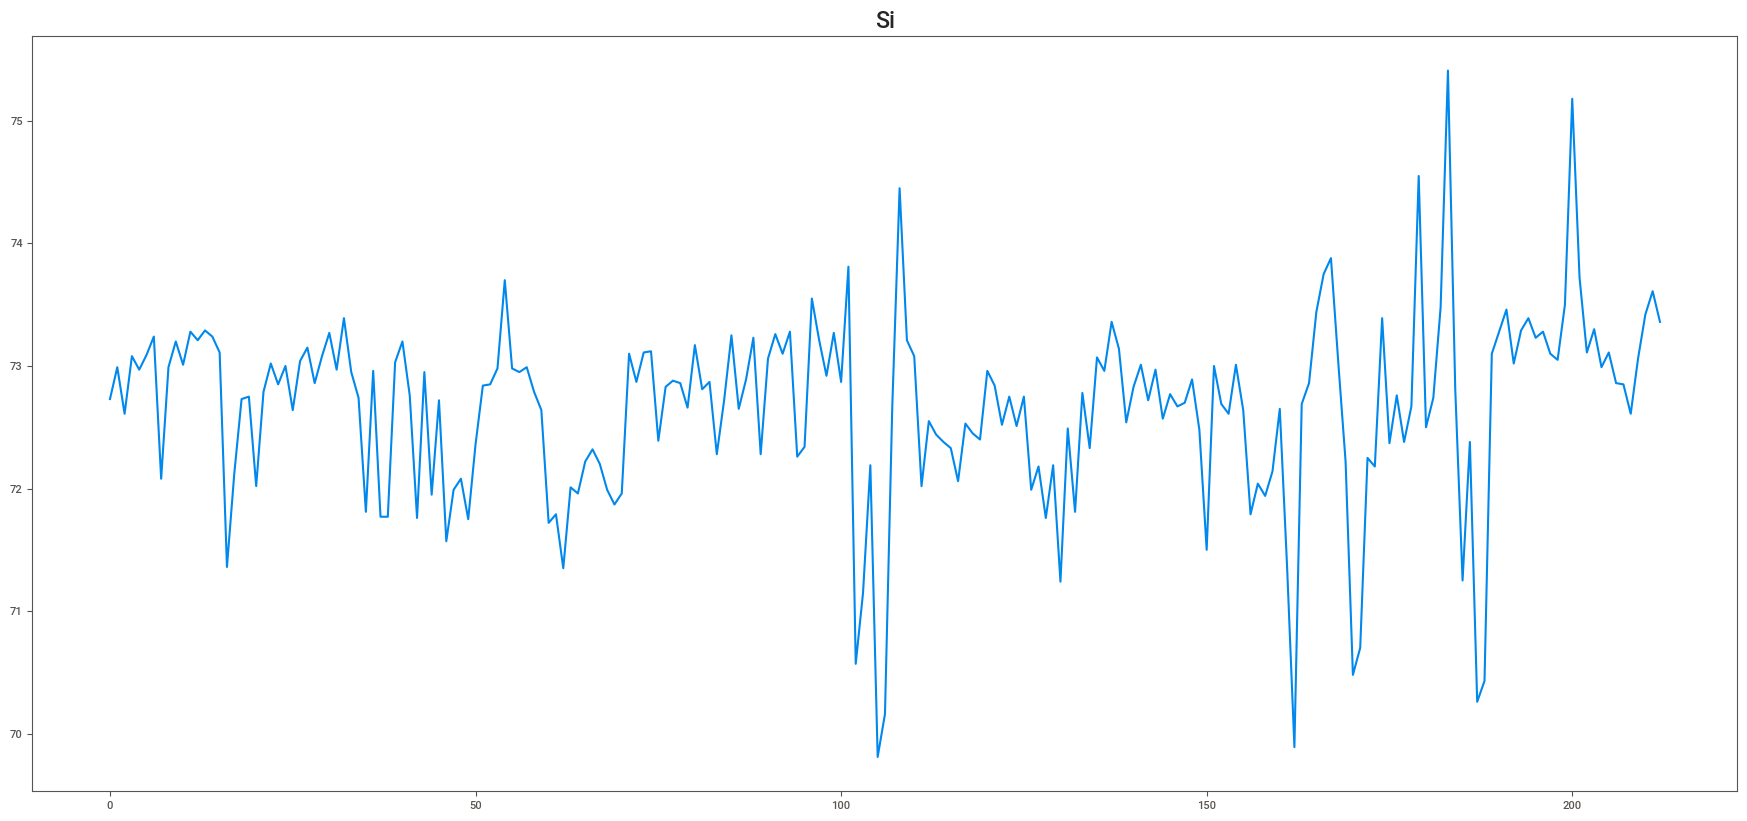

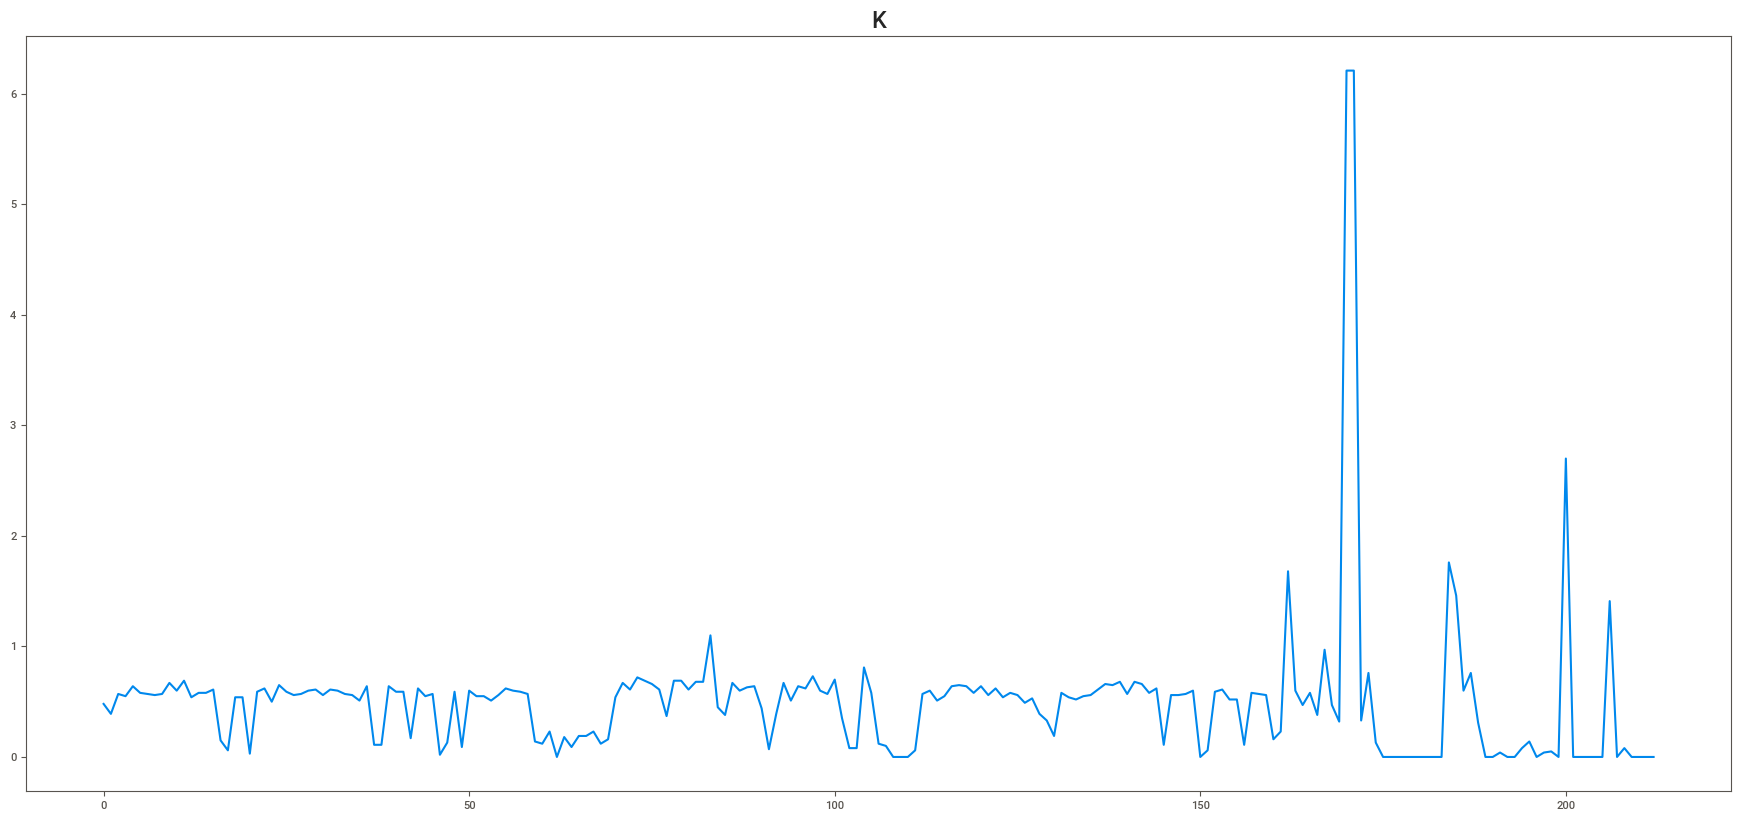

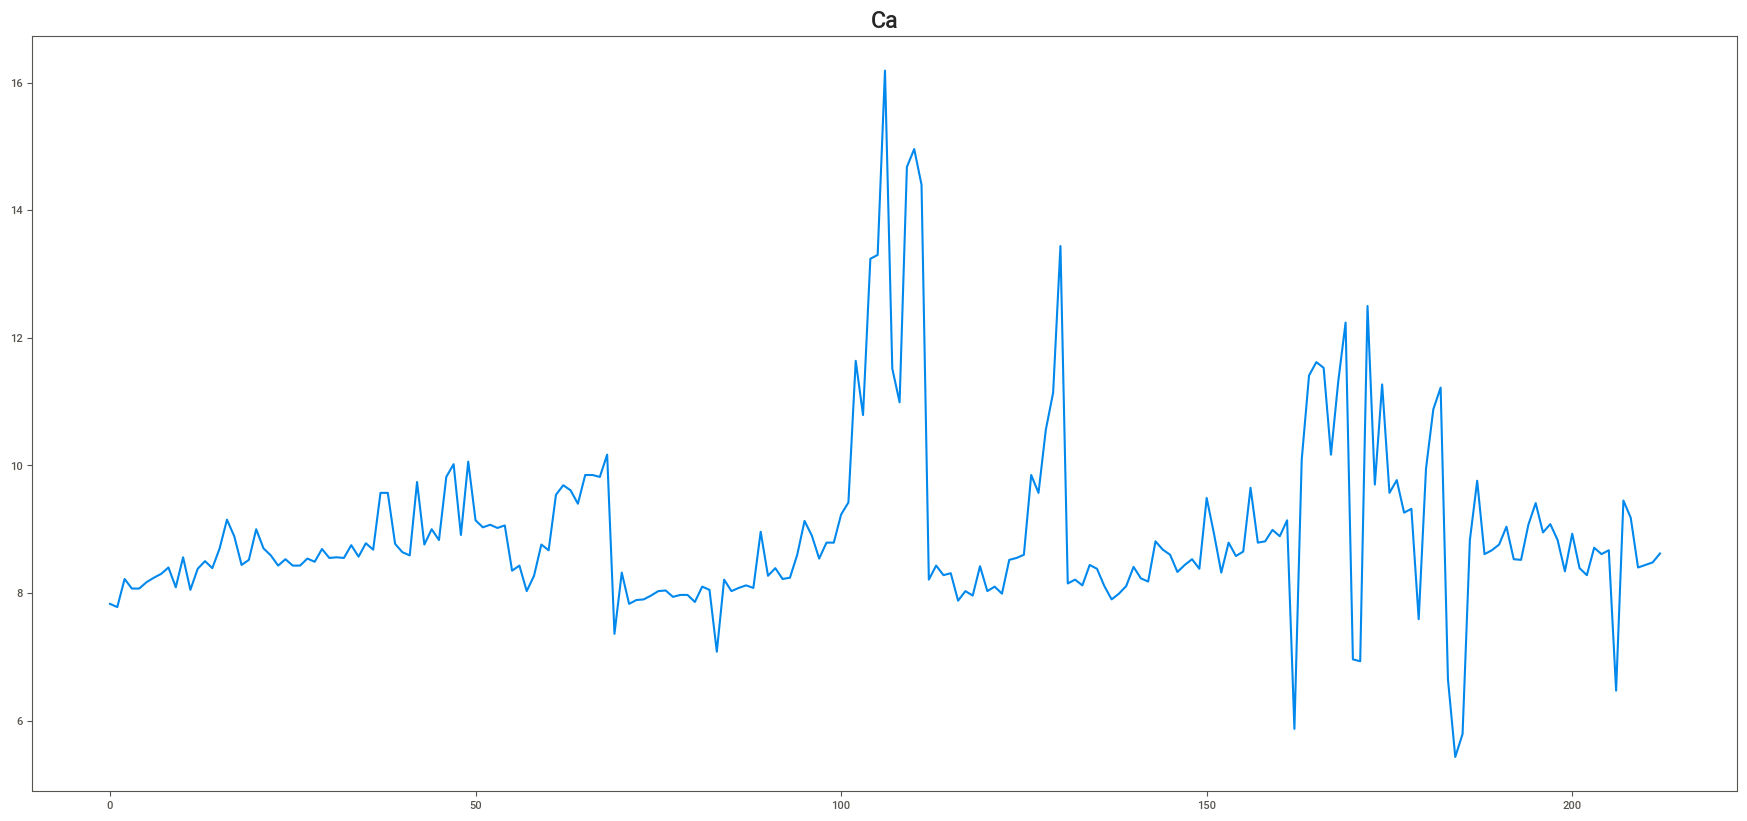

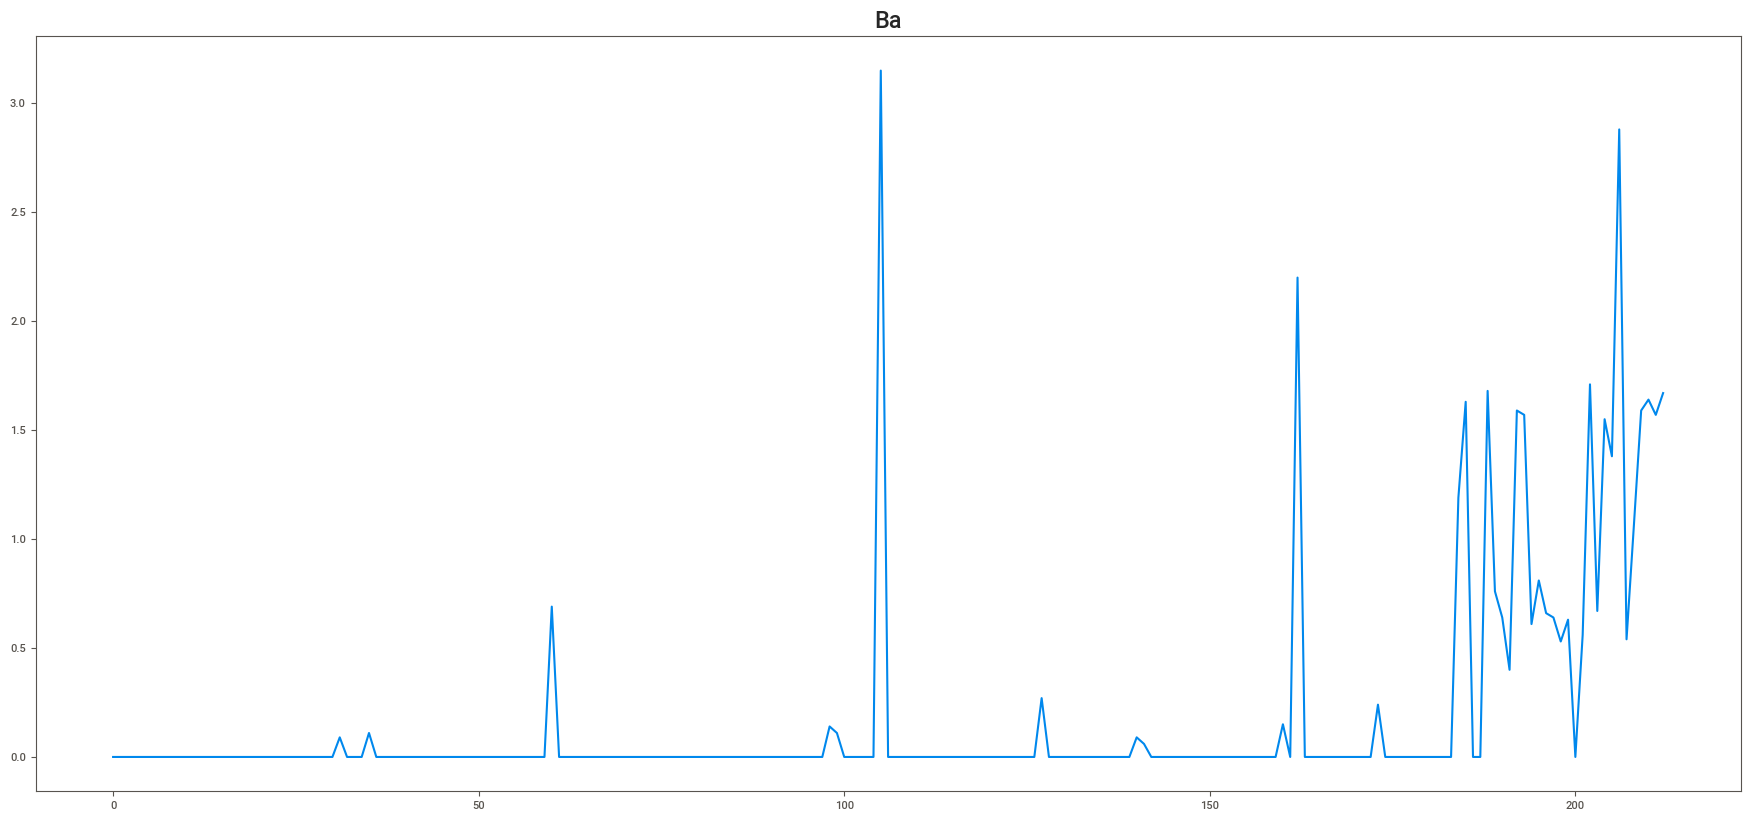

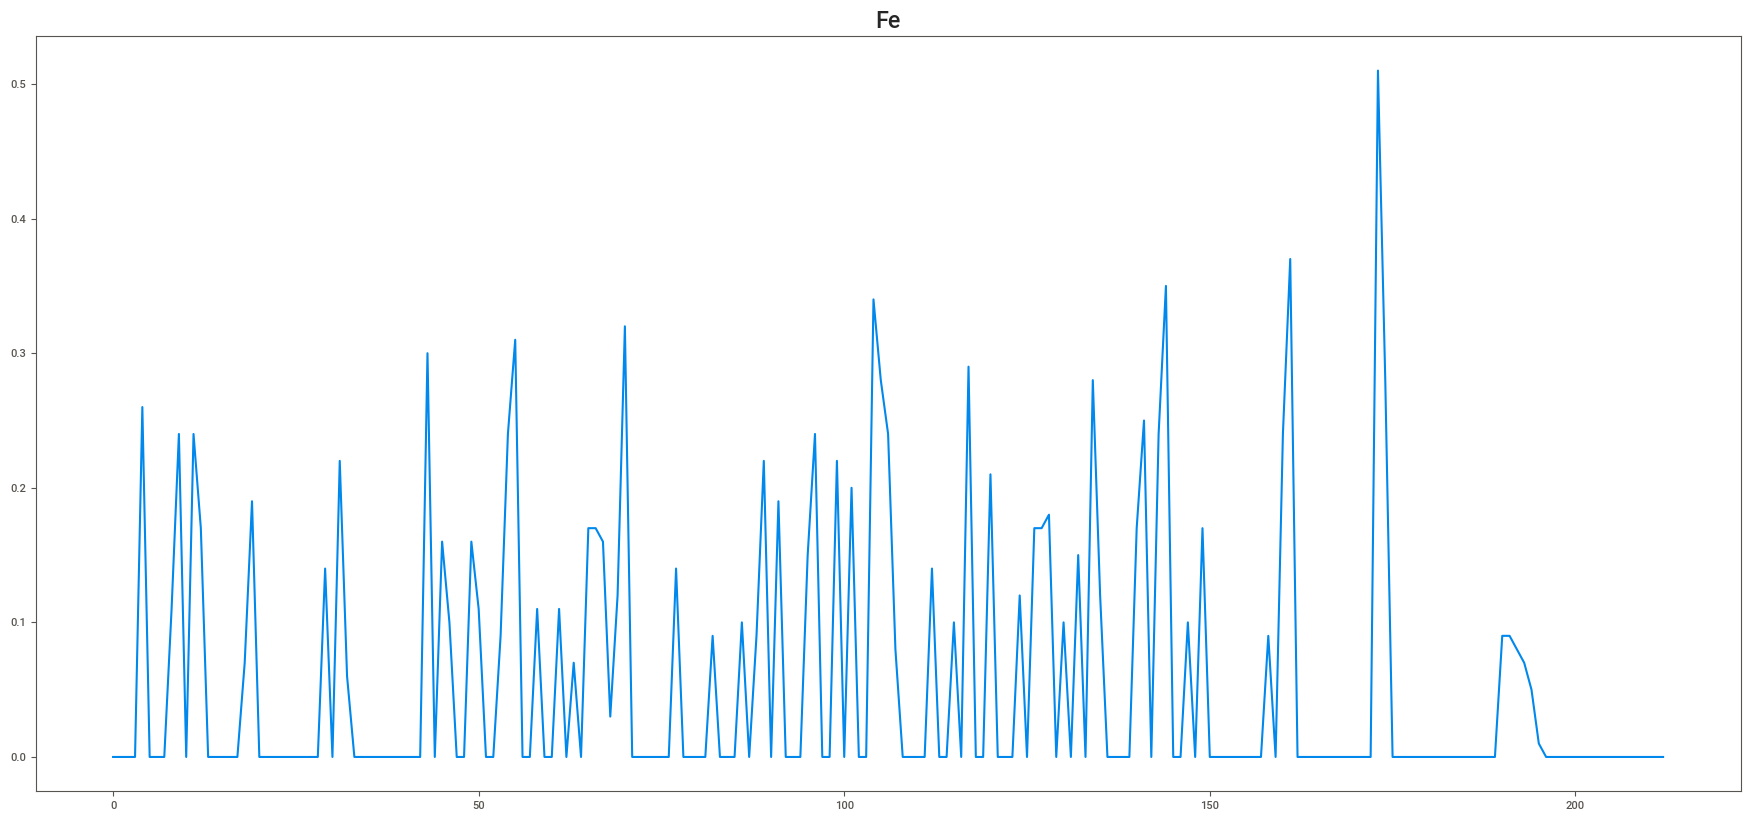

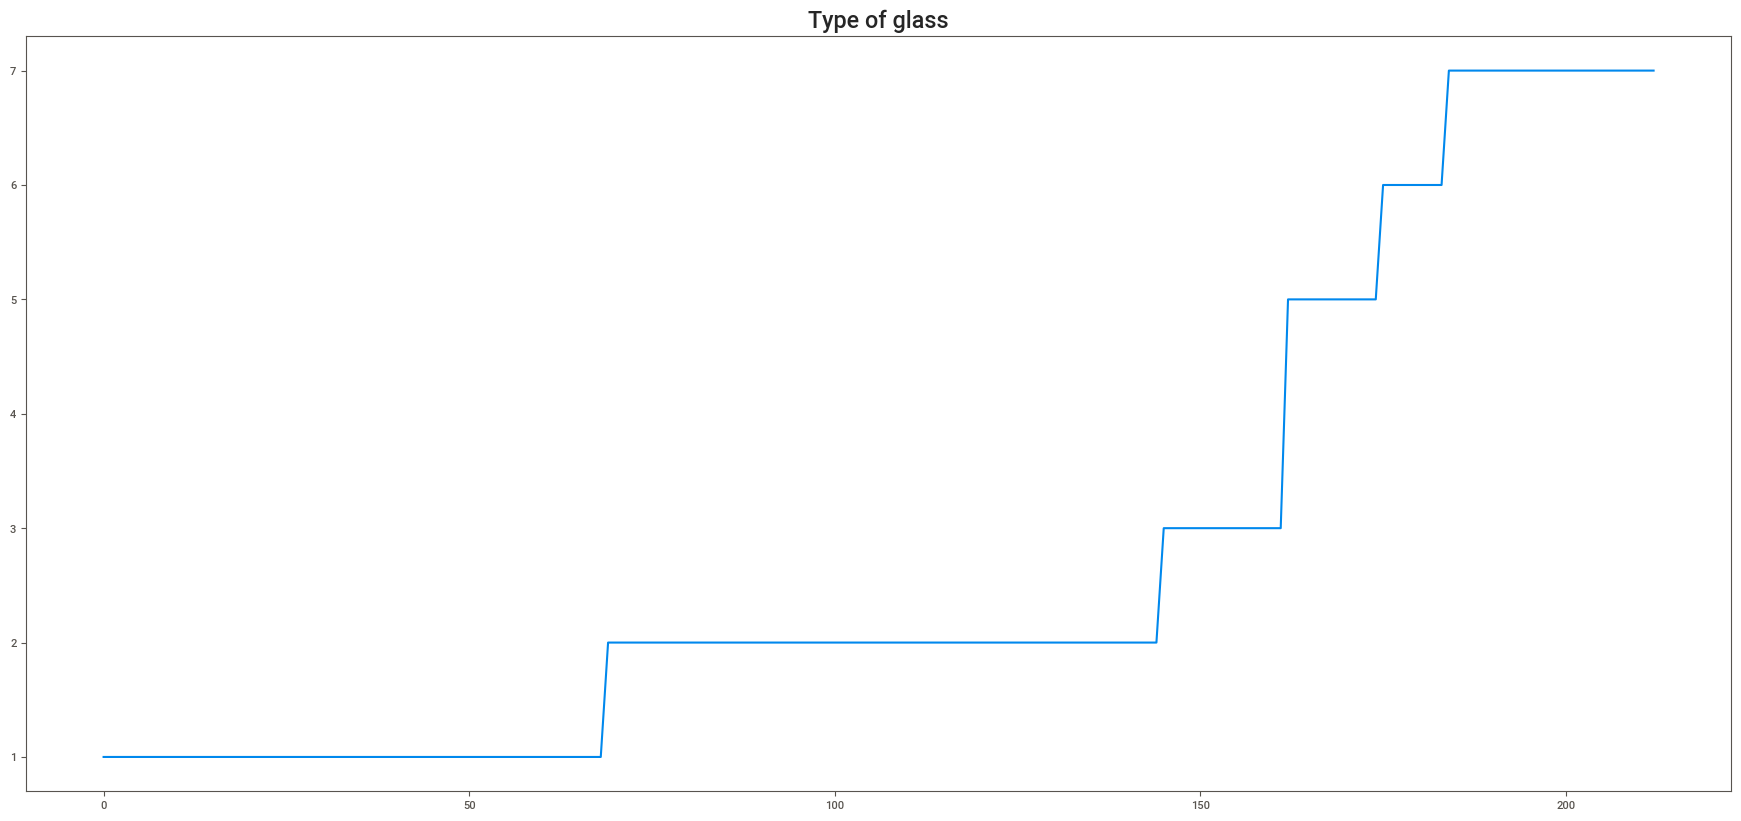

In [28]:
for columnname in columnnames:
  plt.figure(figsize=(22,10))
  glass_df12[columnname].plot()
  plt.title(columnname)
  plt.show()

## Investigating Missing Values

In [29]:
glass_df.isnull().sum()

Id number        0
RI               0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type of glass    0
dtype: int64

In [30]:
glass_df.isnull().any()

Id number        False
RI               False
Na               False
Mg               False
Al               False
Si               False
K                False
Ca               False
Ba               False
Fe               False
Type of glass    False
dtype: bool

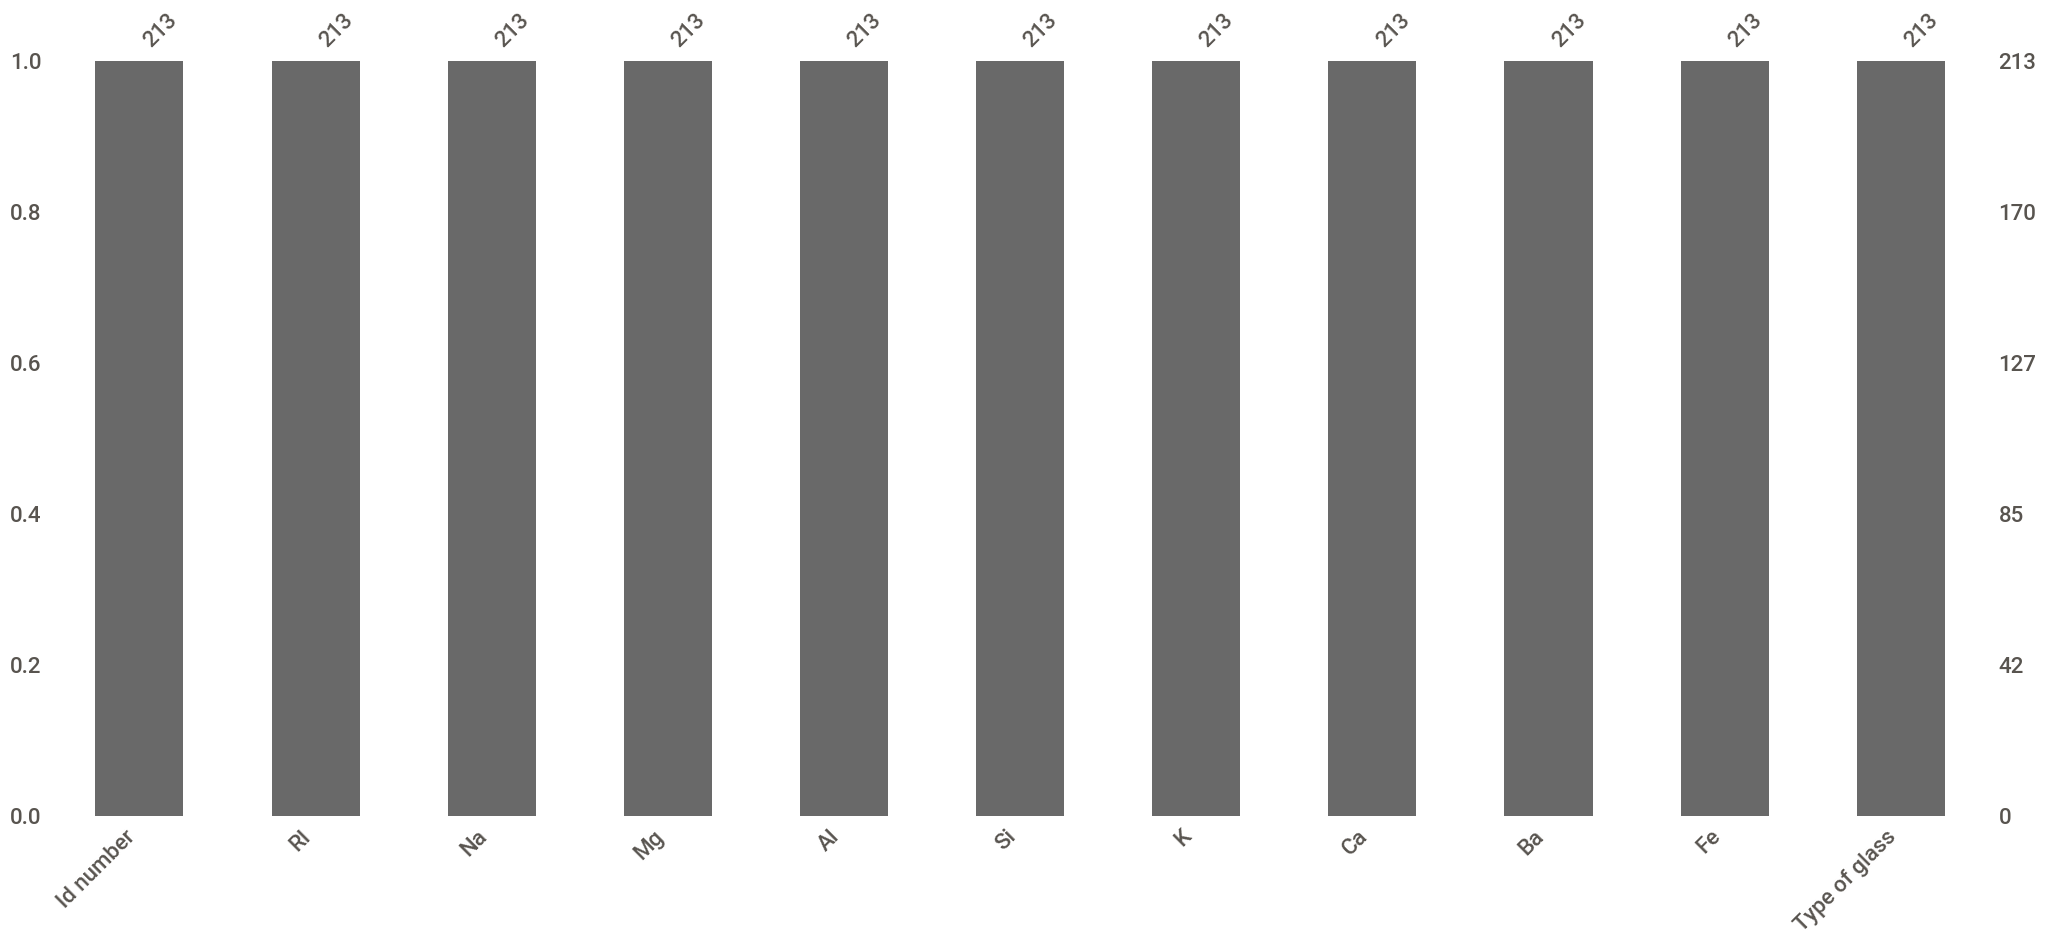

In [31]:
# Plot amount of missingness
msno.bar(glass_df) # you can see pandas-profilin count part

plt.show()

##Discuss your findings and what relevance they might have on your planned classification algorithms

During EDA we analyzed that there are 6 type of glass datasamples is given in 

*   This data building_windows_float_processed ,building_windows_non_float_processed
,vehicle_windows_float_processed ,containers ,tableware and headlamps there is no data from type vehicle_windows_non_float_processed (none in this database)
*   There is no NA, NAN or Null field in this data that means data has no missing values

*   All the values are float numeric values except the Type of glass
*   There is a column ID number which should be droped before model training and classification





# Requirement 2:
•	Perform anypreparation of the data, that you feel is necessary, using python in your Jupyter notebook. Explain your rationale behind your data preparation and how it will assist you.[0-30]

##Data Preprocessing


*  Missing Value Treatment
*  Treating Outlier




## Missing Value Treatment

In [32]:
### Forward Fill
# Impute data DataFrame with ffill and bfill method
glass_df_bfill_imputed = glass_df.copy(deep=True)

glass_df_bfill_imputed.fillna(method='ffill',inplace=True)
glass_df_bfill_imputed.fillna(method='bfill',inplace=True)

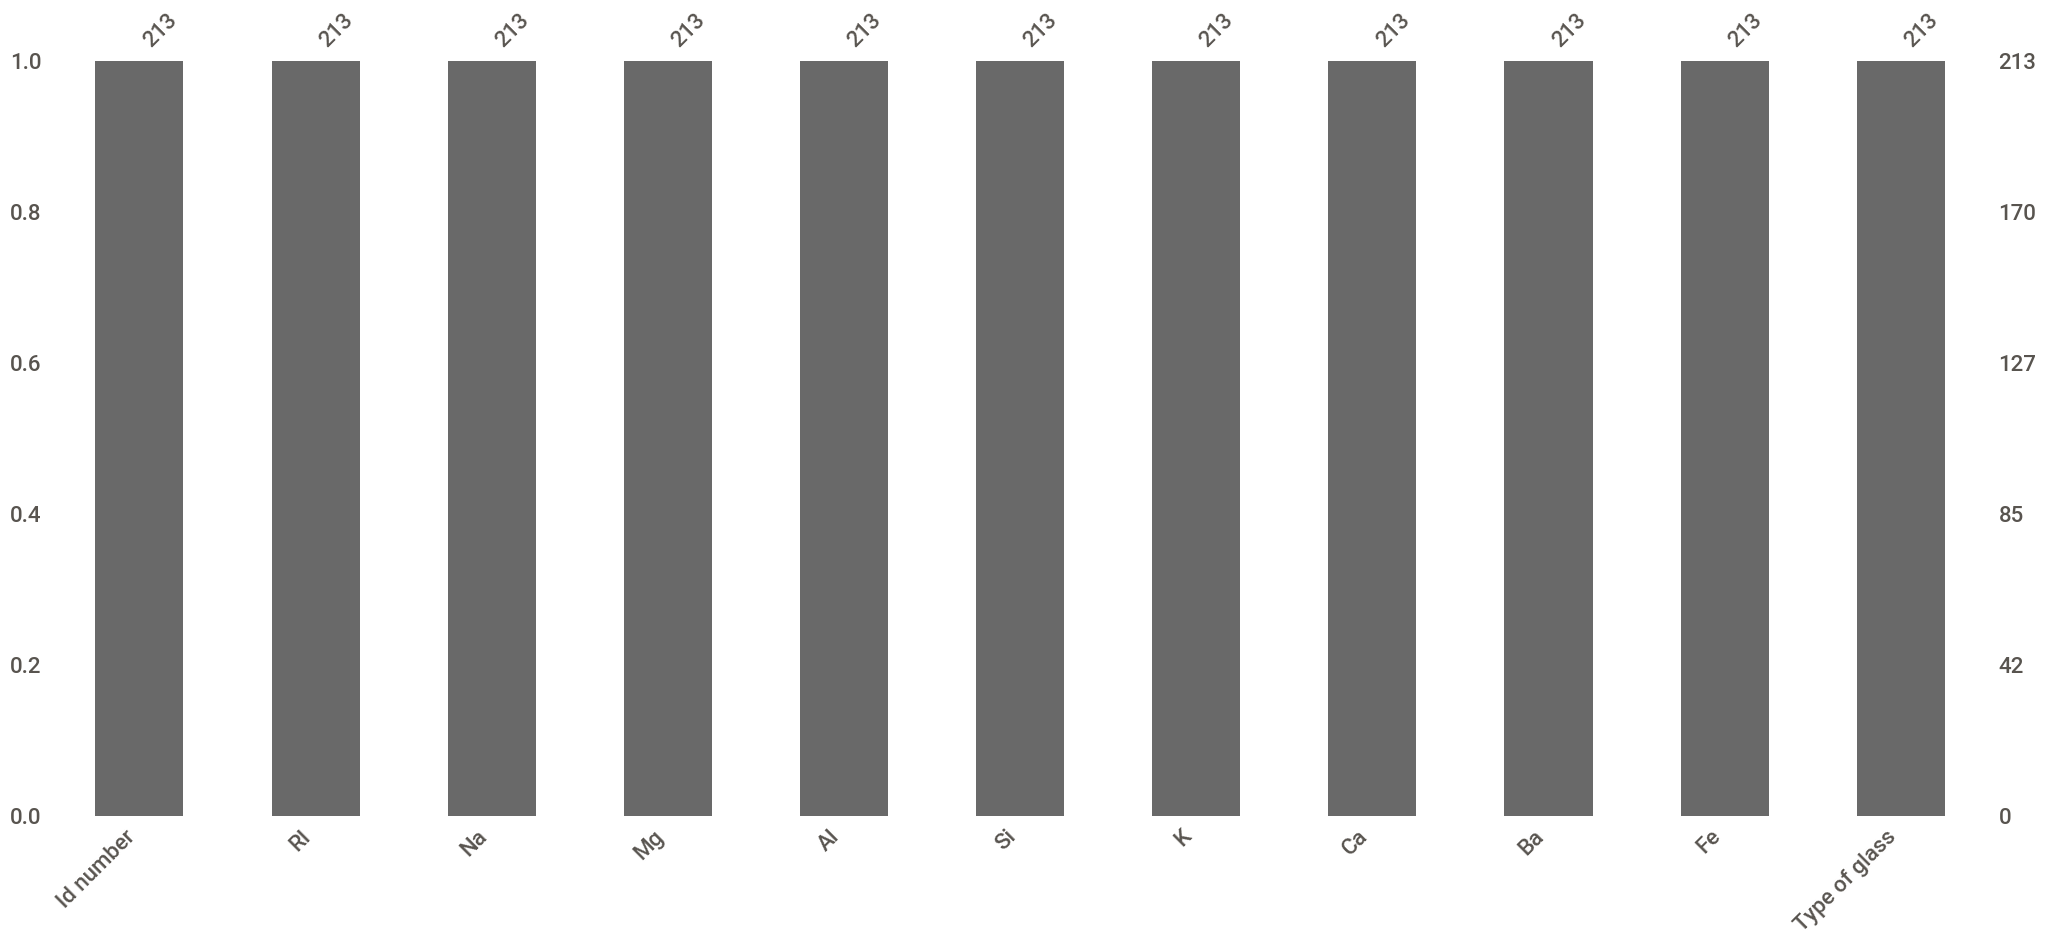

In [33]:
# Plot amount of missingness
msno.bar(glass_df_bfill_imputed) # you can see pandas-profilin count part

plt.show()

In [34]:
glass_df_bfill_imputed.head()

Id number       RI     Na    Mg    Al     Si     K    Ca   Ba    Fe  \
0          2  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.00   
1          3  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.00   
2          4  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.00   
3          5  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.00   
4          6  1.51596  12.79  3.61  1.62  72.97  0.64  8.07  0.0  0.26   

   Type of glass  
0              1  
1              1  
2              1  
3              1  
4              1

## Convert timestemps and dataset index

In [35]:
glass_df_bfill_imputed_transformed = glass_df_bfill_imputed.copy(deep=True)
glass_df_bfill_imputed_transformed.head(12)

Id number       RI     Na    Mg    Al     Si     K    Ca   Ba    Fe  \
0           2  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.00   
1           3  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.00   
2           4  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.00   
3           5  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.00   
4           6  1.51596  12.79  3.61  1.62  72.97  0.64  8.07  0.0  0.26   
5           7  1.51743  13.30  3.60  1.14  73.09  0.58  8.17  0.0  0.00   
6           8  1.51756  13.15  3.61  1.05  73.24  0.57  8.24  0.0  0.00   
7           9  1.51918  14.04  3.58  1.37  72.08  0.56  8.30  0.0  0.00   
8          10  1.51755  13.00  3.60  1.36  72.99  0.57  8.40  0.0  0.11   
9          11  1.51571  12.72  3.46  1.56  73.20  0.67  8.09  0.0  0.24   
10         12  1.51763  12.80  3.66  1.27  73.01  0.60  8.56  0.0  0.00   
11         13  1.51589  12.88  3.43  1.40  73.28  0.69  8.05  0.0  0.24   

    Type of glass  
0               1  
1               1  
2               1  
3               1  
4               1  
5               1  
6               1  
7               1  
8               1  
9               1  
10              1  
11              1

In [36]:
columnnames=list(glass_df_bfill_imputed_transformed.columns)
print(columnnames)

['Id number', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type of glass']


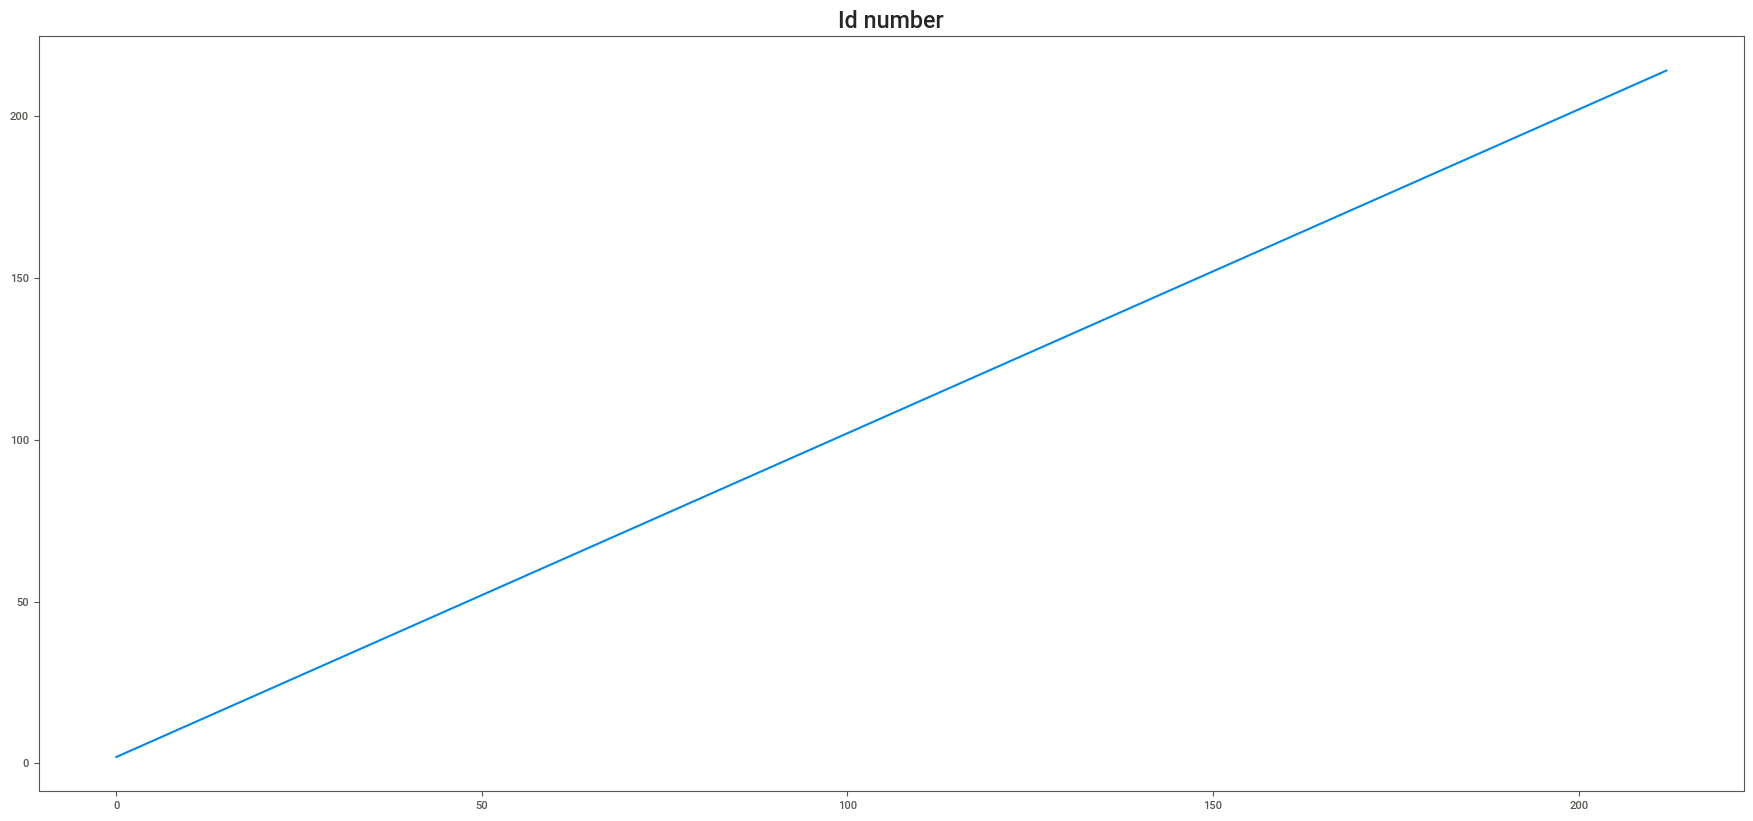

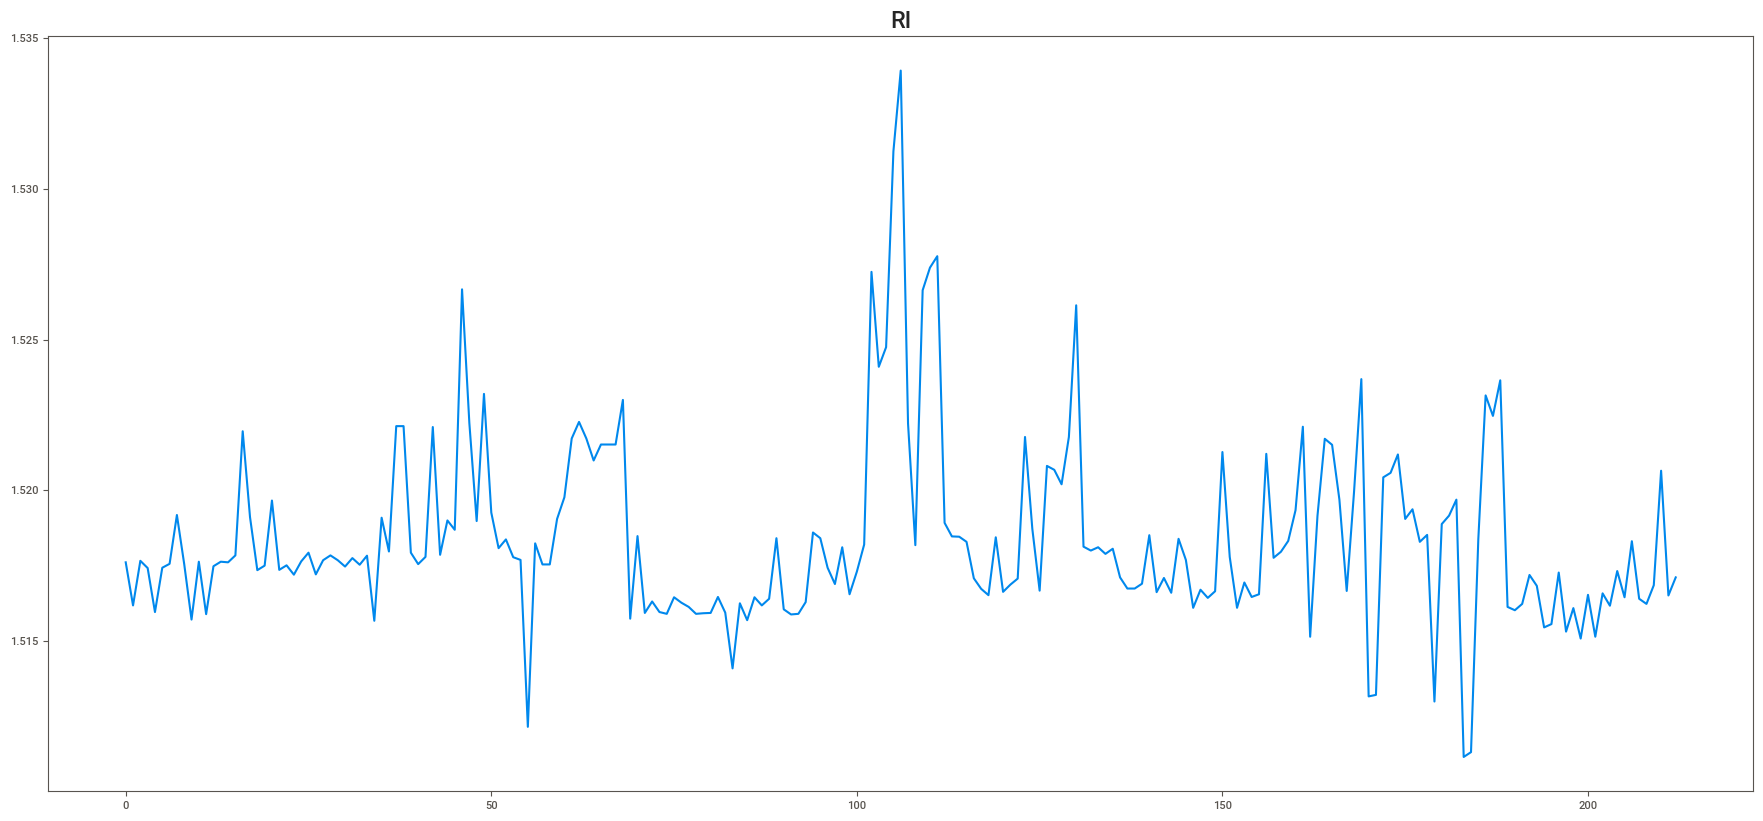

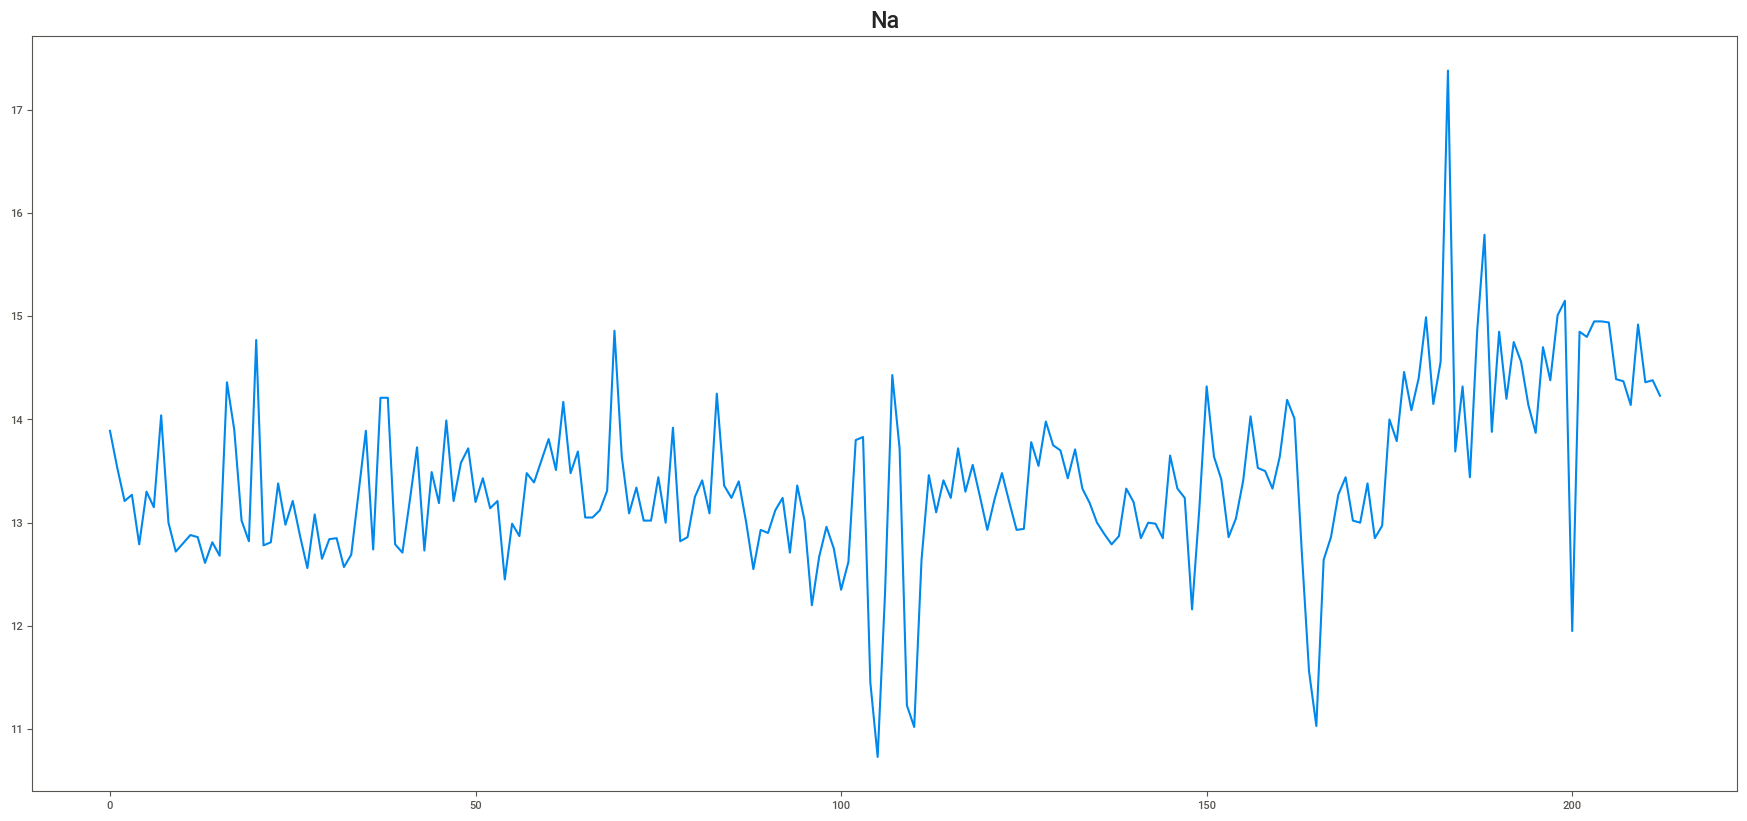

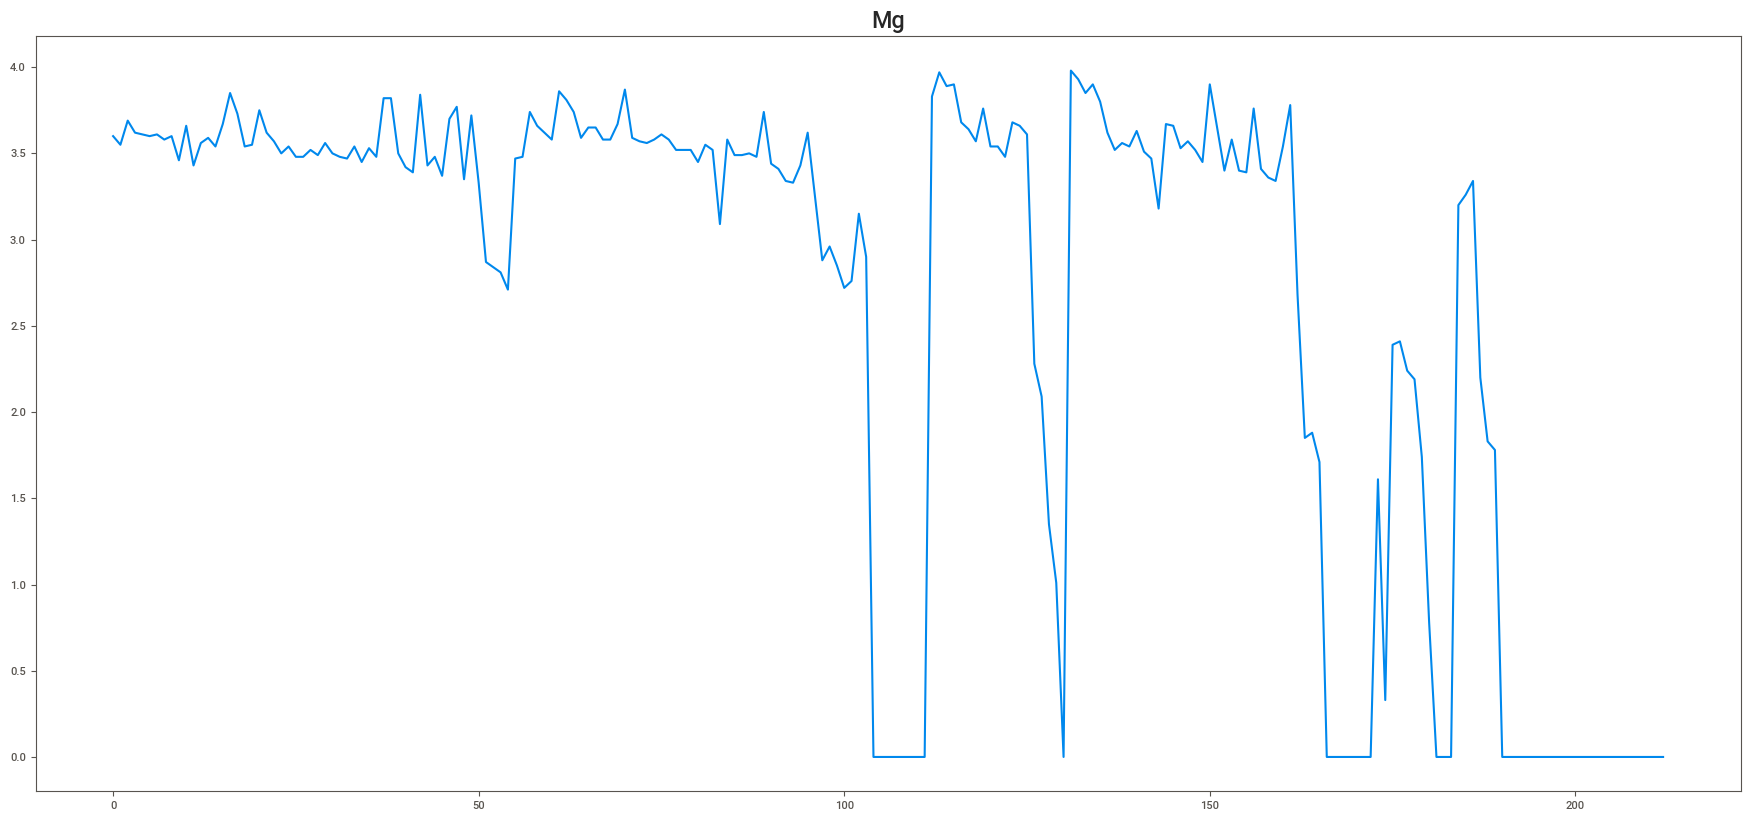

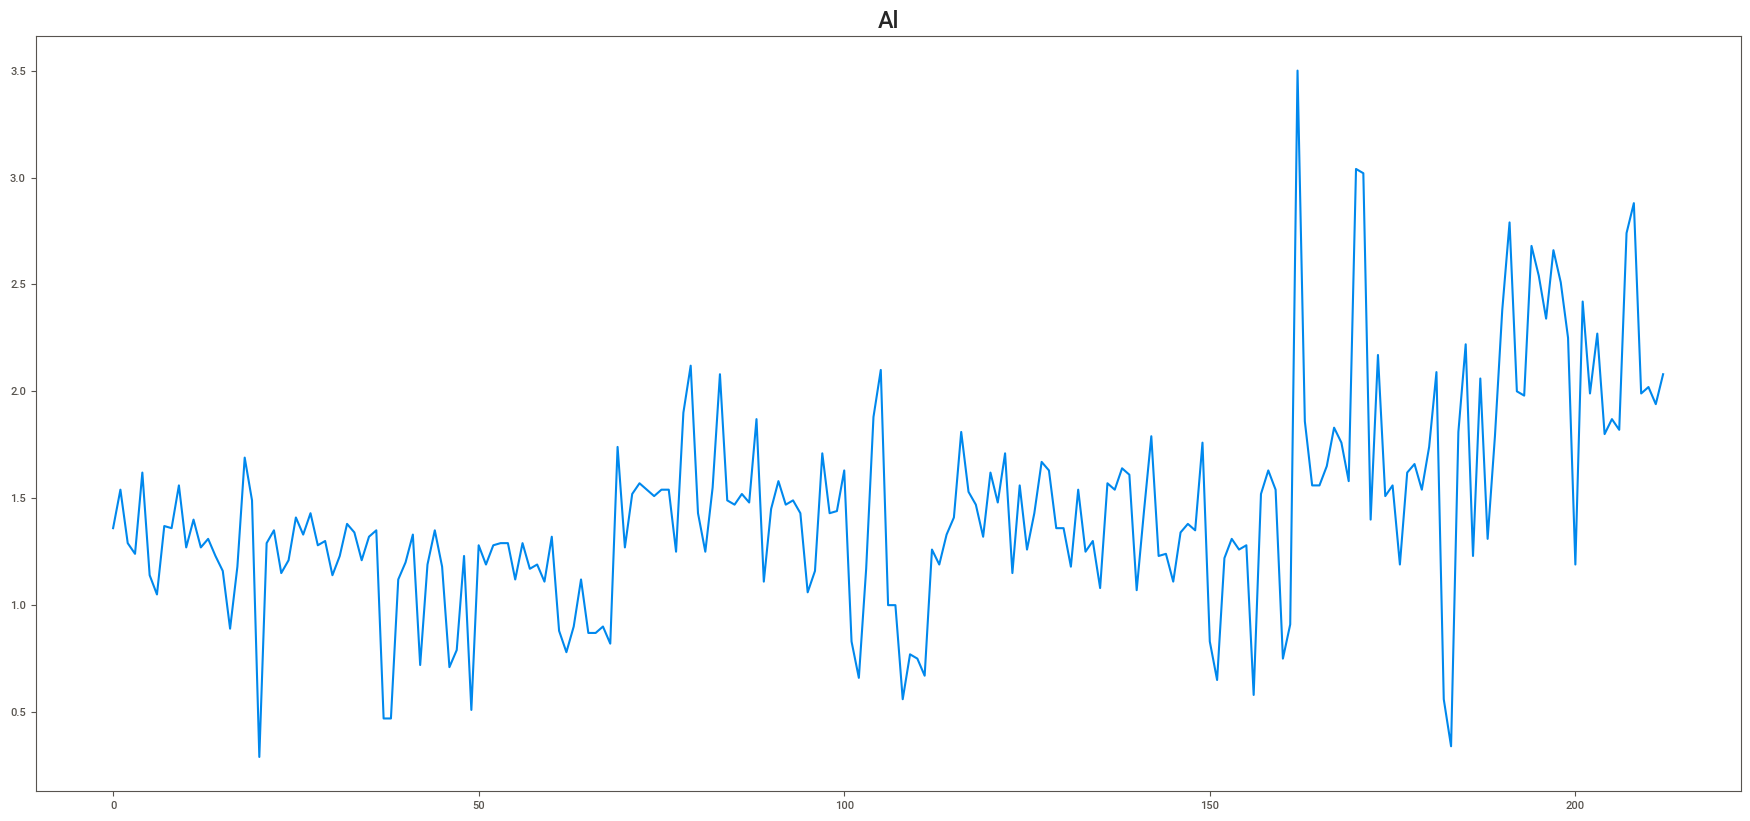

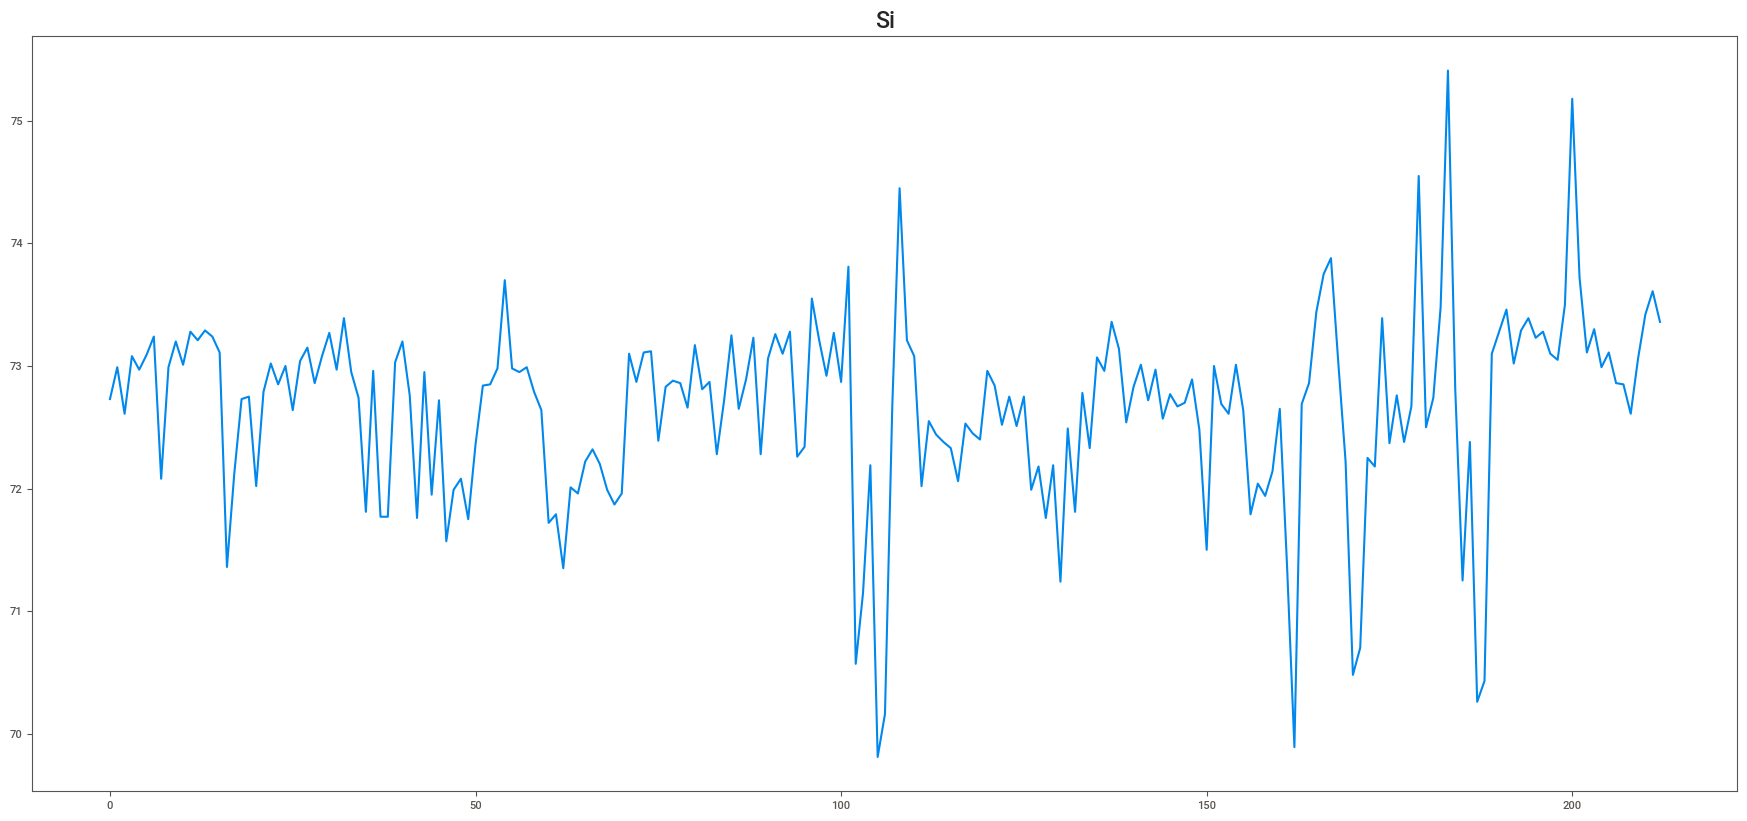

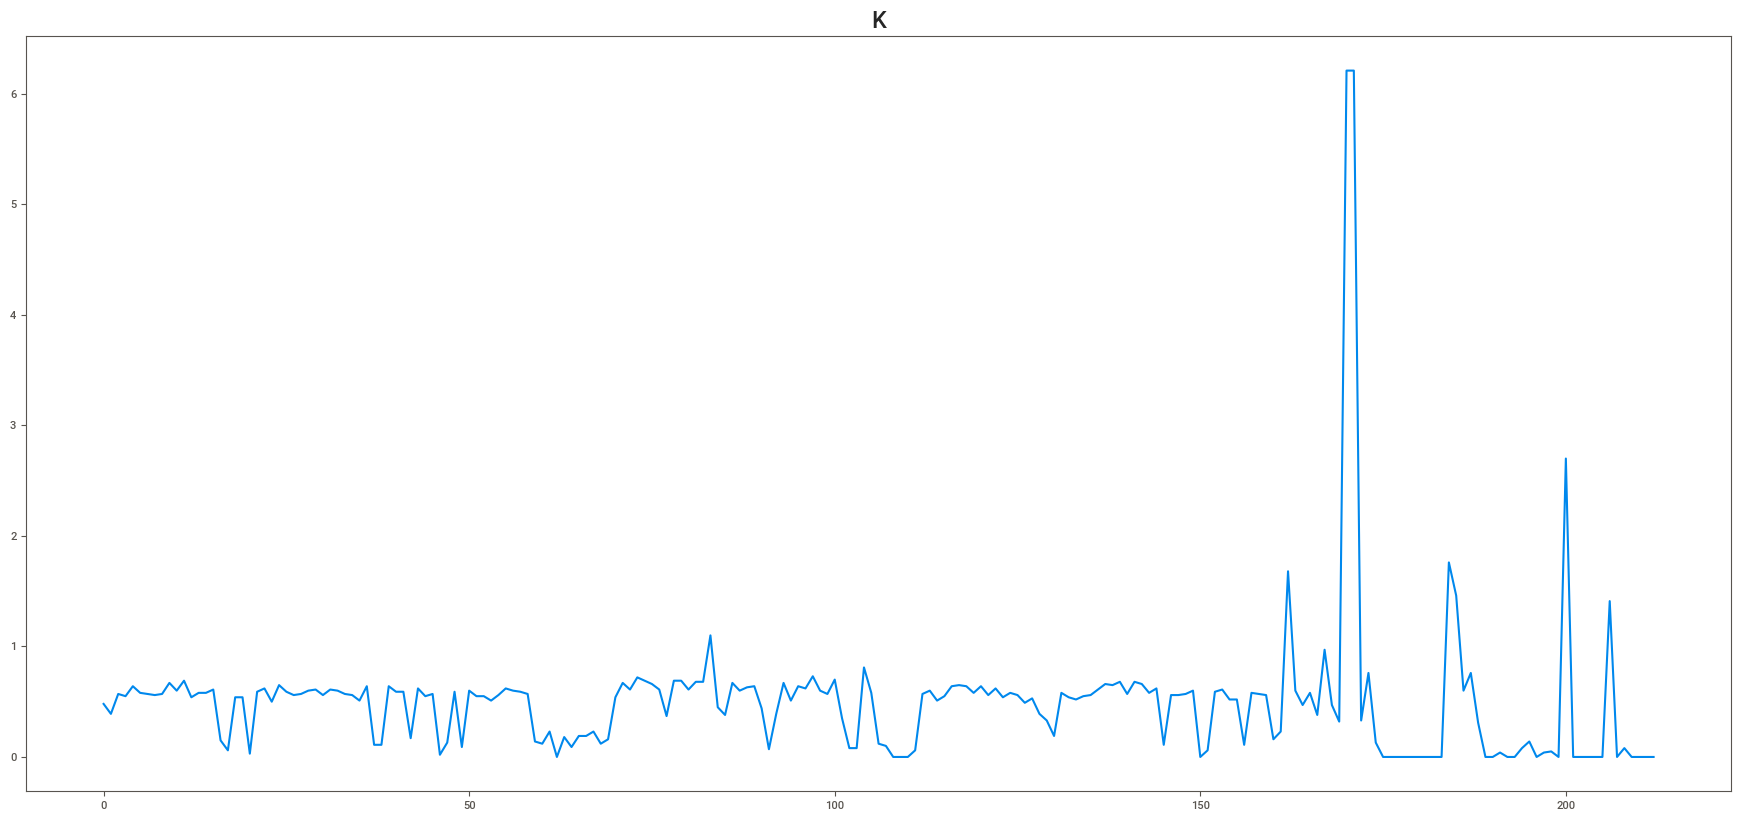

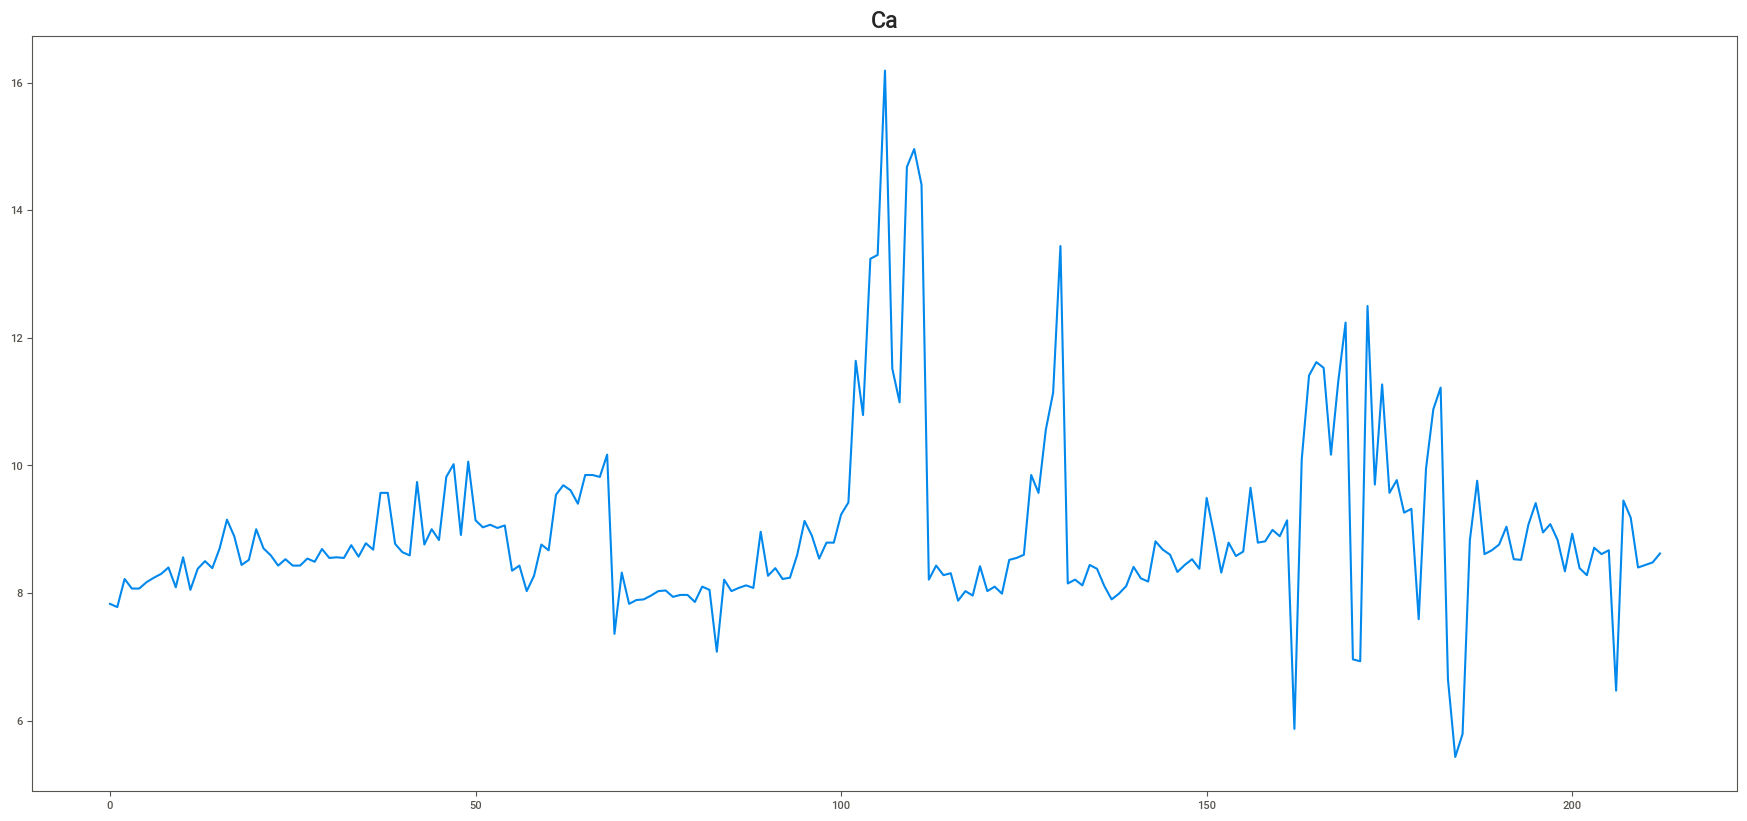

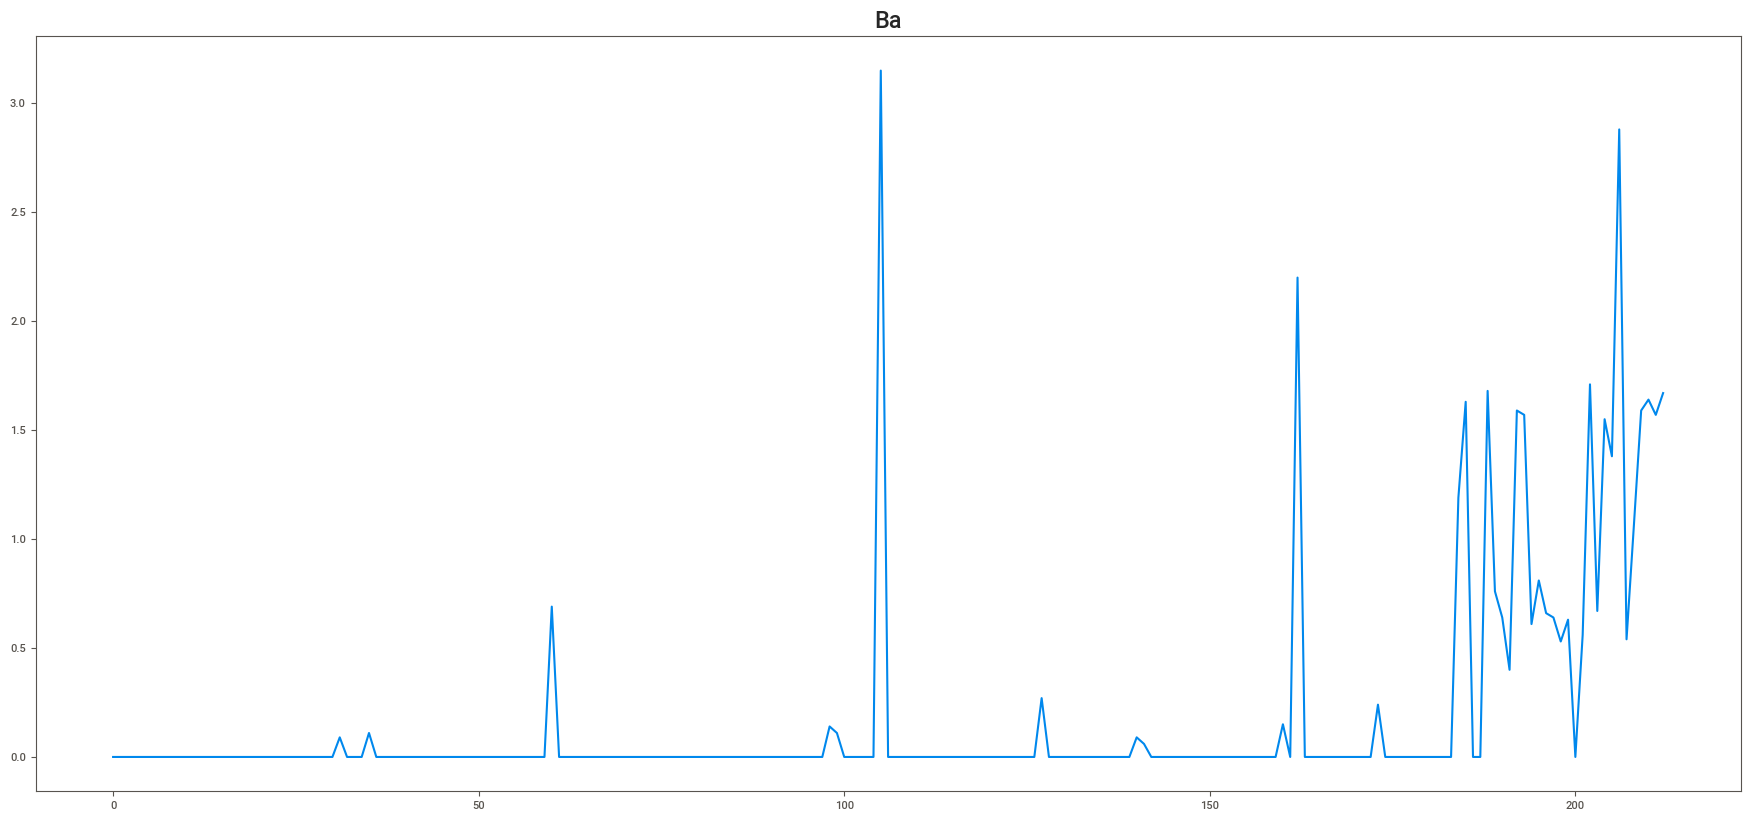

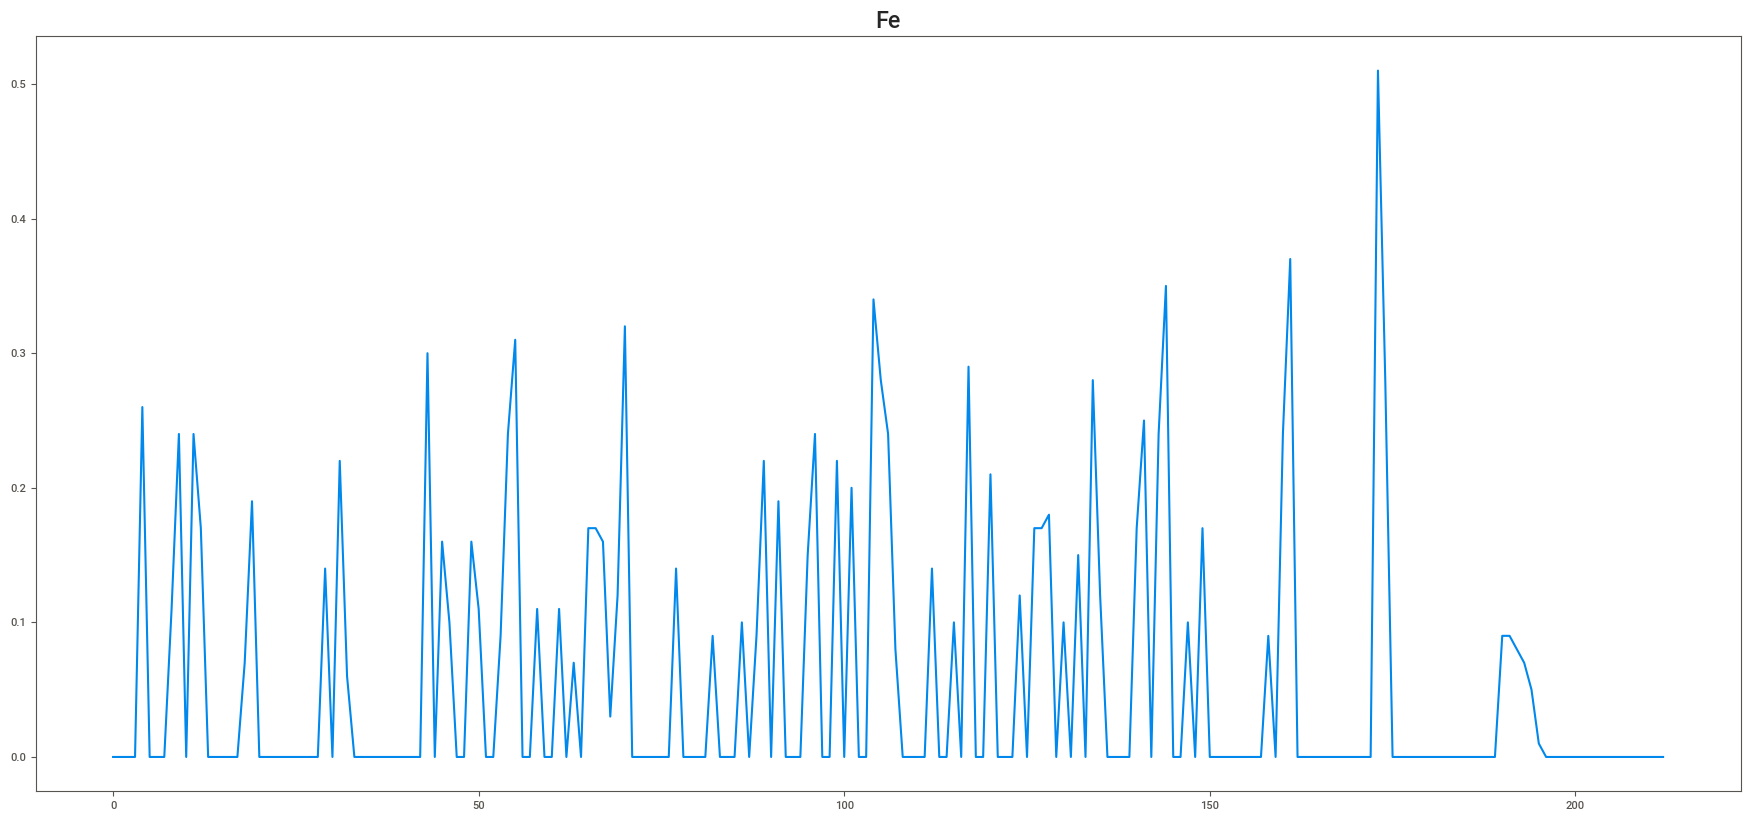

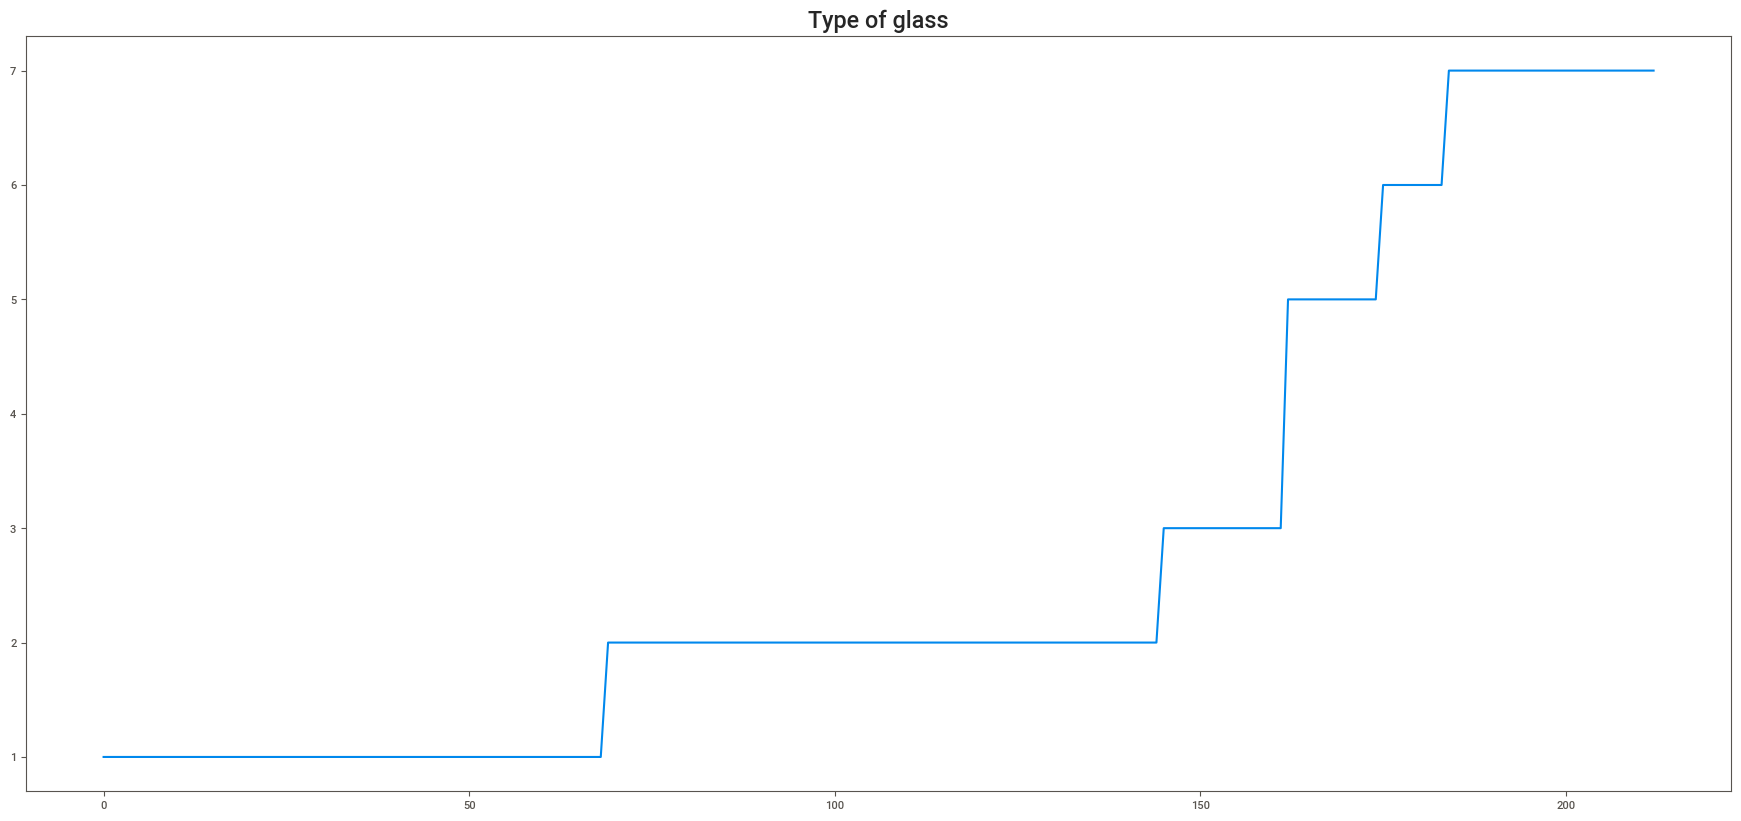

In [37]:
for columnname in columnnames:
  plt.figure(figsize=(22,10))
  glass_df_bfill_imputed_transformed[columnname].plot()
  plt.title(columnname)
  plt.show()

In [38]:
glass_df_bfill_imputed_transformed=glass_df_bfill_imputed_transformed.drop(['Id number'], axis = 1)

##Variables Selection
correlation matrix and heatmap
you can select  the Most correlated variables

Correlation Matrix                      RI        Na        Mg        Al        Si         K  \
RI             1.000000 -0.193436 -0.128118 -0.405671 -0.540010 -0.287900   
Na            -0.193436  1.000000 -0.276486  0.157928 -0.068519 -0.265520   
Mg            -0.128118 -0.276486  1.000000 -0.480035 -0.160359  0.009397   
Al            -0.405671  0.157928 -0.480035  1.000000 -0.009226  0.324484   
Si            -0.540010 -0.068519 -0.160359 -0.009226  1.000000 -0.197684   
K             -0.287900 -0.265520  0.009397  0.324484 -0.197684  1.000000   
Ca             0.812495 -0.275314 -0.444559 -0.260372 -0.210141 -0.318649   
Ba             0.001062  0.327233 -0.492149  0.478936 -0.104361 -0.043790   
Fe             0.145791 -0.240802  0.086906 -0.076456 -0.097674 -0.009586   
Type of glass -0.161322  0.504983 -0.744004  0.597754  0.147767 -0.012765   

                     Ca        Ba        Fe  Type of glass  
RI             0.812495  0.001062  0.145791      -0.161322  
Na         

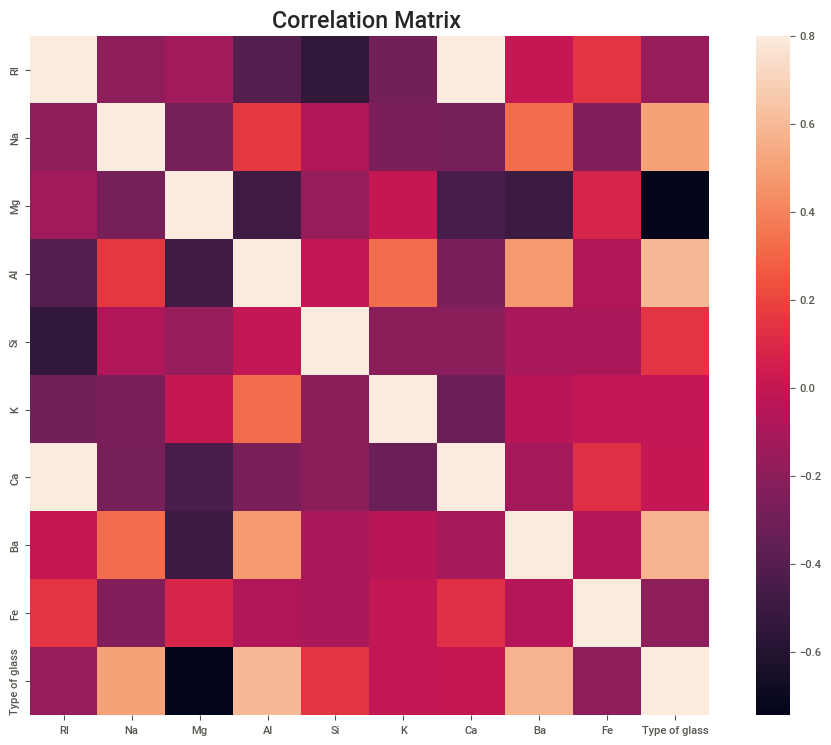

cols Index(['Type of glass', 'Al', 'Ba', 'Na', 'Si', 'Ca', 'K', 'RI', 'Fe', 'Mg'], dtype='object')


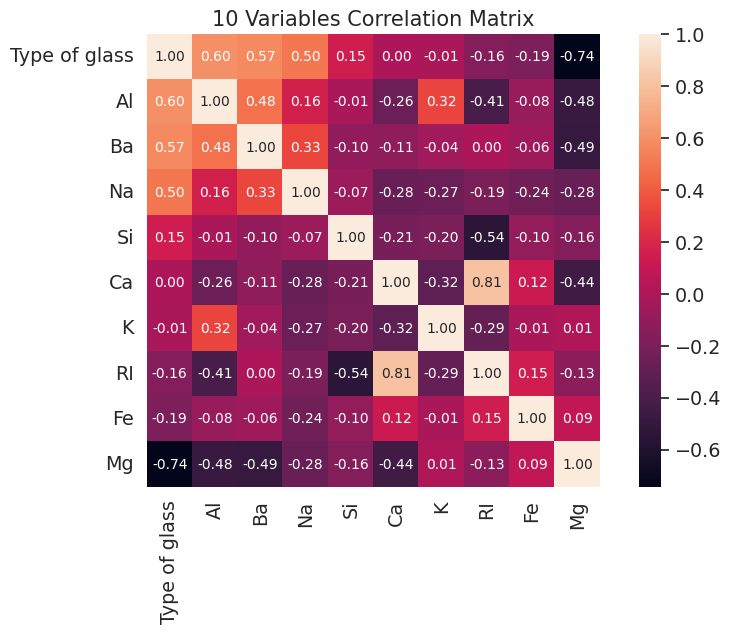

  Most Correlated Features
0            Type of glass
1                       Al
2                       Ba
3                       Na
4                       Si
5                       Ca
6                        K
7                       RI
8                       Fe
9                       Mg


In [39]:
# Correlation Matrix Heatmap
corrmat = glass_df_bfill_imputed_transformed.corr()
print("Correlation Matrix",corrmat)
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.title('Correlation Matrix ')
plt.show()
# Top 10 Heatmap
k = 10  # number of variables for heatmap
cols = corrmat.nlargest(k, 'Type of glass')['Type of glass'].index
print("cols", cols)
cm = np.corrcoef(glass_df_bfill_imputed_transformed[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10},
                         yticklabels=cols.values, xticklabels=cols.values)
plt.title('10 Variables Correlation Matrix')
plt.show()
most_corr = pd.DataFrame(cols)
most_corr.columns = ['Most Correlated Features']
print(most_corr)
corrs = most_corr.values

In [40]:
most_corr["Most Correlated Features"]

0    Type of glass
1               Al
2               Ba
3               Na
4               Si
5               Ca
6                K
7               RI
8               Fe
9               Mg
Name: Most Correlated Features, dtype: object

In [41]:
most_corr_list=list(most_corr["Most Correlated Features"])
print(most_corr_list)
selectedfeaturesglass_df_transformed=glass_df_bfill_imputed_transformed[most_corr_list]

['Type of glass', 'Al', 'Ba', 'Na', 'Si', 'Ca', 'K', 'RI', 'Fe', 'Mg']


##Data Transformation

*   Split data into traing and testing with ratio of 0.2



In [42]:
target=selectedfeaturesglass_df_transformed['Type of glass']
feature=selectedfeaturesglass_df_transformed.drop('Type of glass',axis=1)

In [43]:
feature.head()

Al   Ba     Na     Si    Ca     K       RI    Fe    Mg
0  1.36  0.0  13.89  72.73  7.83  0.48  1.51761  0.00  3.60
1  1.54  0.0  13.53  72.99  7.78  0.39  1.51618  0.00  3.55
2  1.29  0.0  13.21  72.61  8.22  0.57  1.51766  0.00  3.69
3  1.24  0.0  13.27  73.08  8.07  0.55  1.51742  0.00  3.62
4  1.62  0.0  12.79  72.97  8.07  0.64  1.51596  0.26  3.61

In [44]:
target.head()

0    1
1    1
2    1
3    1
4    1
Name: Type of glass, dtype: int64

In [45]:
# converting labels into numeric
le = preprocessing.LabelEncoder()
target=le.fit_transform(target)
feature_train, feature_test, target_train, target_test = train_test_split(feature,target)
print("feature train shape",feature_train.shape)
print("target train shape",target_train.shape)
print("feature_test shape",feature_test.shape)
print("target test shape",target_test.shape)

feature train shape (159, 9)
target train shape (159,)
feature_test shape (54, 9)
target test shape (54,)


In [46]:
labels=['building_windows_float_processed','building_windows_non_float_processed','vehicle_windows_float_processed','containers','tableware','headlamps']
labels

['building_windows_float_processed',
 'building_windows_non_float_processed',
 'vehicle_windows_float_processed',
 'containers',
 'tableware',
 'headlamps']

##converting labels into numeric

In [47]:
le = preprocessing.LabelEncoder()
target =le.fit_transform(target)

## Split Data from train and Test




In [48]:
feature_train, feature_test, target_train, target_test = train_test_split(feature ,target)

## Explain your rationale behind your data preparation and how it will assist you.:
Following data preprocessing and transformation steps we applied


*   Treating missing values but here there was no missing value
*   Selecting most correlated variables by correlation matrix ,Aluminium, Barium, Sodium , Silicon, Calcium, Potassium, refractive index, Iron and Magnesium are 9 selected features to be the explanatory or independent features that will act as predictors to the response or dependent feature of the class of words which are being selected by through correlation matrix. In order to satisfy the assumption of no collinearity between independent features, the correlation matrix analysis is conducted, and the results shown in Table 2.
In Table below ,the selected features which have high correlation rate are selected for features set for random forest, SVM, k nearest neighbors, voting classifier and Logical Regression. 
```
    0       Type of glass
    1               Al
    2               Ba
    3               Na
    4               Si
    5               Ca
    6                K
    7               RI
    8               Fe
    9               Mg
```


*   In data transformation we seperated target class which was type of glass column and other feature variables and them split into train and test





# Requirement 3 & Requirement 4
Create and implement at least 2 classification algorithmsthat will output a classification based on the Type of glass: (class attribute) feature. Test these models and try to improve it as you see fit.Discuss your findings and final rational for choosing a particular classification algorithm.[0-40]

Make a classification using your test data, using your final classification algorithmand comment on the accuracy differential between the training and testing set.[0-10]


# Classification & Testing Result





## Test Analysis Function

In [49]:
def results(target_test, predicted_test, ModelName, labels):
    target_names = labels
    print(classification_report(target_test, predicted_test, target_names=target_names))
    y_test = target_test
    preds = predicted_test
    y_test=np.round(abs(y_test.flatten()))
    preds=np.round(abs(preds.flatten()))
    rms = np.sqrt(np.mean(np.power((np.array(y_test) - np.array(preds)), 2)))
    score = r2_score(y_test, preds)
    mae = mean_absolute_error(y_test, preds)
    mse = mean_squared_error(y_test, preds)
    pearson_coef, p_value = stats.pearsonr(y_test, preds)

    print("root mean square:", rms)
    print("score:", score)
    print("mean absolute error:", mae)
    print("mean squared error:", mse)
    print("pearson_coef:", pearson_coef)
    print("p_value:", p_value)
    print("=======================================================================\n\n")
    skplt.metrics.plot_confusion_matrix(
        y_test,
        preds,
        figsize=(10, 6), title="Confusion matrix\n Deposite Category " + ModelName)
    plt.xlim(-0.5, len(np.unique(y_test)) - 0.5)
    plt.ylim(len(np.unique(y_test)) - 0.5, -0.5)
    plt.savefig('cvroc.png')
    plt.show()

## Logicial Regression

===================Logicial Regression============
                                      precision    recall  f1-score   support

    building_windows_float_processed       0.55      0.94      0.70        17
building_windows_non_float_processed       0.78      0.58      0.67        24
     vehicle_windows_float_processed       0.00      0.00      0.00         3
                          containers       0.50      0.25      0.33         4
                           tableware       0.00      0.00      0.00         1
                           headlamps       0.75      0.60      0.67         5

                            accuracy                           0.63        54
                           macro avg       0.43      0.40      0.39        54
                        weighted avg       0.63      0.63      0.60        54

root mean square: 1.097134314340639
score: 0.4567404426559356
mean absolute error: 0.5740740740740741
mean squared error: 1.2037037037037037
pearson_coef: 0.760444657

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


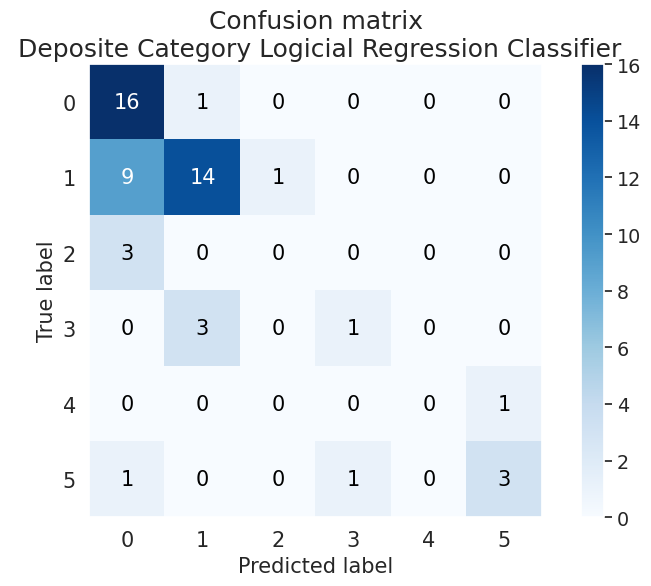

In [50]:

print("===================Logicial Regression============")
clff =LogisticRegression(solver='liblinear', random_state=0)
# Train the model using the training sets y_pred=clf.predict(X_test)
clff = clff.fit(feature_train ,target_train)
y_predd1 =clff.predict(feature_test)
# Model Accuracy, how often is the classifier correct?
# print("Random Forest Accuracy:",metrics.accuracy_score(target_test, y_predd1))
modelname= "Logicial Regression Classifier"
results(target_test, y_predd1 ,modelname ,labels)
model_path = '/content/drive/MyDrive/glassdata/models/'
modelfilename ="model_lr.sav"
joblib.dump(clff, model_path +modelfilename)
pickle.dump(clff, open(model_path +modelfilename, 'wb'))

## Random Forest

===================Random Forest============
                                      precision    recall  f1-score   support

    building_windows_float_processed       0.59      0.94      0.73        17
building_windows_non_float_processed       0.89      0.67      0.76        24
     vehicle_windows_float_processed       0.00      0.00      0.00         3
                          containers       1.00      1.00      1.00         4
                           tableware       1.00      1.00      1.00         1
                           headlamps       1.00      0.60      0.75         5

                            accuracy                           0.74        54
                           macro avg       0.75      0.70      0.71        54
                        weighted avg       0.77      0.74      0.73        54

root mean square: 1.0715167512214394
score: 0.48181396068720006
mean absolute error: 0.4444444444444444
mean squared error: 1.1481481481481481
pearson_coef: 0.7551483014539

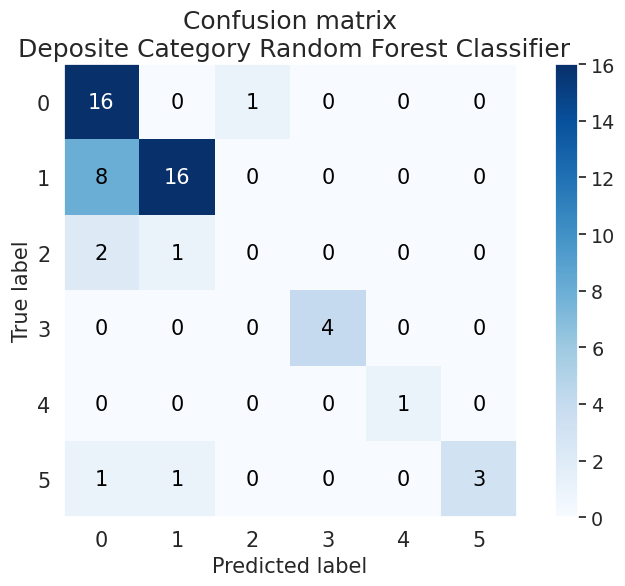

In [51]:
print("===================Random Forest============")
clff =RandomForestClassifier(n_estimators=200)
# Train the model using the training sets y_pred=clf.predict(X_test)
clff = clff.fit(feature_train ,target_train)
y_predd1 =clff.predict(feature_test)
# Model Accuracy, how often is the classifier correct?
# print("Random Forest Accuracy:",metrics.accuracy_score(target_test, y_predd1))
modelname= "Random Forest Classifier"
results(target_test, y_predd1 ,modelname ,labels)
model_path = '/content/drive/MyDrive/glassdata/models/'
modelfilename ="model_rf.sav"
joblib.dump(clff, model_path +modelfilename)
pickle.dump(clff, open(model_path +modelfilename, 'wb'))

## KNN Classifier

===================KNN Classifier============
                                      precision    recall  f1-score   support

    building_windows_float_processed       0.52      0.88      0.65        17
building_windows_non_float_processed       0.88      0.58      0.70        24
     vehicle_windows_float_processed       0.00      0.00      0.00         3
                          containers       0.75      0.75      0.75         4
                           tableware       0.00      0.00      0.00         1
                           headlamps       0.60      0.60      0.60         5

                            accuracy                           0.65        54
                           macro avg       0.46      0.47      0.45        54
                        weighted avg       0.66      0.65      0.63        54

root mean square: 1.0363754503432017
score: 0.5152453180622194
mean absolute error: 0.5185185185185185
mean squared error: 1.0740740740740742
pearson_coef: 0.7876209676398

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


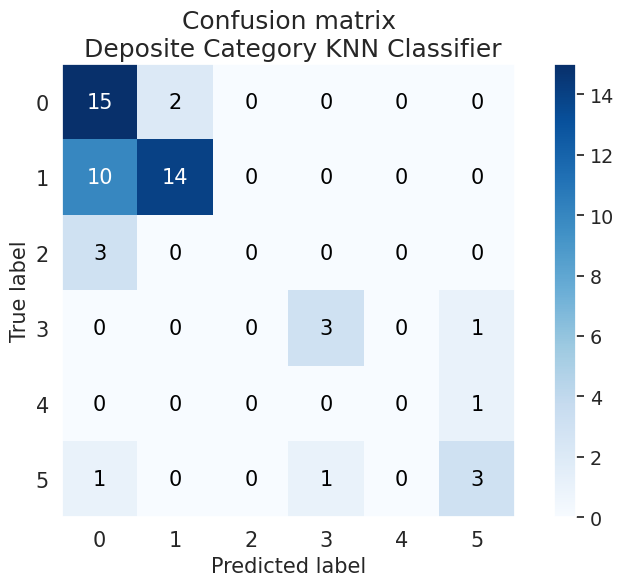

In [52]:
# Create a KNN Classifier
print("===================KNN Classifier============")
knn =KNeighborsClassifier()
# Train the model using the training sets y_pred=clf.predict(X_test)
knn = knn.fit(feature_train ,target_train)
y_predd2 =knn.predict(feature_test)
# Model Accuracy, how often is the classifier correct?
# print("Accuracy KNN:",metrics.accuracy_score(target_test, y_predd2))
modelname= "KNN Classifier"
results(target_test, y_predd2 ,"KNN Classifier" ,labels)
model_path = '/content/drive/MyDrive/glassdata/models/'
modelfilename ="model_knn.sav"
joblib.dump(knn, model_path +modelfilename)
pickle.dump(knn, open(model_path +modelfilename, 'wb'))

## Linear SVM classifier 

===================SVM classifier============
                                      precision    recall  f1-score   support

    building_windows_float_processed       0.58      0.88      0.70        17
building_windows_non_float_processed       0.84      0.67      0.74        24
     vehicle_windows_float_processed       0.00      0.00      0.00         3
                          containers       0.80      1.00      0.89         4
                           tableware       1.00      1.00      1.00         1
                           headlamps       1.00      0.60      0.75         5

                            accuracy                           0.72        54
                           macro avg       0.70      0.69      0.68        54
                        weighted avg       0.73      0.72      0.70        54

root mean square: 0.8819171036881969
score: 0.6489707475622968
mean absolute error: 0.4074074074074074
mean squared error: 0.7777777777777778
pearson_coef: 0.8406554643814

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


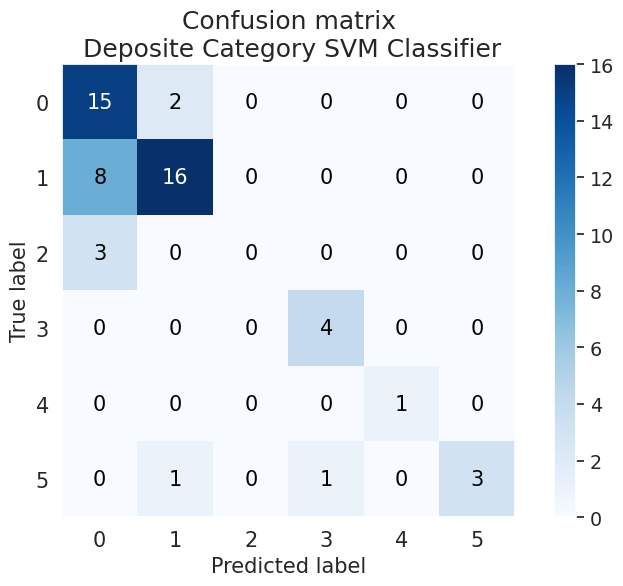

In [53]:
# training a linear SVM classifier 
print("===================SVM classifier============")
svm_model_linear = SVC(kernel = 'linear', C = 6).fit(feature_train ,target_train)
y_predd3 = svm_model_linear.predict(feature_test)
# model accuracy for X_test   
accuracy = svm_model_linear.score(feature_test, target_test)
# print("Accuracy SVM:",metrics.accuracy_score(target_test, y_predd3))
modelname= "SVM Classifier"
results(target_test, y_predd3 ,modelname ,labels)
model_path = '/content/drive/MyDrive/glassdata/models/'
modelfilename ="model_svm.sav"
joblib.dump(svm_model_linear, model_path +modelfilename)
pickle.dump(svm_model_linear, open(model_path +modelfilename, 'wb'))

## Voting Classifier

===================Voting Classifier============


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0

                                      precision    recall  f1-score   support

    building_windows_float_processed       0.56      0.88      0.68        17
building_windows_non_float_processed       0.89      0.67      0.76        24
     vehicle_windows_float_processed       0.00      0.00      0.00         3
                          containers       0.80      1.00      0.89         4
                           tableware       0.00      0.00      0.00         1
                           headlamps       0.75      0.60      0.67         5

                            accuracy                           0.70        54
                           macro avg       0.50      0.52      0.50        54
                        weighted avg       0.70      0.70      0.68        54

root mean square: 0.9813067629253163
score: 0.5653923541247485
mean absolute error: 0.4444444444444444
mean squared error: 0.9629629629629629
pearson_coef: 0.8011118452713999
p_value: 3.4806800812033903e-13




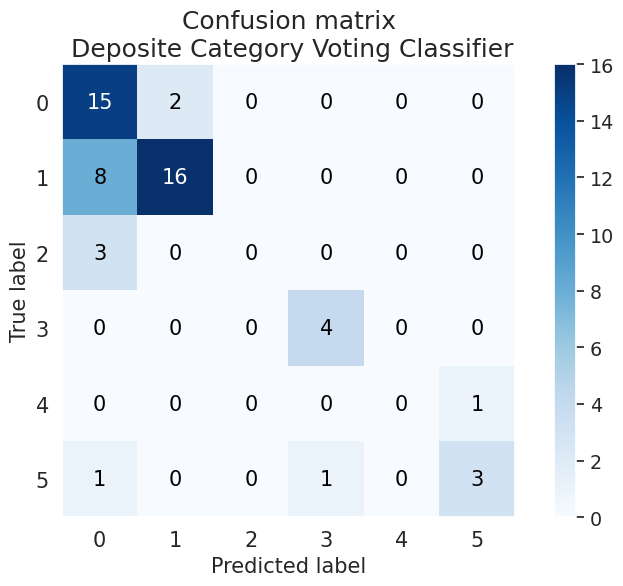

In [54]:
print("===================Voting Classifier============")
model1 = RandomForestClassifier()
model2 = KNeighborsClassifier()
model3 = LogisticRegression()
Voting = VotingClassifier(estimators=[('RF', model1 ), ('knn', model2) ,('lr' ,model3)], voting='hard')
Voting.fit(feature_train ,target_train)
vpredictions = Voting.predict(feature_test)
vscore = Voting.score(feature_test, target_test)
# print("Voting Score", vscore)
modelname= "Voting Classifier"
results(target_test, vpredictions ,modelname ,labels)
model_path = '/content/drive/MyDrive/glassdata/models/'
modelfilename ="model_voting.sav"
joblib.dump(Voting, model_path +modelfilename)
pickle.dump(Voting, open(model_path +modelfilename, 'wb'))

#Result Comments:
We applied 5 Machine Learning Models for classification All algorithms perform fairly well in terms of goodness of fit of the model as indicated by the Score but Random Forest performed highly correlated to better with Accuracry 88% ,root mean square: 0.5443310539518174 ,score: 0.8828633405639914 ,mean absolute error: 0.18518518518518517, mean squared error: 0.2962962962962963, pearson_coef: 0.9453675245016862 and p_value: 5.663234462887227e-27 which are very strong correlation and as we can see in classification report and confusion matrix graph below type of glass classification accuracy is defined which shows Random forest performed well with 100% accuracy in classification for containers,tableware and headlamps, ass well as with 70% accuracy for building_windows_non_float_processed and 68% for building_windows_float_processed but due to lack of datasample of vehicle_windows_float_processed it predicted with 50% accuracy.

===================Random Forest============

                                  precision    recall  f1-score   support

    building_windows_float_processed       0.68      0.65      0.67        20
    building_windows_non_float_processed       0.70      0.74      0.72        19
    vehicle_windows_float_processed       0.50      0.60      0.55         5
    containers       1.00      0.75      0.86         4
    tableware       1.00      1.00      1.00         3
    headlamps       1.00      1.00      1.00         3
    
    accuracy                           0.72        54
    macro avg       0.81      0.79      0.80        54
    weighted avg       0.73      0.72      0.72        54
    root mean square: 0.7453559924999299
    score: 0.7330257086354648
    mean absolute error: 0.37037037037037035
    mean squared error: 0.5555555555555556
    pearson_coef: 0.864235863175602
    p_value: 3.872279904330122e-17



#Load Saved Model to use

In [55]:
import pickle
# load the model from disk
loaded_model = pickle.load(open("/content/drive/MyDrive/glassdata/models/model_svm.sav", 'rb'))

#Conclusion
In This analysis we applied Data Analysis process in which we applied data acquisition , preprocessing, feature  extraction in which are given features of data  from which 9 got selected during our feature selection process which are Aluminium, Barium, Sodium , Silicon, Calcium, Potassium, refractive index, Iron and Magnesium, then we transform those features and prepared them as feature dataset for recognition modelling for modelling we applied Random Forest, K nearest Neighbor, logical regression, Support vector Machine, voting classifier also we compared our algorithm with all these traditional model’s distant data  recognition results. And found that the Random Forest has better performance in the case of glass data classification and its features analysis. The all the machine learning algorithms which we implemented are capable of predicting continuous data adequately and our algorithm is the use defined ensemble learning algorithm of these previous models which assure the accuracy much better than them. These machine learning & deep learning algorithms were constructed and computationally implemented in such a different way, yet each one has the same capabilities at its end.
Machine learning model depends so heavily on the nature of data and the setting where they are in. Hence, it is not the model that matters, but It is the way, the model carried out and implemented in such a diligent manner. In this research, the Randome Forest gives the better outcomes in comparison with all the implemneted machine learning. With addition of more information, the error rate across both the models can further decreased. Hence it can be concluded that the combination of Aluminium, Barium, Sodium , Silicon, Calcium, Potassium, refractive index, Iron and Magnesium with Random Forest classifer as the better predictive model for Glassdata .